# Input Data

In [ ]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import xgboost as xgb
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Tuban 6 jam update.csv to Tuban 6 jam update.csv


In [ ]:
df = pd.read_csv("Tuban 6 jam update.csv", sep=';',parse_dates=['time'])
df = df.set_index('time')
df

latitude  longitude   HSW
time                                          
2022-11-28 18:00:00     -6.21     111.80  0.28
2022-11-28 18:00:00     -6.22     112.04  0.09
2022-11-28 18:00:00     -6.26     112.20  0.19
2022-11-28 18:00:00     -6.31     112.27  0.14
2022-11-29 00:00:00     -6.21     111.80  0.26
...                       ...        ...   ...
2023-10-28 12:00:00     -6.31     112.27  0.94
2023-10-28 18:00:00     -6.21     111.80  0.87
2023-10-28 18:00:00     -6.22     112.04  0.87
2023-10-28 18:00:00     -6.26     112.20  0.95
2023-10-28 18:00:00     -6.31     112.27  0.93

[5348 rows x 3 columns]

In [ ]:
df.describe()

latitude    longitude          HSW
count  5348.000000  5348.000000  5348.000000
mean     -6.250000   112.077500     0.797285
std       0.039374     0.180624     0.478574
min      -6.310000   111.800000     0.000000
25%      -6.272500   111.980000     0.420000
50%      -6.240000   112.120000     0.780000
75%      -6.217500   112.217500     1.110000
max      -6.210000   112.270000     3.060000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5348 entries, 2022-11-28 18:00:00+00:00 to 2023-10-28 18:00:00+00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   5348 non-null   float64
 1   longitude  5348 non-null   float64
 2   HSW        5348 non-null   float64
dtypes: float64(3)
memory usage: 167.1 KB


Missing Values:
latitude     0
longitude    0
HSW          0
dtype: int64

Descriptive Statistics:
          latitude    longitude          HSW
count  5348.000000  5348.000000  5348.000000
mean     -6.250000   112.077500     0.797285
std       0.039374     0.180624     0.478574
min      -6.310000   111.800000     0.000000
25%      -6.272500   111.980000     0.420000
50%      -6.240000   112.120000     0.780000
75%      -6.217500   112.217500     1.110000
max      -6.210000   112.270000     3.060000


<Axes: >

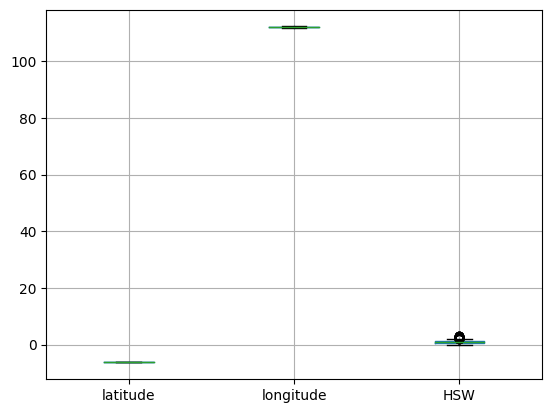

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Identify outliers using descriptive statistics
# You can use methods like describe() and boxplot() for a quick overview
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Boxplot for numerical columns to visualize outliers
df.boxplot(column=['latitude', 'longitude', 'HSW'])

# Visualisasi

In [ ]:
# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

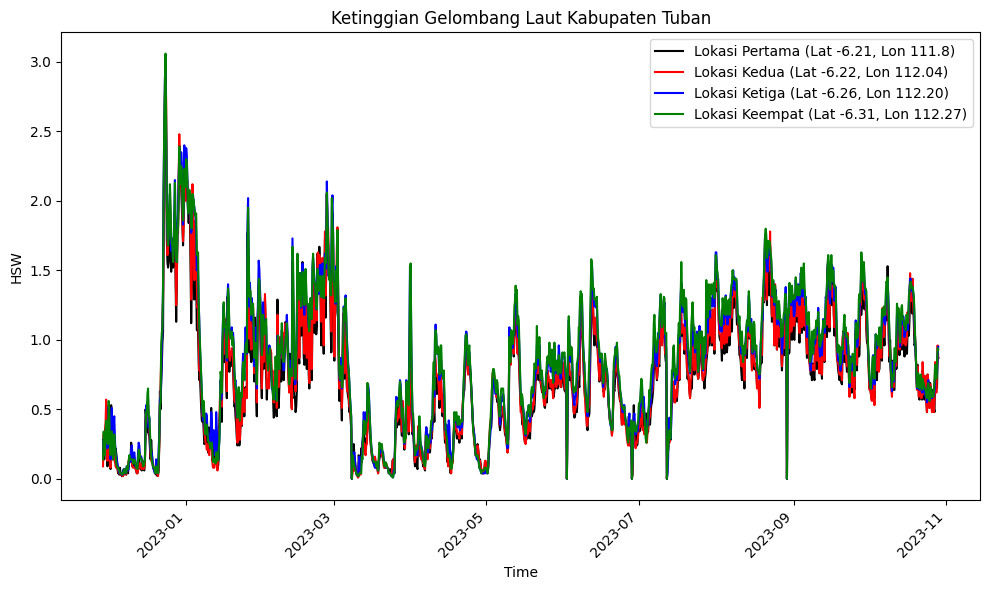

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])
# Set 'time' as the index
df = df.set_index('time')

# Plot
plt.figure(figsize=(10, 6))

colors = ['black', 'red', 'blue', 'green']

for i, (lat, lon) in enumerate(zip(df['latitude'].unique(), df['longitude'].unique())):
    # Filter data
    lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)
    plt.plot(df.loc[lat_lon_filter].index, df.loc[lat_lon_filter]['HSW'], color=colors[i], label=f'Lat {lat}, Lon {lon}')

# Add legend with location descriptions
locations = ['Lokasi Pertama (Lat -6.21, Lon 111.8)', 'Lokasi Kedua (Lat -6.22, Lon 112.04)', 'Lokasi Ketiga (Lat -6.26, Lon 112.20)', 'Lokasi Keempat (Lat -6.31, Lon 112.27)']
plt.legend(locations, loc='upper right')

plt.title('Ketinggian Gelombang Laut Kabupaten Tuban')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


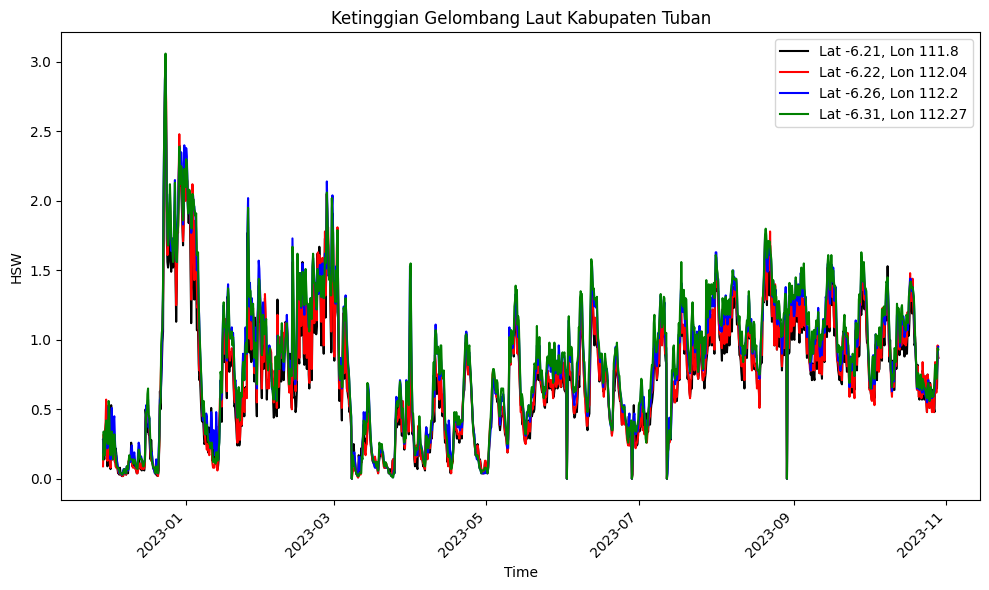

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])
# Set 'time' as the index
df = df.set_index('time')

# Plot
plt.figure(figsize=(10, 6))

colors = ['black', 'red', 'blue', 'green']

for i, (lat, lon) in enumerate(zip(df['latitude'].unique(), df['longitude'].unique())):
    # Filter data
    lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)
    plt.plot(df.loc[lat_lon_filter].index, df.loc[lat_lon_filter]['HSW'], color=colors[i], label=f'Lat {lat}, Lon {lon}')

plt.title('Ketinggian Gelombang Laut Kabupaten Tuban')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


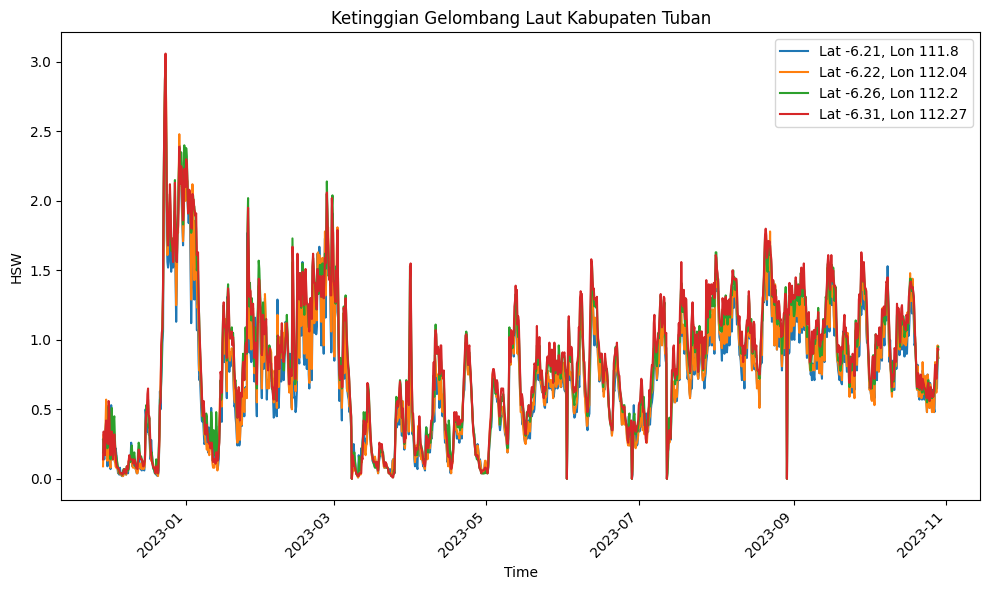

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])
# Set 'time' as the index
df = df.set_index('time')

# Plot
plt.figure(figsize=(10, 6))

for lat, lon in zip(df['latitude'].unique(), df['longitude'].unique()):
    # Filter data
    lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)
    plt.plot(df.loc[lat_lon_filter].index, df.loc[lat_lon_filter]['HSW'], label=f'Lat {lat}, Lon {lon}')

plt.title('Ketinggian Gelombang Laut Kabupaten Tuban')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


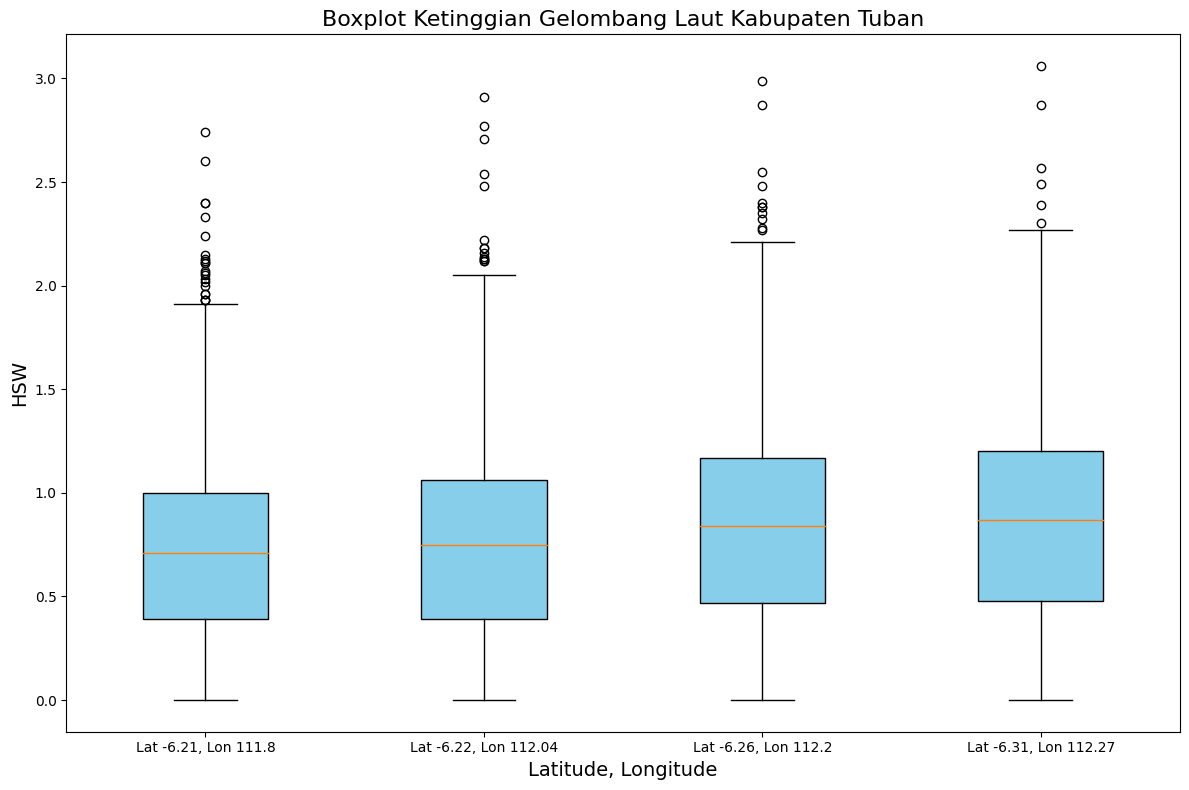

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])
# Set 'time' as the index
df = df.set_index('time')

# Filter longitude latitude
unique_latitudes = df['latitude'].unique()
unique_longitudes = df['longitude'].unique()

# Boxplots for each latitude and longitude combination
plt.figure(figsize=(12, 8))
positions = []
labels = []

for i, lat in enumerate(unique_latitudes):
    for j, lon in enumerate(unique_longitudes):

        lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)

        df_filtered = df.loc[lat_lon_filter]
        if not df_filtered.empty:
            positions.append(df_filtered['HSW'].values)
            labels.append(f'Lat {lat}, Lon {lon}')

boxprops = dict(facecolor='skyblue', edgecolor='black')
plt.boxplot(positions, labels=labels, patch_artist=True, boxprops=dict(facecolor='skyblue', edgecolor='black'))
plt.title('Boxplot Ketinggian Gelombang Laut Kabupaten Tuban', fontsize=16)
plt.xlabel('Latitude, Longitude', fontsize=14)
plt.ylabel('HSW', fontsize=14)
plt.tight_layout()
plt.show()

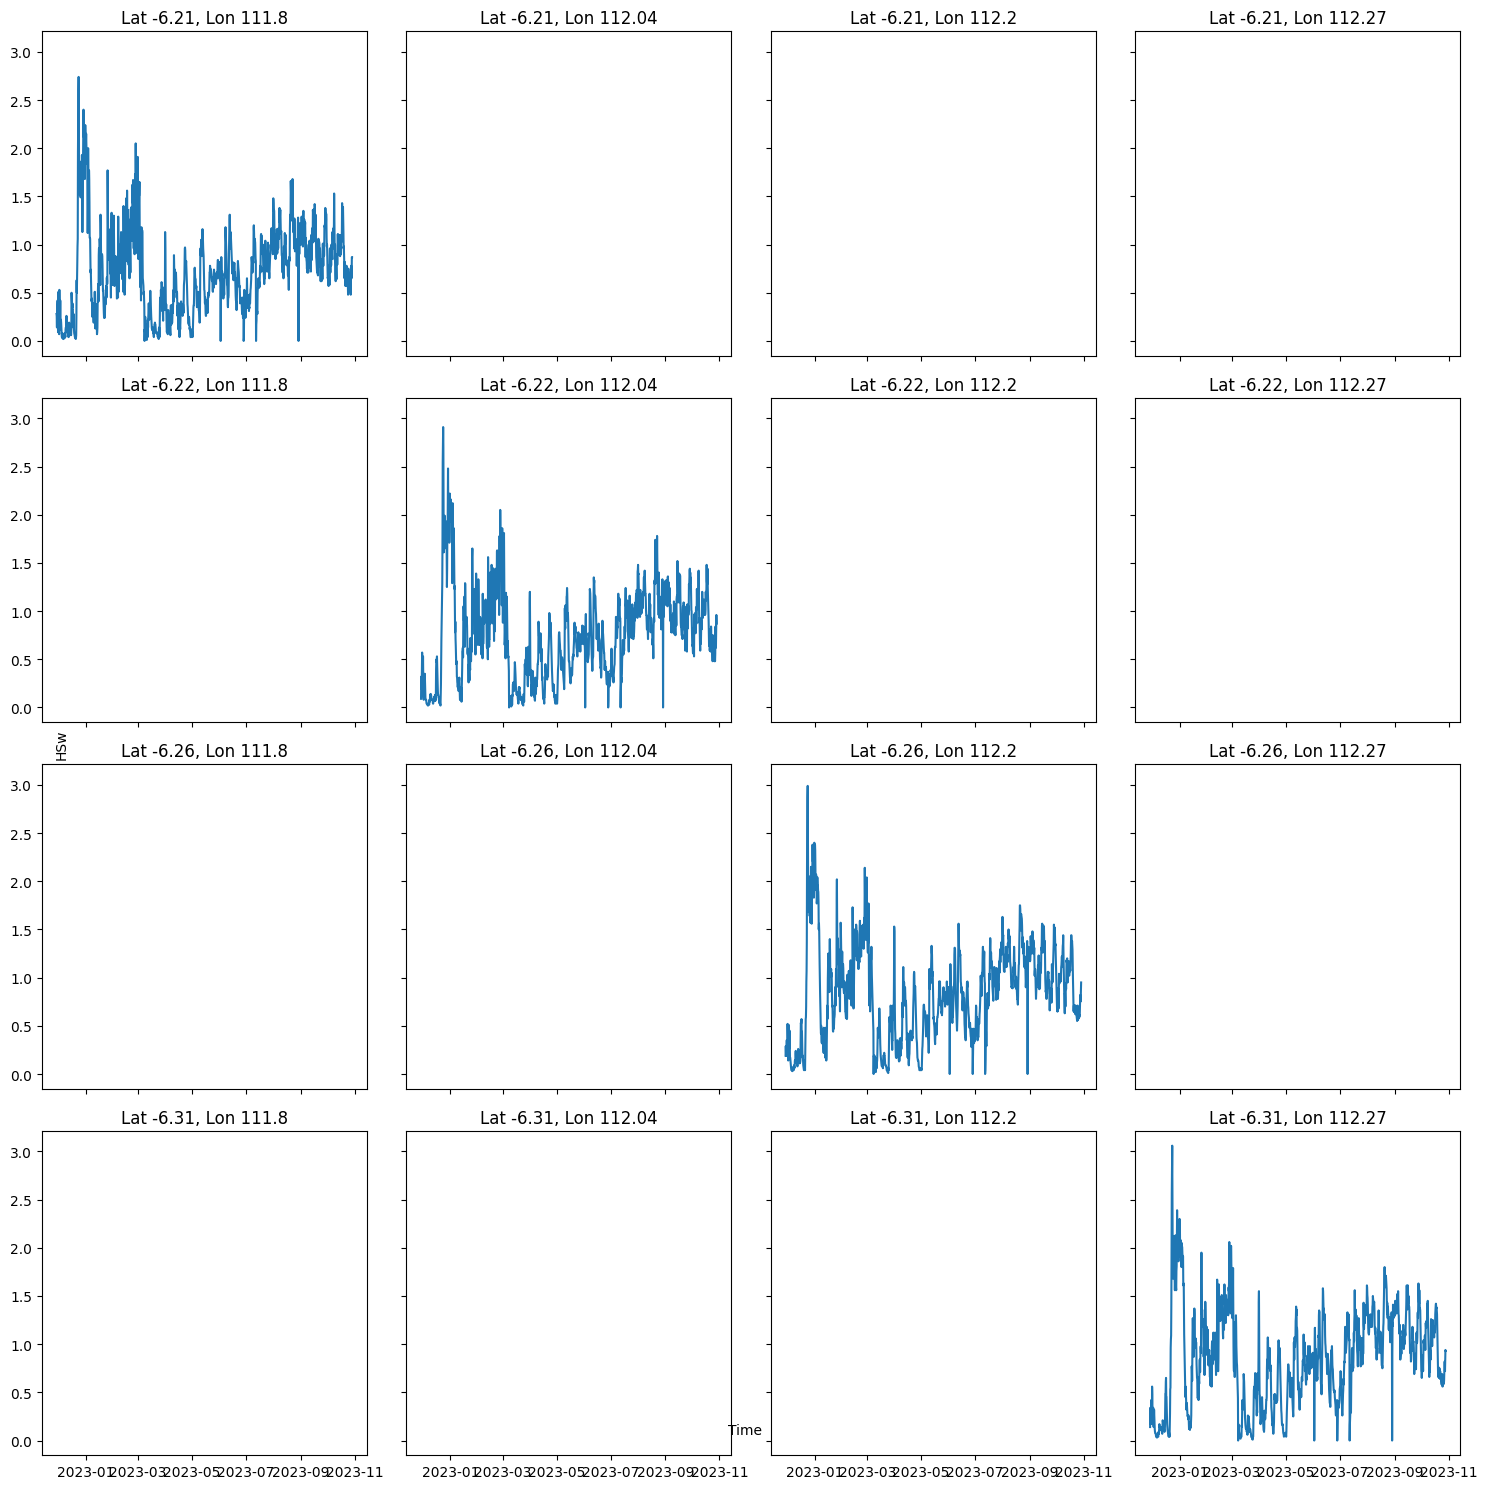

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

# Get unique latitudes and longitudes
unique_latitudes = df['latitude'].unique()
unique_longitudes = df['longitude'].unique()

# Calculate the number of subplots needed
num_rows = len(unique_latitudes)
num_cols = len(unique_longitudes)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through unique latitudes and longitudes
for i, lat in enumerate(unique_latitudes):
    for j, lon in enumerate(unique_longitudes):
        # Filter data based on latitude and longitude
        lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)

        # Plot data on the corresponding subplot
        axs[i * num_cols + j].plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'])
        axs[i * num_cols + j].set_title(f'Lat {lat}, Lon {lon}')

# Set common labels
fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.04, 0.5, 'HSW', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


## Plot Berdasarkan Longituted dan Latitude

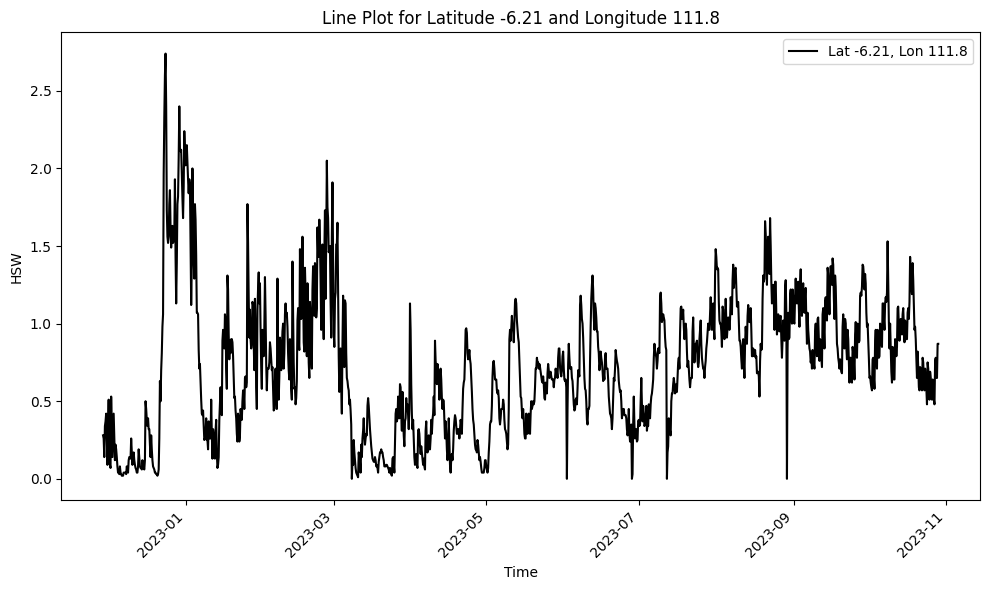

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

selected_lat = -6.21
selected_lon = 111.8

# Plotting
plt.figure(figsize=(10, 6))

# Filter data
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color = 'black', label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot for Latitude {selected_lat} and Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


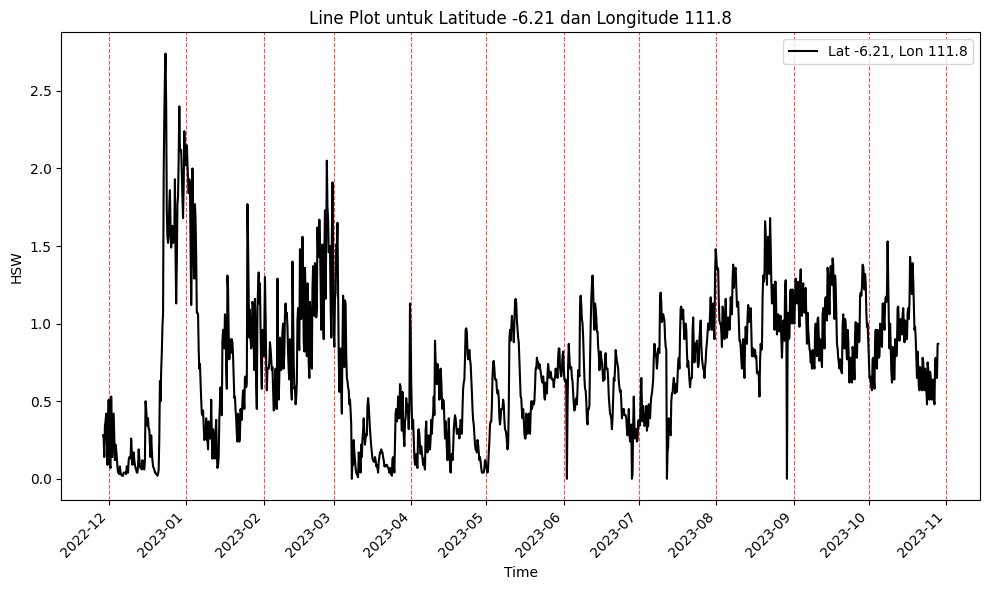

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

selected_lat = -6.21
selected_lon = 111.8

# Plotting
plt.figure(figsize=(10, 6))

# Filter data
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color ='black',label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot untuk Latitude {selected_lat} dan Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()

# menambahkan gridline
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.grid(True, linestyle='--', alpha=0.7, color='red')

plt.tight_layout()
plt.show()


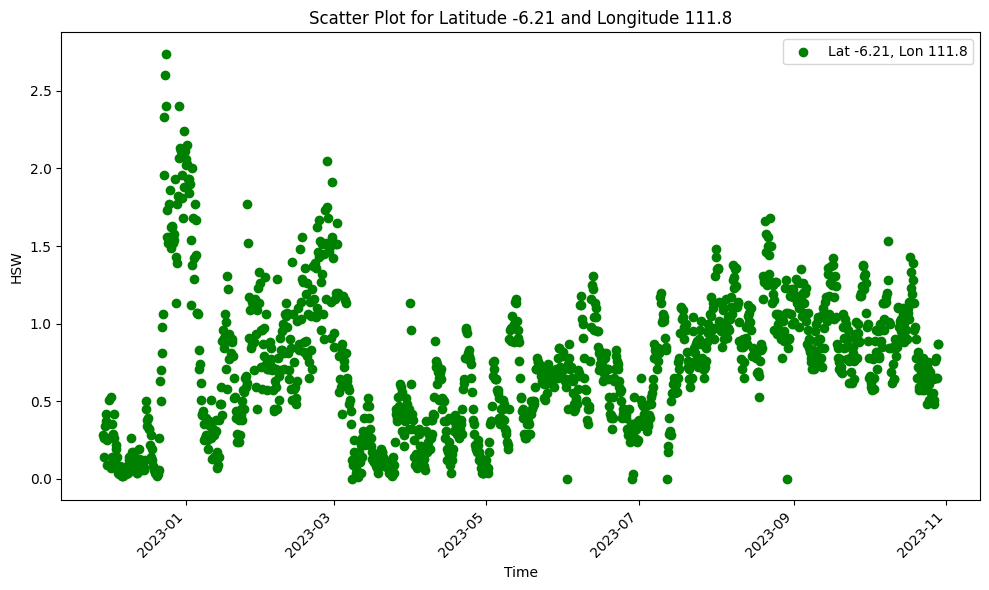

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

selected_lat = -6.21
selected_lon = 111.8

# Filter data
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)
selected_data = df.loc[lat_lon_filter, 'HSW']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter Plot
plt.scatter(selected_data.index, selected_data, color='green', marker='o', label=f'Lat {selected_lat}, Lon {selected_lon}')
plt.title(f'Scatter Plot for Latitude {selected_lat} and Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


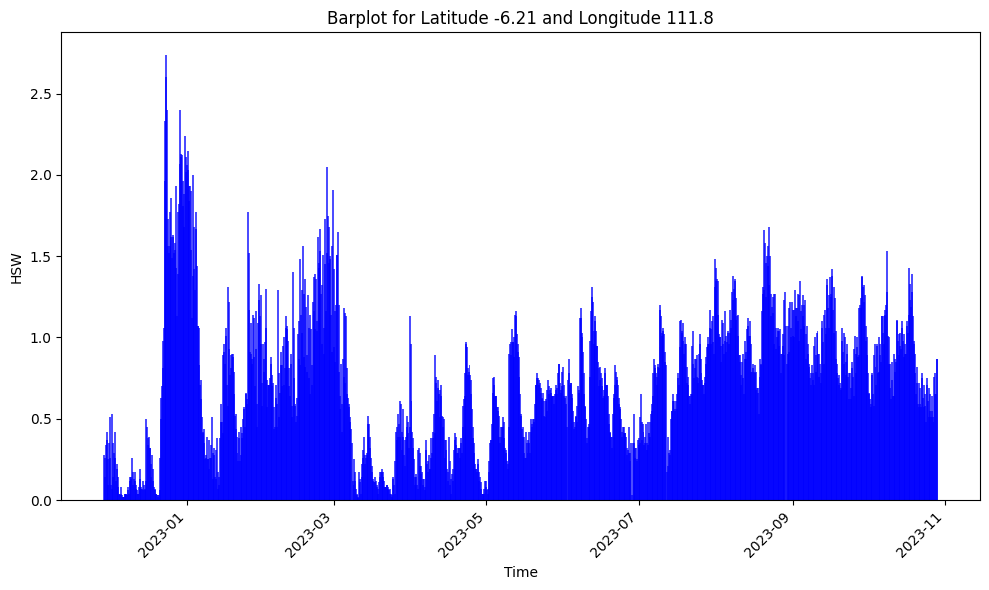

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

selected_lat = -6.21
selected_lon = 111.8

# Filter data
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)
selected_data = df.loc[lat_lon_filter, 'HSW']

# Plotting
plt.figure(figsize=(10, 6))

# Barplot
plt.bar(selected_data.index, selected_data, color='blue', alpha=0.7)
plt.title(f'Barplot for Latitude {selected_lat} and Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


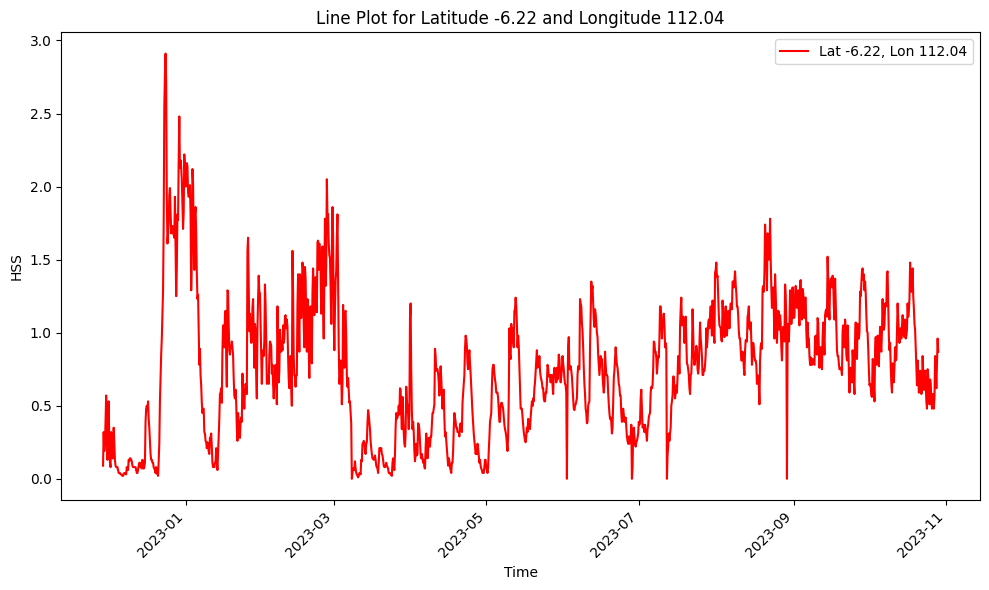

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Latitude and Longitude to be extracted
selected_lat = -6.22
selected_lon = 112.04

# Plotting
plt.figure(figsize=(10, 6))

# Filter data based on selected latitude and longitude
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color = 'red', label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot for Latitude {selected_lat} and Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSS')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

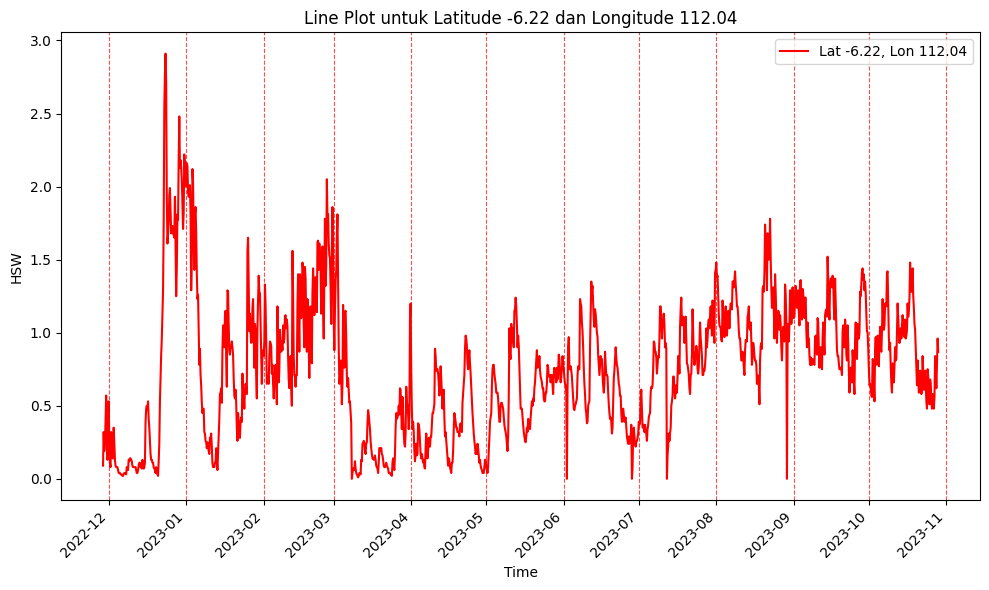

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

# Latitude and Longitude to be extracted
selected_lat = -6.22
selected_lon = 112.04

# Plotting
plt.figure(figsize=(10, 6))

# Filter data based on selected latitude and longitude
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color ='red',label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot untuk Latitude {selected_lat} dan Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()

#  grid lines
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.grid(True, linestyle='--', alpha=0.7, color='red')

plt.tight_layout()
plt.show()


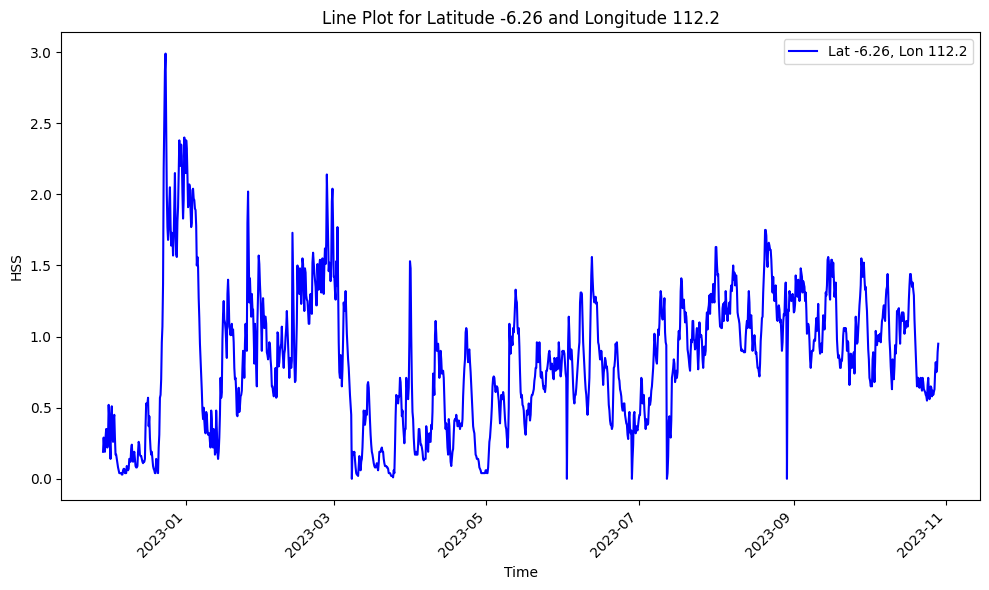

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Latitude and Longitude
selected_lat = -6.26
selected_lon = 112.2

# Plotting
plt.figure(figsize=(10, 6))

# Filter data
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'],color ='blue', label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot for Latitude {selected_lat} and Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSS')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

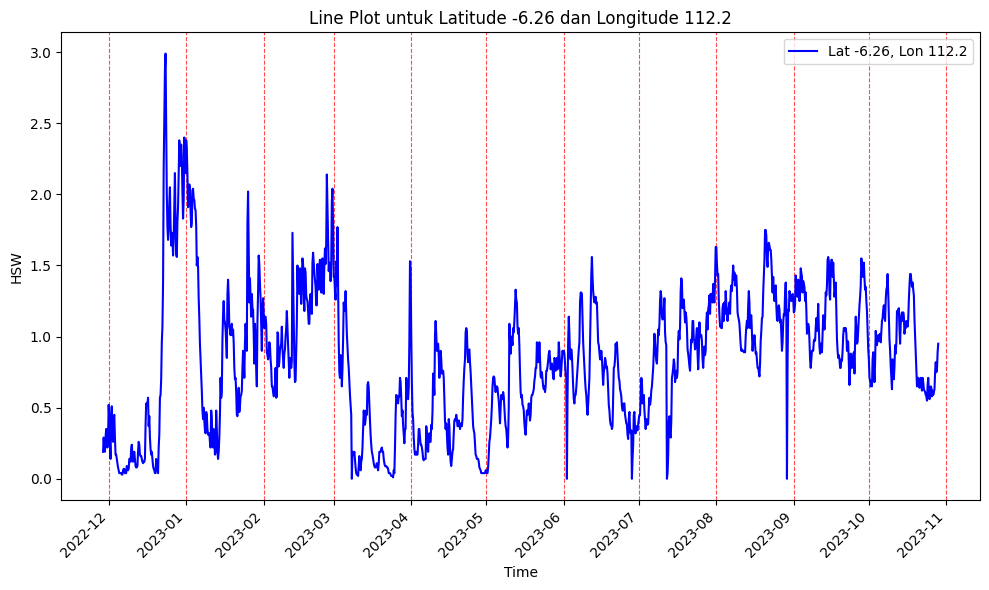

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

# Latitude and Longitude
selected_lat = -6.26
selected_lon = 112.2

# Plotting
plt.figure(figsize=(10, 6))

# Filter data
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color = 'blue',label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot untuk Latitude {selected_lat} dan Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()

#  grid lines
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.grid(True, linestyle='--', alpha=0.7, color='red')

plt.tight_layout()
plt.show()


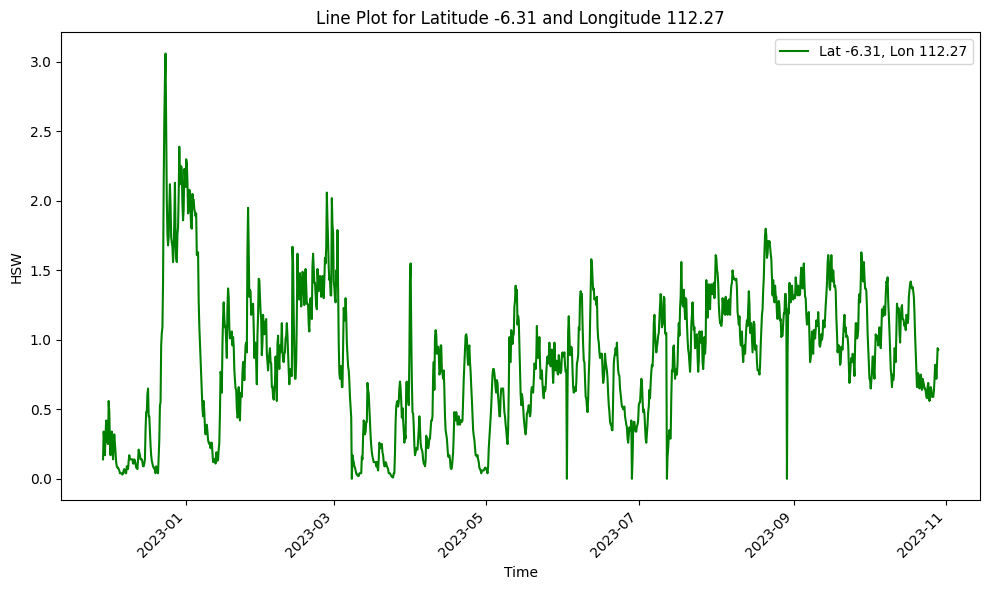

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with the given columns
# time, latitude, longitude, HSS

# Latitude and Longitude to be extracted
selected_lat = -6.31
selected_lon = 112.27

# Plotting
plt.figure(figsize=(10, 6))

# Filter data based on selected latitude and longitude
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color ='green',label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot for Latitude {selected_lat} and Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

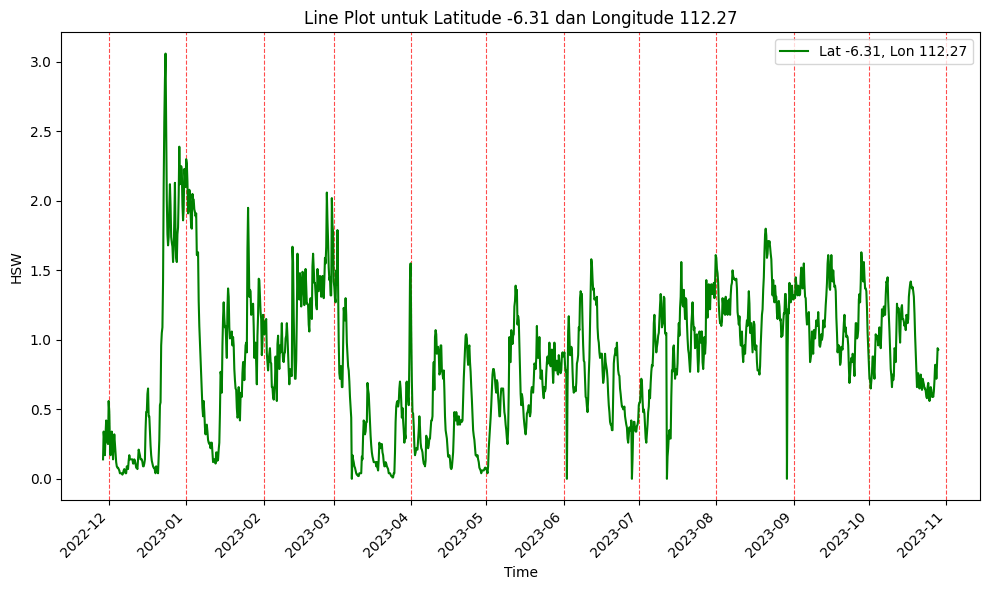

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import pandas as pd



# Latitude and Longitude to be extracted
selected_lat = -6.31
selected_lon = 112.27

# Plotting
plt.figure(figsize=(10, 6))

# Filter data based on selected latitude and longitude
lat_lon_filter = (df['latitude'] == selected_lat) & (df['longitude'] == selected_lon)

# Plot data
plt.plot(df.index[lat_lon_filter], df[lat_lon_filter]['HSW'], color ='green',label=f'Lat {selected_lat}, Lon {selected_lon}')

plt.title(f'Line Plot untuk Latitude {selected_lat} dan Longitude {selected_lon}')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Add red dashed grid lines at the beginning of each month
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.grid(True, linestyle='--', alpha=0.7, color='red')

plt.tight_layout()
plt.show()


## Plot setiap 4 Bulan

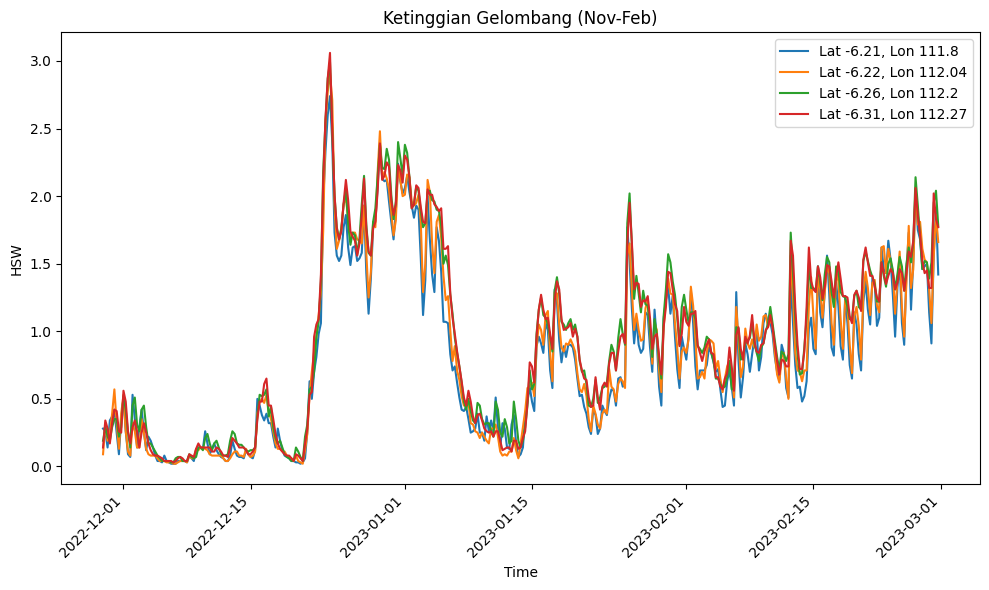

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV file
df = pd.read_csv("Tuban 6 jam update.csv", sep=';')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df = df.set_index('time')

# Plot
plt.figure(figsize=(10, 6))

for lat, lon in zip(df['latitude'].unique(), df['longitude'].unique()):
    # Filter data November-February
    time_filter = (df.index.month >= 11) | (df.index.month <= 2)

    # Filter long lat
    lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)

    # Combine filters
    combined_filter = lat_lon_filter & time_filter

    # Plot data
    plt.plot(df.loc[combined_filter, 'HSW'], label=f'Lat {lat}, Lon {lon}')

plt.title('Ketinggian Gelombang (Nov-Feb)')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


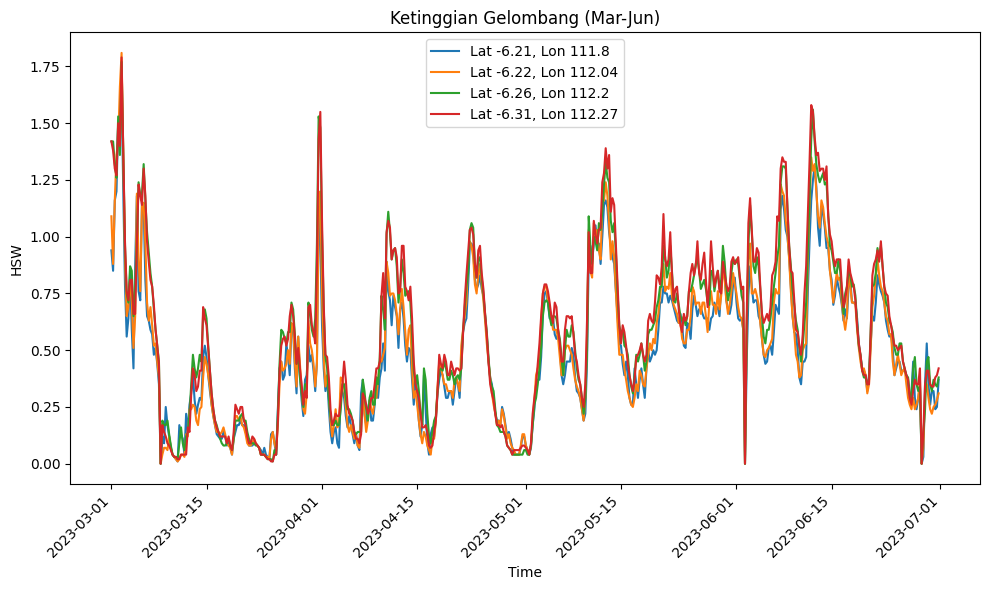

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot
plt.figure(figsize=(10, 6))

for lat, lon in zip(df['latitude'].unique(), df['longitude'].unique()):
    # Filter data March-June
    time_filter = (3 <= df.index.month) & (df.index.month <= 6)

    # Filter long lat
    lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)

    # Combine filters
    combined_filter = lat_lon_filter & time_filter

    # Plot data
    plt.plot(df.loc[combined_filter, 'HSW'], label=f'Lat {lat}, Lon {lon}')

plt.title('Ketinggian Gelombang (Mar-Jun)')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


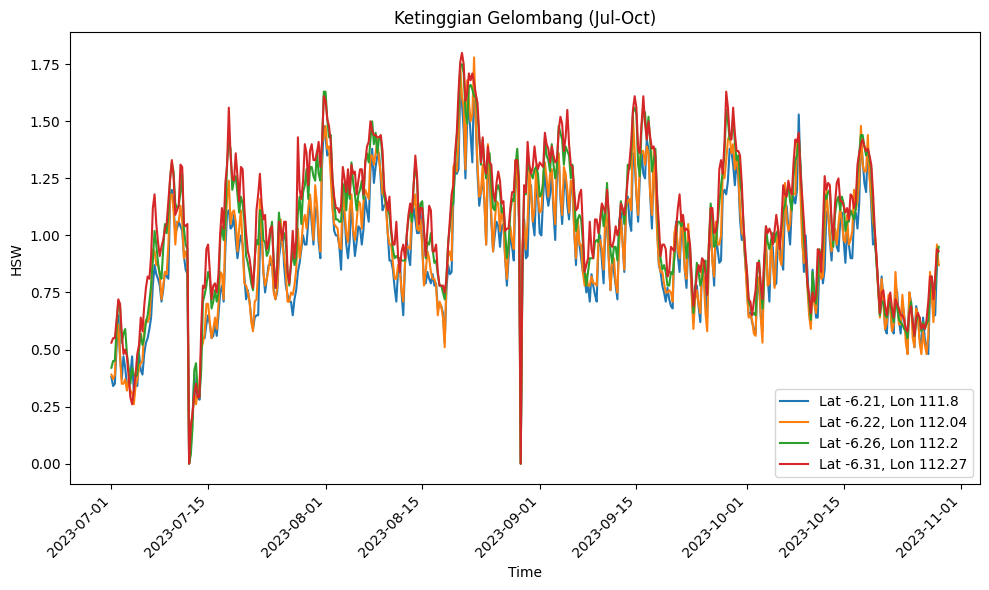

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot
plt.figure(figsize=(10, 6))

for lat, lon in zip(df['latitude'].unique(), df['longitude'].unique()):
    # Filter data July-October
    time_filter = (7 <= df.index.month) & (df.index.month <= 10)

    # Filter long lat
    lat_lon_filter = (df['latitude'] == lat) & (df['longitude'] == lon)

    # Combine filters
    combined_filter = lat_lon_filter & time_filter

    # Plot data
    plt.plot(df.loc[combined_filter, 'HSW'], label=f'Lat {lat}, Lon {lon}')

plt.title('Ketinggian Gelombang (Jul-Oct)')
plt.xlabel('Time')
plt.ylabel('HSW')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Pemodelan

# LSTM PER TITIK KOORDINAT

In [ ]:
!pip install scikeras

## Koordinat Pertama

**Longitude :   111.80**


**Langitude :   -6.21**

In [ ]:
df = pd.read_csv("Tuban 6 jam update.csv", sep=';',parse_dates=['time'])
df = df.set_index('time')
df

latitude  longitude   HSW
time                                          
2022-11-28 18:00:00     -6.21     111.80  0.28
2022-11-28 18:00:00     -6.22     112.04  0.09
2022-11-28 18:00:00     -6.26     112.20  0.19
2022-11-28 18:00:00     -6.31     112.27  0.14
2022-11-29 00:00:00     -6.21     111.80  0.26
...                       ...        ...   ...
2023-10-28 12:00:00     -6.31     112.27  0.94
2023-10-28 18:00:00     -6.21     111.80  0.87
2023-10-28 18:00:00     -6.22     112.04  0.87
2023-10-28 18:00:00     -6.26     112.20  0.95
2023-10-28 18:00:00     -6.31     112.27  0.93

[5348 rows x 3 columns]

In [ ]:
df1 = df[(df['latitude'] == -6.21) & (df['longitude'] == 111.80)]
df1

latitude  longitude   HSW
time                                          
2022-11-28 18:00:00     -6.21      111.8  0.28
2022-11-29 00:00:00     -6.21      111.8  0.26
2022-11-29 06:00:00     -6.21      111.8  0.14
2022-11-29 12:00:00     -6.21      111.8  0.34
2022-11-29 18:00:00     -6.21      111.8  0.37
...                       ...        ...   ...
2023-10-27 18:00:00     -6.21      111.8  0.78
2023-10-28 00:00:00     -6.21      111.8  0.65
2023-10-28 06:00:00     -6.21      111.8  0.65
2023-10-28 12:00:00     -6.21      111.8  0.87
2023-10-28 18:00:00     -6.21      111.8  0.87

[1337 rows x 3 columns]

In [ ]:
df1.describe()

latitude     longitude          HSW
count   1337.00  1.337000e+03  1337.000000
mean      -6.21  1.118000e+02     0.728242
std        0.00  1.421617e-14     0.442777
min       -6.21  1.118000e+02     0.000000
25%       -6.21  1.118000e+02     0.390000
50%       -6.21  1.118000e+02     0.710000
75%       -6.21  1.118000e+02     1.000000
max       -6.21  1.118000e+02     2.740000

In [ ]:
df1.tail(266)

latitude  longitude   HSW
time                                          
2023-08-23 12:00:00     -6.21      111.8  1.19
2023-08-23 18:00:00     -6.21      111.8  1.25
2023-08-24 00:00:00     -6.21      111.8  1.15
2023-08-24 06:00:00     -6.21      111.8  0.96
2023-08-24 12:00:00     -6.21      111.8  1.27
...                       ...        ...   ...
2023-10-27 18:00:00     -6.21      111.8  0.78
2023-10-28 00:00:00     -6.21      111.8  0.65
2023-10-28 06:00:00     -6.21      111.8  0.65
2023-10-28 12:00:00     -6.21      111.8  0.87
2023-10-28 18:00:00     -6.21      111.8  0.87

[266 rows x 3 columns]

In [ ]:
df1['HSW_Norm']

time
2022-11-28 18:00:00    0.102190
2022-11-29 00:00:00    0.094891
2022-11-29 06:00:00    0.051095
2022-11-29 12:00:00    0.124088
2022-11-29 18:00:00    0.135036
                         ...   
2023-10-27 18:00:00    0.284672
2023-10-28 00:00:00    0.237226
2023-10-28 06:00:00    0.237226
2023-10-28 12:00:00    0.317518
2023-10-28 18:00:00    0.317518
Name: HSW_Norm, Length: 1337, dtype: float64

In [ ]:
from tensorflow.keras.optimizers import Adam
# Normalisasi data
scaler = MinMaxScaler()
df1['HSW_Norm'] = scaler.fit_transform(df1[['HSW']])
df1['HSW_Norm']

rmse_eval = []
# Membuat sekuens data
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i+sequence_length]['HSW_Norm'].values)
        target.append(data.iloc[i+sequence_length]['HSW_Norm'])
    return np.array(sequences), np.array(target)

sequence_length = 8  # Sesuaikan dengan kebutuhan
X1, y1 = create_sequences(df1, sequence_length)

# Membagi data menjadi set pelatihan dan pengujian
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=False)

# Reshape untuk input model LSTM
X1_train = np.reshape(X1_train, (X1_train.shape[0], X1_train.shape[1], 1))
X1_test = np.reshape(X1_test, (X1_test.shape[0], X1_test.shape[1], 1))


<ipython-input-11-b298ab07a085>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HSW_Norm'] = scaler.fit_transform(df1[['HSW']])


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
from keras import optimizers

# Keras model untuk SciKeras
def create_model(optimizer='adam', lstm_neurons=50, activation='tanh', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation=activation, return_sequences=True, input_shape=(X1_train.shape[1], 1)))
    model.add(LSTM(lstm_neurons, return_sequences=True))
    model.add(LSTM(lstm_neurons))
    model.add(Dense(1))


    optimizer = optimizers.Adam(learning_rate=learning_rate)  # Adjust the optimizer as needed
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# keras model dg SciKeras wrapper
model = KerasRegressor(model=create_model, epochs=25, batch_size=1, verbose=2)

# Hyperparameter
param_grid = {
    'model__optimizer': ['adam'],
    'model__lstm_neurons': [30,50],
    'model__activation': ['tanh'],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}


# GridSearchCV

# GridSearchCV dg early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_result = grid.fit(X1_train, y1_train, callbacks=[early_stopping])

# menampilkan hyperparameter terbaik
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# ekstrak hasil
results = pd.DataFrame(grid_result.cv_results_)


Output streaming akan dipotong hingga 5000 baris terakhir.
11/11 - 0s - loss: 0.0082 - val_loss: 0.0072 - 98ms/epoch - 9ms/step
Epoch 14/100
11/11 - 0s - loss: 0.0081 - val_loss: 0.0070 - 98ms/epoch - 9ms/step
Epoch 15/100
11/11 - 0s - loss: 0.0079 - val_loss: 0.0066 - 98ms/epoch - 9ms/step
Epoch 16/100
11/11 - 0s - loss: 0.0077 - val_loss: 0.0068 - 96ms/epoch - 9ms/step
Epoch 17/100
11/11 - 0s - loss: 0.0072 - val_loss: 0.0055 - 98ms/epoch - 9ms/step
Epoch 18/100
11/11 - 0s - loss: 0.0069 - val_loss: 0.0059 - 98ms/epoch - 9ms/step
Epoch 19/100
11/11 - 0s - loss: 0.0067 - val_loss: 0.0056 - 96ms/epoch - 9ms/step
Epoch 20/100
11/11 - 0s - loss: 0.0063 - val_loss: 0.0054 - 98ms/epoch - 9ms/step
Epoch 21/100
11/11 - 0s - loss: 0.0066 - val_loss: 0.0058 - 96ms/epoch - 9ms/step
Epoch 22/100
11/11 - 0s - loss: 0.0068 - val_loss: 0.0046 - 96ms/epoch - 9ms/step
Epoch 23/100
11/11 - 0s - loss: 0.0063 - val_loss: 0.0043 - 97ms/epoch - 9ms/step
Epoch 24/100
11/11 - 0s - loss: 0.0056 - val_loss: 0

**Menyimpan hasil tuning**

In [ ]:
import pandas as pd

# Extract hasil dr GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)

# Function menghitung  RMSE
def calculate_rmse(y1_true, y1_pred):
    return np.sqrt(mean_squared_error(y1_true, y1_pred))

# menambah dalam dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# menampilkan hasil
results_with_rmse = results[['param_model__optimizer', 'param_model__lstm_neurons', 'param_model__activation', 'param_model__learning_rate', 'param_batch_size', 'param_epochs', 'mean_test_score', 'rmse']]

# Buat dataframe
print(results_with_rmse)

# menyimpan dataframe dalam csv
results_with_rmse.to_csv('grid_search_LSTM_Lokasi1.csv', index=False)

   param_model__optimizer param_model__lstm_neurons param_model__activation  \
0                    adam                        30                    tanh   
1                    adam                        50                    tanh   
2                    adam                        30                    tanh   
3                    adam                        50                    tanh   
4                    adam                        30                    tanh   
5                    adam                        50                    tanh   
6                    adam                        30                    tanh   
7                    adam                        50                    tanh   
8                    adam                        30                    tanh   
9                    adam                        50                    tanh   
10                   adam                        30                    tanh   
11                   adam                        50 

**PEMODELAN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# hyperparameter terbaik dr grid search
best_params = {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__lstm_neurons': 50, 'model__optimizer': 'adam'}

# membuat model
best_model = Sequential()
best_model.add(LSTM(units=best_params['model__lstm_neurons'],
                   activation=best_params['model__activation'],
                   return_sequences=True,
                   input_shape=(X1_train.shape[1], 1)))
best_model.add(LSTM(units=best_params['model__lstm_neurons'], return_sequences=True))
best_model.add(LSTM(units=best_params['model__lstm_neurons']))
best_model.add(Dense(units=1))

optimizer = Adam(learning_rate=best_params['model__learning_rate'])

best_model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)  # Adjust patience as needed

# Training model terbaik
best_model.fit(X1_train, y1_train, epochs=best_params['epochs'], callbacks=[early_stopping], batch_size=best_params['batch_size'], verbose=2)


#denormalisasi
y1_pred = best_model.predict(X1_test)
y1_pred_inv = scaler.inverse_transform(y1_pred)
y1_test_inv = scaler.inverse_transform(y1_test.reshape(-1, 1))
y11_test = y1_test.reshape(-1, 1)  #######
# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
mae = mean_absolute_error(y1_test, y1_pred)
mape = np.mean(np.abs((y11_test - y1_pred) / np.where(y11_test == 0, 1, y11_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

#best_model.summary()

Epoch 1/50
34/34 - 8s - loss: 0.0430 - 8s/epoch - 226ms/step
Epoch 2/50
34/34 - 1s - loss: 0.0116 - 506ms/epoch - 15ms/step
Epoch 3/50
34/34 - 1s - loss: 0.0080 - 546ms/epoch - 16ms/step
Epoch 4/50
34/34 - 1s - loss: 0.0071 - 540ms/epoch - 16ms/step
Epoch 5/50
34/34 - 1s - loss: 0.0065 - 540ms/epoch - 16ms/step
Epoch 6/50
34/34 - 1s - loss: 0.0053 - 532ms/epoch - 16ms/step
Epoch 7/50
34/34 - 1s - loss: 0.0047 - 765ms/epoch - 23ms/step
Epoch 8/50
34/34 - 1s - loss: 0.0046 - 859ms/epoch - 25ms/step
Epoch 9/50
34/34 - 1s - loss: 0.0038 - 850ms/epoch - 25ms/step
Epoch 10/50
34/34 - 1s - loss: 0.0036 - 766ms/epoch - 23ms/step
Epoch 11/50
34/34 - 1s - loss: 0.0038 - 636ms/epoch - 19ms/step
Epoch 12/50
34/34 - 1s - loss: 0.0034 - 564ms/epoch - 17ms/step
Epoch 13/50
34/34 - 1s - loss: 0.0036 - 600ms/epoch - 18ms/step
Epoch 14/50
34/34 - 1s - loss: 0.0035 - 597ms/epoch - 18ms/step
Epoch 15/50
34/34 - 1s - loss: 0.0036 - 575ms/epoch - 17ms/step
Epoch 16/50
34/34 - 1s - loss: 0.0034 - 575ms/epoch

In [ ]:
# Access and display the weights for the first LSTM layer
lstm_layer = best_model.layers[0]
if isinstance(lstm_layer, LSTM):
    print(f"\nLayer: {lstm_layer.name}")
    weights = lstm_layer.get_weights()

    # Extract weights for t=0
    if len(weights) > 2:
        units = best_params['model__lstm_neurons']
        W_i_t0, W_f_t0, W_c_t0, W_o_t0 = weights[0][:, :units], weights[0][:, units: units * 2], weights[0][:, units * 2: units * 3], weights[0][:, units * 3:]
        U_i_t0, U_f_t0, U_c_t0, U_o_t0 = weights[1][:, :units], weights[1][:, units: units * 2], weights[1][:, units * 2: units * 3], weights[1][:, units * 3:]
        b_i_t0, b_f_t0, b_c_t0, b_o_t0 = weights[2][:units], weights[2][units: units * 2], weights[2][units * 2: units * 3], weights[2][units * 3:]

        # Print weights for t=0
        print("\nWeights at t=0:")
        print(f"  W_i_t0:\n{W_i_t0}")
        print(f"  W_f_t0:\n{W_f_t0}")
        print(f"  W_c_t0:\n{W_c_t0}")
        print(f"  W_o_t0:\n{W_o_t0}")
        print(f"  U_i_t0:\n{U_i_t0}")
        print(f"  U_f_t0:\n{U_f_t0}")
        print(f"  U_c_t0:\n{U_c_t0}")
        print(f"  U_o_t0:\n{U_o_t0}")
        print(f"  b_i_t0:\n{b_i_t0}")
        print(f"  b_f_t0:\n{b_f_t0}")
        print(f"  b_c_t0:\n{b_c_t0}")
        print(f"  b_o_t0:\n{b_o_t0}")

    # # Extract weights for t=1
    # if len(weights) > 5:
    #     W_i_t1, W_f_t1, W_c_t1, W_o_t1 = weights[3][:, :units], weights[3][:, units: units * 2], weights[3][:, units * 2: units * 3], weights[3][:, units * 3:]
    #     U_i_t1, U_f_t1, U_c_t1, U_o_t1 = weights[4][:, :units], weights[4][:, units: units * 2], weights[4][:, units * 2: units * 3], weights[4][:, units * 3:]
    #     b_i_t1, b_f_t1, b_c_t1, b_o_t1 = weights[5][:units], weights[5][units: units * 2], weights[5][units * 2: units * 3], weights[5][units * 3:]

    #     # Print weights for t=1
    #     print("\nWeights at t=1:")
    #     print(f"  W_i_t1:\n{W_i_t1}")
    #     print(f"  W_f_t1:\n{W_f_t1}")
    #     print(f"  W_c_t1:\n{W_c_t1}")
    #     print(f"  W_o_t1:\n{W_o_t1}")
    #     print(f"  U_i_t1:\n{U_i_t1}")
    #     print(f"  U_f_t1:\n{U_f_t1}")
    #     print(f"  U_c_t1:\n{U_c_t1}")
    #     print(f"  U_o_t1:\n{U_o_t1}")
    #     print(f"  b_i_t1:\n{b_i_t1}")
    #     print(f"  b_f_t1:\n{b_f_t1}")
    #     print(f"  b_c_t1:\n{b_c_t1}")
    #     print(f"  b_o_t1:\n{b_o_t1}")
    # else:
    #     print("Weights at t=1 not available.")



Layer: lstm_603

Weights at t=0:
  W_i_t0:
[[ 0.05807456 -0.00380662  0.18687637  0.01221157 -0.06704096 -0.14419112
  -0.12938644 -0.11595848  0.09089273  0.07498057 -0.13635877  0.00915357
   0.00816148 -0.01956918  0.148758    0.12431757  0.12921077  0.02318679
  -0.22839035  0.02608789 -0.00849241 -0.06381235 -0.3486078   0.08323993
   0.05986878  0.09818518  0.13768159  0.01905707  0.11466124 -0.02321258
  -0.17862464  0.03478995 -0.07068997 -0.06265088 -0.02751379 -0.05123844
   0.04651815  0.14205046 -0.16846953 -0.16071102 -0.02991024 -0.3012094
  -0.0894055  -0.07068993 -0.13551982  0.1462534  -0.04217629  0.006744
   0.13488448  0.17872465]]
  W_f_t0:
[[-0.1260748  -0.24490035  0.22098337 -0.15239303  0.18285081 -0.13040352
  -0.05616925 -0.14005317  0.03638748 -0.0216329  -0.22013071  0.2280401
  -0.07362739  0.14080033  0.31980473  0.09525445 -0.21441296 -0.1466949
  -0.12062595  0.10578334  0.32917872  0.16918887 -0.7565902   0.0635296
   0.06858093  0.1103434   0.1175638

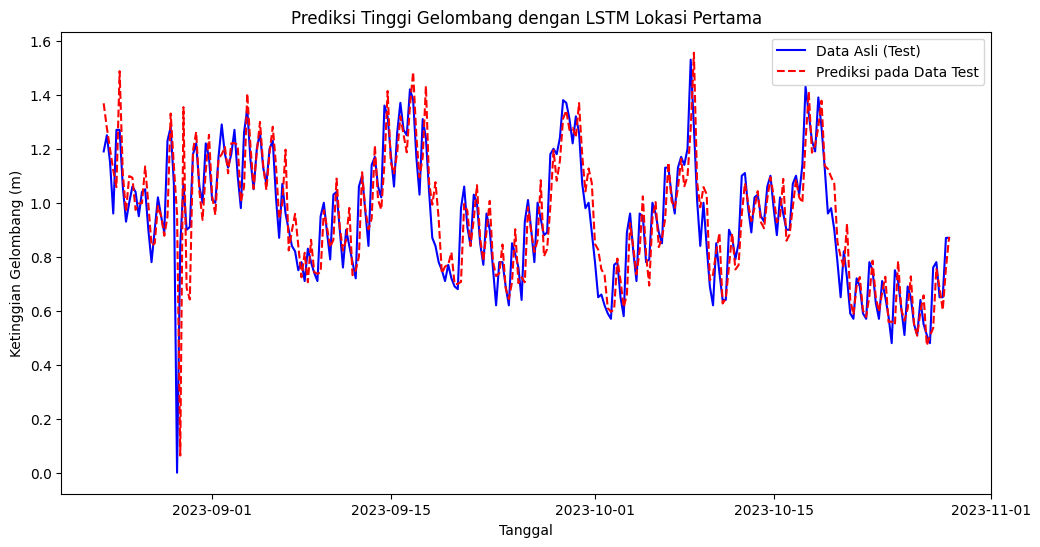

In [ ]:
# Plot prediksi VS nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df1.index[-len(y1_test):], y1_test_inv, label='Data Asli (Test)', color='blue')
plt.plot(df1.index[-len(y1_test):], y1_pred_inv, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.title('Prediksi Tinggi Gelombang dengan LSTM Lokasi Pertama')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang (m)')
plt.legend()
plt.show()

9/9 [==============================] - 0s 5ms/step


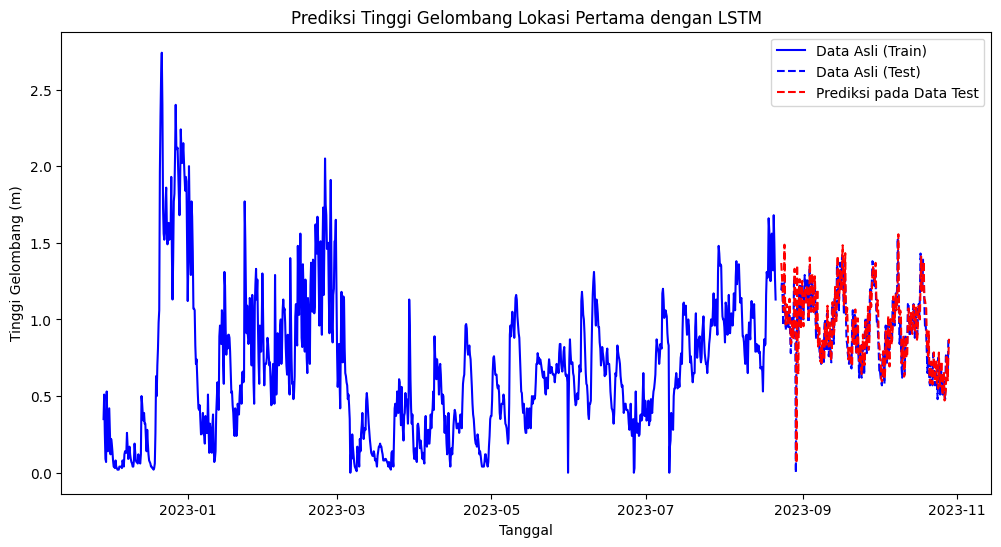

In [ ]:
# Plot tambahan
y1_test_pred = best_model.predict(X1_test)
y1_test_pred = scaler.inverse_transform(y1_test_pred)

train_index = df1.index[:len(y1_train)]
test_index = df1.index[-len(y1_test):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y1_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y1_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y1_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')

plt.title('Prediksi Tinggi Gelombang Lokasi Pertama dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Gelombang (m)')
plt.legend()
plt.show()

**Prediksi 30 hari kedepan**

1/1 [==============================] - 0s 25ms/step


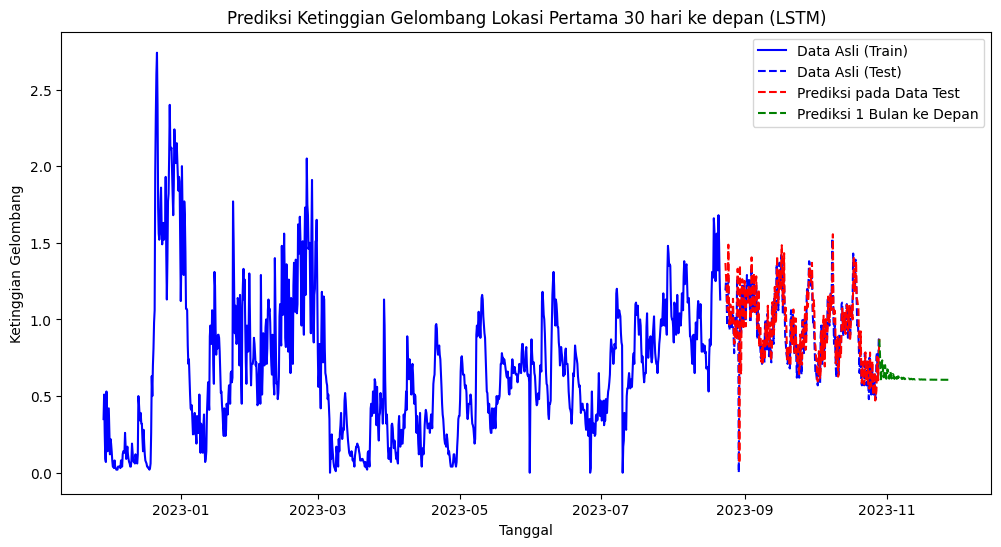

In [ ]:
HSW_Data = df1['HSW'].values.reshape((-1,1)).reshape((-1))
HSW_Data
# Prediksi 30 hari kedepan
def predict(num_prediction, model):
    prediction_list = HSW_Data[-8:]

    for _ in range(num_prediction):
        x = prediction_list[-8:]
        x = x.reshape((1, 8, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[8-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df1.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='6H')
    return prediction_dates

num_prediction = 120
forecast = predict(num_prediction, best_model)
forecast_dates = predict_dates(num_prediction)

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y1_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y1_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y1_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Pertama 30 hari ke depan (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

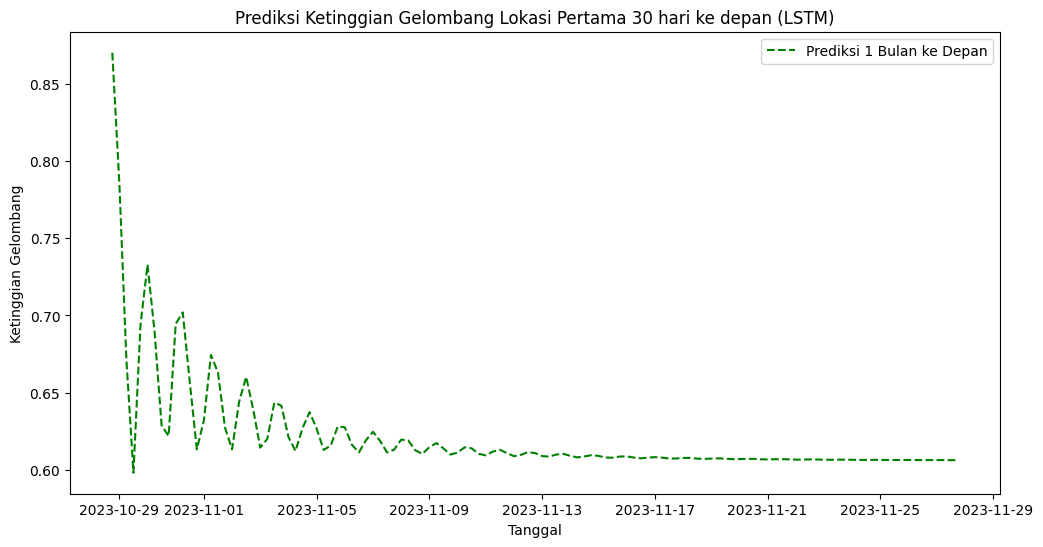

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Pertama 30 hari ke depan (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': forecast})

# Menampilkan DataFrame
future_df

Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-28 18:00:00                       0.870000
1   2023-10-29 00:00:00                       0.785843
2   2023-10-29 06:00:00                       0.671408
3   2023-10-29 12:00:00                       0.598186
4   2023-10-29 18:00:00                       0.693675
..                  ...                            ...
116 2023-11-26 18:00:00                       0.606360
117 2023-11-27 00:00:00                       0.606377
118 2023-11-27 06:00:00                       0.606348
119 2023-11-27 12:00:00                       0.606303
120 2023-11-27 18:00:00                       0.606296

[121 rows x 2 columns]

In [ ]:
# Menemukan indeks baris dengan nilai ketinggian gelombang terendah
indeks_rendah = future_df['Prediksi Ketinggian Gelombang'].idxmin()
tanggal_terendah = future_df.loc[indeks_rendah, 'Tanggal']
nilai_terendah = future_df.loc[indeks_rendah, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Terendah:", tanggal_terendah)
print("Nilai Ketinggian Gelombang Terendah:", nilai_terendah)

# Menemukan indeks baris dengan nilai ketinggian gelombang tertinggi
indeks_tinggi = future_df['Prediksi Ketinggian Gelombang'].idxmax()
tanggal_tertinggi = future_df.loc[indeks_tinggi, 'Tanggal']
nilai_tertinggi = future_df.loc[indeks_tinggi, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Tertinggi:", tanggal_tertinggi)
print("Nilai Ketinggian Gelombang Tertinggi:", nilai_tertinggi)

Tanggal dengan Ketinggian Gelombang Terendah: 2023-10-29 12:00:00
Nilai Ketinggian Gelombang Terendah: 0.5981860160827637
Tanggal dengan Ketinggian Gelombang Tertinggi: 2023-10-28 18:00:00
Nilai Ketinggian Gelombang Tertinggi: 0.87


In [ ]:
# Pprediksi pada data pelatihan
y1_train_pred = best_model.predict(X1_train)
y1_train_pred_inv = scaler.inverse_transform(y1_train_pred)

# membuat dataframe dari data pelatihan
train_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y1_train.reshape(-1, 1)).flatten(), 'Predicted': y1_train_pred_inv.flatten()})
print("Training Set Predictions:")
print(train_predictions_df)

# Prediksi pada data pengujian
y1_test_pred = best_model.predict(X1_test)
y1_test_pred_inv = scaler.inverse_transform(y1_test_pred)

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y1_test.reshape(-1, 1).flatten(), 'Predicted': y1_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)

# membuat dataframe dari data pengujian
test_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y1_test.reshape(-1, 1)).flatten(), 'Predicted': y1_test_pred_inv.flatten()})
print("\nTest Set Predictions:")
print(test_predictions_df)





34/34 [==============================] - 0s 8ms/step
Training Set Predictions:
      Actual  Predicted
0       0.35   0.169455
1       0.51   0.382428
2       0.26   0.411032
3       0.09   0.159913
4       0.07   0.213355
...      ...        ...
1058    1.32   1.357166
1059    1.68   1.424626
1060    1.50   1.865997
1061    1.27   1.243024
1062    1.13   1.205036

[1063 rows x 2 columns]
9/9 [==============================] - 0s 8ms/step

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.434307   0.499374
1    0.456204   0.466007
2    0.419708   0.437077
3    0.350365   0.408951
4    0.463504   0.386116
..        ...        ...
261  0.284672   0.276105
262  0.237226   0.249868
263  0.237226   0.220020
264  0.317518   0.276372
265  0.317518   0.318824

[266 rows x 2 columns]

Test Set Predictions:
     Actual  Predicted
0      1.19   1.368284
1      1.25   1.276860
2      1.15   1.197590
3      0.96   1.120526
4      1.27   1.057958
..      ...        ...
261 

In [ ]:
test_predictions_df.to_csv('test_predictions_df1.csv', index=False)

In [ ]:
#denormalisasi
# y1_pred = best_model.predict(X1_test)
# y1_pred_inv = scaler.inverse_transform(y1_pred)
# y1_test_inv = scaler.inverse_transform(y1_test.reshape(-1, 1))

# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
mae = mean_absolute_error(y1_test, y1_pred)
mape = np.mean(np.abs((y11_test - y1_pred) / np.where(y11_test == 0, 1, y11_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

# Membuat DataFrame
df_results = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y1_test.reshape(-1, 1).flatten(), 'Predicted': y1_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)
# Menyimpan DataFrame ke dalam file Excel
test_predictions_df_n.to_excel('hasil_prediksi1.xlsx', index=False)

# Menampilkan DataFrame
print("\nDataFrame:")
print(test_predictions_df_n)



Evaluation Metrics:
RMSE: 0.0457
MAE: 0.0298
MAPE: 8.5581%

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.434307   0.499374
1    0.456204   0.466007
2    0.419708   0.437077
3    0.350365   0.408951
4    0.463504   0.386116
..        ...        ...
261  0.284672   0.276105
262  0.237226   0.249868
263  0.237226   0.220020
264  0.317518   0.276372
265  0.317518   0.318824

[266 rows x 2 columns]

DataFrame:
       Actual  Predicted
0    0.434307   0.499374
1    0.456204   0.466007
2    0.419708   0.437077
3    0.350365   0.408951
4    0.463504   0.386116
..        ...        ...
261  0.284672   0.276105
262  0.237226   0.249868
263  0.237226   0.220020
264  0.317518   0.276372
265  0.317518   0.318824

[266 rows x 2 columns]


## Koordinat Kedua

**Longitude :   112.04**


**Langitude :   -6.22**



In [ ]:
df2 = df[(df['latitude'] == -6.22) & (df['longitude'] == 112.04)]
df2

latitude  longitude   HSW
time                                          
2022-11-28 18:00:00     -6.22     112.04  0.09
2022-11-29 00:00:00     -6.22     112.04  0.32
2022-11-29 06:00:00     -6.22     112.04  0.19
2022-11-29 12:00:00     -6.22     112.04  0.24
2022-11-29 18:00:00     -6.22     112.04  0.39
...                       ...        ...   ...
2023-10-27 18:00:00     -6.22     112.04  0.74
2023-10-28 00:00:00     -6.22     112.04  0.62
2023-10-28 06:00:00     -6.22     112.04  0.79
2023-10-28 12:00:00     -6.22     112.04  0.96
2023-10-28 18:00:00     -6.22     112.04  0.87

[1337 rows x 3 columns]

In [ ]:
df2.describe()

latitude     longitude          HSW
count   1337.00  1.337000e+03  1337.000000
mean      -6.22  1.120400e+02     0.757943
std        0.00  1.421617e-14     0.469068
min       -6.22  1.120400e+02     0.000000
25%       -6.22  1.120400e+02     0.390000
50%       -6.22  1.120400e+02     0.750000
75%       -6.22  1.120400e+02     1.060000
max       -6.22  1.120400e+02     2.910000

In [ ]:
df2.tail(266)

latitude  longitude   HSW
time                                                
2023-08-23 12:00:00+00:00     -6.22     112.04  1.19
2023-08-23 18:00:00+00:00     -6.22     112.04  1.31
2023-08-24 00:00:00+00:00     -6.22     112.04  1.15
2023-08-24 06:00:00+00:00     -6.22     112.04  0.96
2023-08-24 12:00:00+00:00     -6.22     112.04  1.40
...                             ...        ...   ...
2023-10-27 18:00:00+00:00     -6.22     112.04  0.74
2023-10-28 00:00:00+00:00     -6.22     112.04  0.62
2023-10-28 06:00:00+00:00     -6.22     112.04  0.79
2023-10-28 12:00:00+00:00     -6.22     112.04  0.96
2023-10-28 18:00:00+00:00     -6.22     112.04  0.87

[266 rows x 3 columns]

In [ ]:
df2['HSW_Norm']

time
2022-11-28 18:00:00    0.030928
2022-11-29 00:00:00    0.109966
2022-11-29 06:00:00    0.065292
2022-11-29 12:00:00    0.082474
2022-11-29 18:00:00    0.134021
                         ...   
2023-10-27 18:00:00    0.254296
2023-10-28 00:00:00    0.213058
2023-10-28 06:00:00    0.271478
2023-10-28 12:00:00    0.329897
2023-10-28 18:00:00    0.298969
Name: HSW_Norm, Length: 1337, dtype: float64

In [ ]:
from tensorflow.keras.optimizers import Adam
# Normalisasi data
scaler = MinMaxScaler()
df2['HSW_Norm'] = scaler.fit_transform(df2[['HSW']])
df2['HSW_Norm']

rmse_eval = []
# Membuat sekuens data
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i+sequence_length]['HSW_Norm'].values)
        target.append(data.iloc[i+sequence_length]['HSW_Norm'])
    return np.array(sequences), np.array(target)

sequence_length = 8  # Sesuaikan dengan kebutuhan
X2, y2 = create_sequences(df2, sequence_length)

# Membagi data menjadi set pelatihan dan pengujian
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=False)

# Reshape untuk input model LSTM
X2_train = np.reshape(X2_train, (X2_train.shape[0], X2_train.shape[1], 1))
X2_test = np.reshape(X2_test, (X2_test.shape[0], X2_test.shape[1], 1))


<ipython-input-14-6f2cf28f8abc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HSW_Norm'] = scaler.fit_transform(df2[['HSW']])


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
from keras import optimizers

# Keras model
def create_model(optimizer='adam', lstm_neurons=50, activation='tanh', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation=activation, return_sequences=True, input_shape=(X2_train.shape[1], 1)))
    model.add(LSTM(lstm_neurons, return_sequences=True))
    model.add(LSTM(lstm_neurons))
    model.add(Dense(1))

    optimizer = optimizers.Adam(learning_rate=learning_rate)  # Adjust the optimizer as needed
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Keras model dg SciKeras wrapper
model = KerasRegressor(model=create_model, epochs=25, batch_size=1, verbose=2)

# Hyperparameter
param_grid = {
    'model__optimizer': ['adam'],
    'model__lstm_neurons': [30,50],
    'model__activation': ['tanh'],
    'model__learning_rate': [0.001, 0.01, 0.1],  # Add learning_rate to the param_grid
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# GridSearchCV

# GridSearchCV dg early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_result = grid.fit(X2_train, y2_train, callbacks=[early_stopping], validation_split=0.2)

# Menampilkan hyperparameter terbaik
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Extrak hasil GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)


Output streaming akan dipotong hingga 5000 baris terakhir.
11/11 - 0s - loss: 0.0077 - val_loss: 0.0067 - 92ms/epoch - 8ms/step
Epoch 14/100
11/11 - 0s - loss: 0.0071 - val_loss: 0.0059 - 106ms/epoch - 10ms/step
Epoch 15/100
11/11 - 0s - loss: 0.0070 - val_loss: 0.0057 - 94ms/epoch - 9ms/step
Epoch 16/100
11/11 - 0s - loss: 0.0065 - val_loss: 0.0052 - 101ms/epoch - 9ms/step
Epoch 17/100
11/11 - 0s - loss: 0.0061 - val_loss: 0.0046 - 93ms/epoch - 8ms/step
Epoch 18/100
11/11 - 0s - loss: 0.0061 - val_loss: 0.0047 - 96ms/epoch - 9ms/step
Epoch 19/100
11/11 - 0s - loss: 0.0074 - val_loss: 0.0042 - 94ms/epoch - 9ms/step
Epoch 20/100
11/11 - 0s - loss: 0.0068 - val_loss: 0.0053 - 103ms/epoch - 9ms/step
Epoch 21/100
11/11 - 0s - loss: 0.0054 - val_loss: 0.0058 - 95ms/epoch - 9ms/step
Epoch 22/100
11/11 - 0s - loss: 0.0055 - val_loss: 0.0040 - 95ms/epoch - 9ms/step
Epoch 23/100
11/11 - 0s - loss: 0.0051 - val_loss: 0.0041 - 104ms/epoch - 9ms/step
Epoch 24/100
11/11 - 0s - loss: 0.0047 - val_lo

**Menyimpan hasil tuning**

In [ ]:
import pandas as pd

# Extract hasil dr GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)

# Fungsi menghitung  RMSE
def calculate_rmse(y2_true, y2_pred):
    return np.sqrt(mean_squared_error(y2_true, y2_pred))

# menambah dalam dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# menampilkan hasil
results_with_rmse = results[['param_model__optimizer', 'param_model__lstm_neurons', 'param_model__activation', 'param_model__learning_rate', 'param_batch_size', 'param_epochs', 'mean_test_score', 'rmse']]

# Buat dataframe
print(results_with_rmse)

# menyimpan dataframe dalam csv
results_with_rmse.to_csv('grid_search_LSTM_Lokasi2.csv', index=False)

   param_model__optimizer param_model__lstm_neurons param_model__activation  \
0                    adam                        30                    tanh   
1                    adam                        50                    tanh   
2                    adam                        30                    tanh   
3                    adam                        50                    tanh   
4                    adam                        30                    tanh   
5                    adam                        50                    tanh   
6                    adam                        30                    tanh   
7                    adam                        50                    tanh   
8                    adam                        30                    tanh   
9                    adam                        50                    tanh   
10                   adam                        30                    tanh   
11                   adam                        50 

**Pemodelan**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# hyperparameters terbaik
best_params = {'batch_size': 64, 'epochs': 100, 'model__activation': 'tanh', 'model__learning_rate': 0.001, 'model__lstm_neurons': 50, 'model__optimizer': 'adam'}

# Model
best_model = Sequential()
best_model.add(LSTM(units=best_params['model__lstm_neurons'],
                   activation=best_params['model__activation'],
                   return_sequences=True,
                   input_shape=(X2_train.shape[1], 1)))
best_model.add(LSTM(units=best_params['model__lstm_neurons'], return_sequences=True))
best_model.add(LSTM(units=best_params['model__lstm_neurons']))
best_model.add(Dense(units=1))

optimizer = Adam(learning_rate=best_params['model__learning_rate'])

best_model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)  # Adjust patience as needed

# Training model terbaik
best_model.fit(X2_train, y2_train, epochs=best_params['epochs'], callbacks=[early_stopping], batch_size=best_params['batch_size'], verbose=2)


#denormalisasi
y2_pred = best_model.predict(X2_test)
y2_pred_inv = scaler.inverse_transform(y2_pred)
y2_test_inv = scaler.inverse_transform(y2_test.reshape(-1, 1))
y22_test = y2_test.reshape(-1, 1)  #######
# Display the predictions
# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae = mean_absolute_error(y2_test, y2_pred)
mape = np.mean(np.abs((y22_test - y2_pred) / np.where(y22_test == 0, 1, y22_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
best_model.summary()

Epoch 1/100
17/17 - 6s - loss: 0.0371 - 6s/epoch - 371ms/step
Epoch 2/100
17/17 - 0s - loss: 0.0140 - 454ms/epoch - 27ms/step
Epoch 3/100
17/17 - 0s - loss: 0.0098 - 278ms/epoch - 16ms/step
Epoch 4/100
17/17 - 0s - loss: 0.0092 - 303ms/epoch - 18ms/step
Epoch 5/100
17/17 - 0s - loss: 0.0090 - 279ms/epoch - 16ms/step
Epoch 6/100
17/17 - 0s - loss: 0.0089 - 269ms/epoch - 16ms/step
Epoch 7/100
17/17 - 0s - loss: 0.0087 - 279ms/epoch - 16ms/step
Epoch 8/100
17/17 - 0s - loss: 0.0087 - 292ms/epoch - 17ms/step
Epoch 9/100
17/17 - 0s - loss: 0.0083 - 274ms/epoch - 16ms/step
Epoch 10/100
17/17 - 0s - loss: 0.0083 - 285ms/epoch - 17ms/step
Epoch 11/100
17/17 - 0s - loss: 0.0078 - 292ms/epoch - 17ms/step
Epoch 12/100
17/17 - 0s - loss: 0.0076 - 270ms/epoch - 16ms/step
Epoch 13/100
17/17 - 0s - loss: 0.0076 - 277ms/epoch - 16ms/step
Epoch 14/100
17/17 - 0s - loss: 0.0072 - 285ms/epoch - 17ms/step
Epoch 15/100
17/17 - 0s - loss: 0.0066 - 293ms/epoch - 17ms/step
Epoch 16/100
17/17 - 0s - loss: 0.00

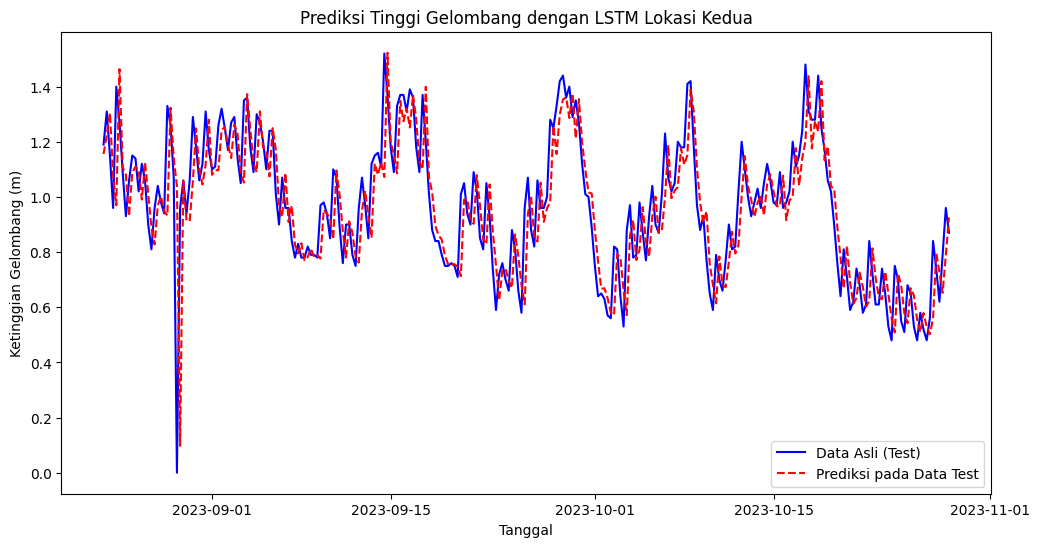

In [ ]:
# Plot prediksi VS nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df2.index[-len(y2_test):], y2_test_inv, label='Data Asli (Test)', color='blue')
plt.plot(df2.index[-len(y2_test):], y2_pred_inv, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.title('Prediksi Tinggi Gelombang dengan LSTM Lokasi Kedua')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang (m)')
plt.legend()
plt.show()

9/9 [==============================] - 0s 5ms/step


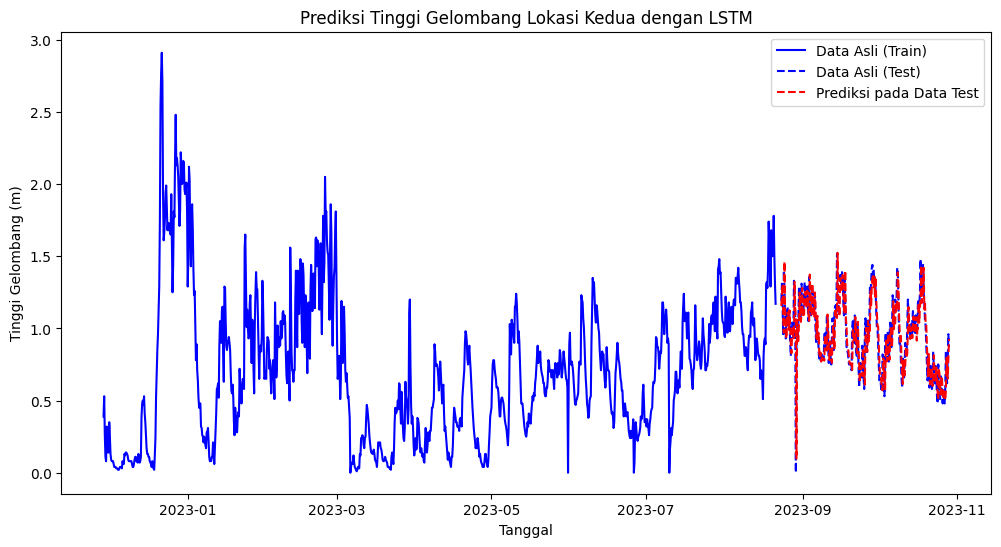

In [ ]:
# Plot tambahan
y2_test_pred = best_model.predict(X2_test)
y2_test_pred = scaler.inverse_transform(y2_test_pred)

train_index = df2.index[:len(y2_train)]
test_index = df2.index[-len(y2_test):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y2_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y2_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y2_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')

plt.title('Prediksi Tinggi Gelombang Lokasi Kedua dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Gelombang (m)')
plt.legend()
plt.show()

**Prediksi 30 hari kedepan**

1/1 [==============================] - 0s 21ms/step


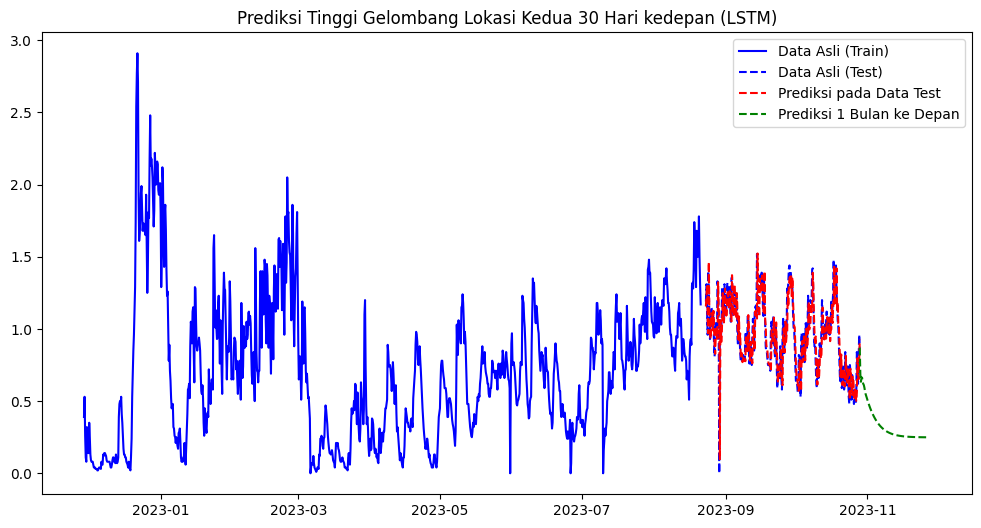

In [ ]:
HSW_Data = df2['HSW'].values.reshape((-1,1)).reshape((-1))
HSW_Data
# Prediksi 30 hari kedepan
def predict(num_prediction, model):
    prediction_list = HSW_Data[-8:]

    for _ in range(num_prediction):
        x = prediction_list[-8:]
        x = x.reshape((1, 8, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[8-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df2.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='6H')
    return prediction_dates

num_prediction = 120
forecast = predict(num_prediction, best_model)
forecast_dates = predict_dates(num_prediction)

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y2_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y2_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y2_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Tinggi Gelombang Lokasi Kedua 30 Hari kedepan (LSTM)')
plt.legend()
plt.show()

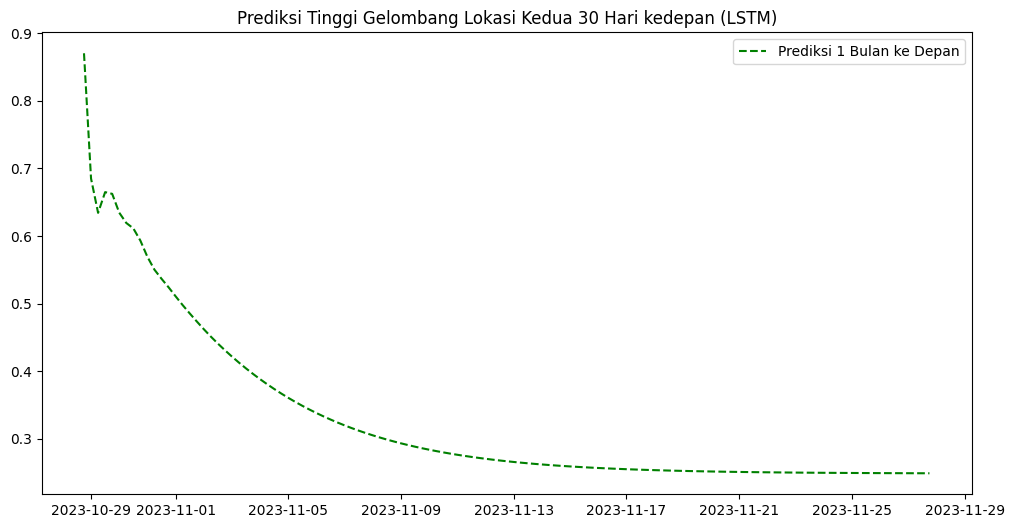

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Tinggi Gelombang Lokasi Kedua 30 Hari kedepan (LSTM)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': forecast})

# Menampilkan DataFrame
future_df

Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-28 18:00:00                       0.870000
1   2023-10-29 00:00:00                       0.684885
2   2023-10-29 06:00:00                       0.634130
3   2023-10-29 12:00:00                       0.664768
4   2023-10-29 18:00:00                       0.662236
..                  ...                            ...
116 2023-11-26 18:00:00                       0.249336
117 2023-11-27 00:00:00                       0.249301
118 2023-11-27 06:00:00                       0.249268
119 2023-11-27 12:00:00                       0.249236
120 2023-11-27 18:00:00                       0.249207

[121 rows x 2 columns]

In [ ]:
# Menemukan indeks baris dengan nilai ketinggian gelombang terendah
indeks_rendah = future_df['Prediksi Ketinggian Gelombang'].idxmin()
tanggal_terendah = future_df.loc[indeks_rendah, 'Tanggal']
nilai_terendah = future_df.loc[indeks_rendah, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Terendah:", tanggal_terendah)
print("Nilai Ketinggian Gelombang Terendah:", nilai_terendah)

# Menemukan indeks baris dengan nilai ketinggian gelombang tertinggi
indeks_tinggi = future_df['Prediksi Ketinggian Gelombang'].idxmax()
tanggal_tertinggi = future_df.loc[indeks_tinggi, 'Tanggal']
nilai_tertinggi = future_df.loc[indeks_tinggi, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Tertinggi:", tanggal_tertinggi)
print("Nilai Ketinggian Gelombang Tertinggi:", nilai_tertinggi)

Tanggal dengan Ketinggian Gelombang Terendah: 2023-11-27 18:00:00
Nilai Ketinggian Gelombang Terendah: 0.249207004904747
Tanggal dengan Ketinggian Gelombang Tertinggi: 2023-10-28 18:00:00
Nilai Ketinggian Gelombang Tertinggi: 0.87


In [ ]:
# Pprediksi pada data pelatihan
y2_train_pred = best_model.predict(X2_train)
y2_train_pred_inv = scaler.inverse_transform(y2_train_pred)

# membuat dataframe dari data pelatihan
train_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y2_train.reshape(-1, 1)).flatten(), 'Predicted': y2_train_pred_inv.flatten()})
print("Training Set Predictions:")
print(train_predictions_df)

# Prediksi pada data pengujian
y2_test_pred = best_model.predict(X2_test)
y2_test_pred_inv = scaler.inverse_transform(y2_test_pred)

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y2_test.reshape(-1, 1).flatten(), 'Predicted': y2_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)

# membuat dataframe dari data pengujian
test_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y2_test.reshape(-1, 1)).flatten(), 'Predicted': y2_test_pred_inv.flatten()})
print("\nTest Set Predictions:")
print(test_predictions_df)

34/34 [==============================] - 0s 8ms/step
Training Set Predictions:
      Actual  Predicted
0       0.39   0.243486
1       0.53   0.367364
2       0.26   0.492440
3       0.11   0.331457
4       0.08   0.200843
...      ...        ...
1058    1.53   1.493551
1059    1.78   1.491351
1060    1.50   1.758626
1061    1.31   1.268324
1062    1.17   1.339465

[1063 rows x 2 columns]
9/9 [==============================] - 0s 9ms/step

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.408935   0.397124
1    0.450172   0.420954
2    0.395189   0.448314
3    0.329897   0.369585
4    0.481100   0.333262
..        ...        ...
261  0.254296   0.273926
262  0.213058   0.250007
263  0.271478   0.224107
264  0.329897   0.271521
265  0.298969   0.318047

[266 rows x 2 columns]

Test Set Predictions:
     Actual  Predicted
0      1.19   1.155630
1      1.31   1.224976
2      1.15   1.304595
3      0.96   1.075493
4      1.40   0.969792
..      ...        ...
261 

In [ ]:
#denormalisasi
y2_pred = best_model.predict(X2_test)
y2_pred_inv = scaler.inverse_transform(y2_pred)
y2_test_inv = scaler.inverse_transform(y2_test.reshape(-1, 1))

# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae = mean_absolute_error(y2_test, y2_pred)
mape = np.mean(np.abs((y22_test - y2_pred) / np.where(y22_test == 0, 1, y22_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")



# Menyimpan DataFrame ke dalam file Excel
test_predictions_df_n.to_excel('hasil_prediksi_lstm2.xlsx', index=False)

# Menampilkan DataFrame
print("\nDataFrame:")
print(test_predictions_df_n)


9/9 [==============================] - 0s 5ms/step

Evaluation Metrics:
RMSE: 0.0516
MAE: 0.0358
MAPE: 10.6853%

DataFrame:
       Actual  Predicted
0    0.408935   0.397124
1    0.450172   0.420954
2    0.395189   0.448314
3    0.329897   0.369585
4    0.481100   0.333262
..        ...        ...
261  0.254296   0.273926
262  0.213058   0.250007
263  0.271478   0.224107
264  0.329897   0.271521
265  0.298969   0.318047

[266 rows x 2 columns]


## Koordinat Ketiga


**Longitude :   112.20**


**Langitude :   -6.26**


In [ ]:
df3 = df[(df['latitude'] == -6.26) & (df['longitude'] == 112.20)]
df3

latitude  longitude   HSW
time                                          
2022-11-28 18:00:00     -6.26      112.2  0.19
2022-11-29 00:00:00     -6.26      112.2  0.29
2022-11-29 06:00:00     -6.26      112.2  0.22
2022-11-29 12:00:00     -6.26      112.2  0.19
2022-11-29 18:00:00     -6.26      112.2  0.29
...                       ...        ...   ...
2023-10-27 18:00:00     -6.26      112.2  0.82
2023-10-28 00:00:00     -6.26      112.2  0.75
2023-10-28 06:00:00     -6.26      112.2  0.77
2023-10-28 12:00:00     -6.26      112.2  0.89
2023-10-28 18:00:00     -6.26      112.2  0.95

[1337 rows x 3 columns]

In [ ]:
df3.describe()

latitude     longitude          HSW
count  1.337000e+03  1.337000e+03  1337.000000
mean  -6.260000e+00  1.122000e+02     0.843156
std    8.885108e-16  1.421617e-14     0.490341
min   -6.260000e+00  1.122000e+02     0.000000
25%   -6.260000e+00  1.122000e+02     0.470000
50%   -6.260000e+00  1.122000e+02     0.840000
75%   -6.260000e+00  1.122000e+02     1.170000
max   -6.260000e+00  1.122000e+02     2.990000

In [ ]:
df3.tail(266)

latitude  longitude   HSW
time                                                
2023-08-23 12:00:00+00:00     -6.26      112.2  1.31
2023-08-23 18:00:00+00:00     -6.26      112.2  1.42
2023-08-24 00:00:00+00:00     -6.26      112.2  1.31
2023-08-24 06:00:00+00:00     -6.26      112.2  1.25
2023-08-24 12:00:00+00:00     -6.26      112.2  1.33
...                             ...        ...   ...
2023-10-27 18:00:00+00:00     -6.26      112.2  0.82
2023-10-28 00:00:00+00:00     -6.26      112.2  0.75
2023-10-28 06:00:00+00:00     -6.26      112.2  0.77
2023-10-28 12:00:00+00:00     -6.26      112.2  0.89
2023-10-28 18:00:00+00:00     -6.26      112.2  0.95

[266 rows x 3 columns]

In [ ]:
df3['HSW_Norm']

time
2022-11-28 18:00:00    0.063545
2022-11-29 00:00:00    0.096990
2022-11-29 06:00:00    0.073579
2022-11-29 12:00:00    0.063545
2022-11-29 18:00:00    0.096990
                         ...   
2023-10-27 18:00:00    0.274247
2023-10-28 00:00:00    0.250836
2023-10-28 06:00:00    0.257525
2023-10-28 12:00:00    0.297659
2023-10-28 18:00:00    0.317726
Name: HSW_Norm, Length: 1337, dtype: float64

In [ ]:
from tensorflow.keras.optimizers import Adam
# Normalisasi data
scaler = MinMaxScaler()
df3['HSW_Norm'] = scaler.fit_transform(df3[['HSW']])
df3['HSW_Norm']

rmse_eval = []
# Membuat sekuens data
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i+sequence_length]['HSW_Norm'].values)
        target.append(data.iloc[i+sequence_length]['HSW_Norm'])
    return np.array(sequences), np.array(target)

sequence_length = 8  # Sesuaikan dengan kebutuhan
X3, y3 = create_sequences(df3, sequence_length)

# Membagi data menjadi set pelatihan dan pengujian
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=False)

# Reshape untuk input model LSTM
X3_train = np.reshape(X3_train, (X3_train.shape[0], X3_train.shape[1], 1))
X3_test = np.reshape(X3_test, (X3_test.shape[0], X3_test.shape[1], 1))


<ipython-input-17-8eff39db32fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['HSW_Norm'] = scaler.fit_transform(df3[['HSW']])


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
from keras import optimizers

#  Keras model SciKeras
def create_model(optimizer='adam', lstm_neurons=50, activation='tanh', learning_rate=0.001):
    # Note: Add learning_rate to the function parameters
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation=activation, return_sequences=True, input_shape=(X3_train.shape[1], 1)))
    model.add(LSTM(lstm_neurons, return_sequences=True))
    model.add(LSTM(lstm_neurons))
    model.add(Dense(1))

    # Note: Pass learning_rate to the optimizer
    optimizer = optimizers.Adam(learning_rate=learning_rate)  # Adjust the optimizer as needed
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Keras model with SciKeras wrapper
model = KerasRegressor(model=create_model, epochs=25, batch_size=1, verbose=2)

# Hyperparameters to be optimized
param_grid = {
    'model__optimizer': ['adam'],
    'model__lstm_neurons': [30,50],
    'model__activation': ['tanh'],
    'model__learning_rate': [0.001, 0.01, 0.1],  # Add learning_rate to the param_grid
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# GridSearchCV

# GridSearchCV with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Include early stopping in fit
grid_result = grid.fit(X3_train, y3_train, callbacks=[early_stopping], validation_split=0.2)

# Display the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Extract results from GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)


Output streaming akan dipotong hingga 5000 baris terakhir.
Epoch 64/100
11/11 - 0s - loss: 0.0023 - val_loss: 0.0018 - 93ms/epoch - 8ms/step
Epoch 65/100
11/11 - 0s - loss: 0.0023 - val_loss: 0.0017 - 95ms/epoch - 9ms/step
Epoch 66/100
11/11 - 0s - loss: 0.0022 - val_loss: 0.0025 - 89ms/epoch - 8ms/step
Epoch 67/100
11/11 - 0s - loss: 0.0022 - val_loss: 0.0017 - 92ms/epoch - 8ms/step
Epoch 68/100
11/11 - 0s - loss: 0.0021 - val_loss: 0.0017 - 93ms/epoch - 8ms/step
Epoch 69/100
11/11 - 0s - loss: 0.0021 - val_loss: 0.0028 - 89ms/epoch - 8ms/step
Epoch 70/100
11/11 - 0s - loss: 0.0021 - val_loss: 0.0019 - 90ms/epoch - 8ms/step
Epoch 71/100
11/11 - 0s - loss: 0.0020 - val_loss: 0.0018 - 90ms/epoch - 8ms/step
Epoch 72/100
11/11 - 0s - loss: 0.0020 - val_loss: 0.0017 - 91ms/epoch - 8ms/step
Epoch 73/100
11/11 - 0s - loss: 0.0020 - val_loss: 0.0017 - 95ms/epoch - 9ms/step
Epoch 74/100
11/11 - 0s - loss: 0.0020 - val_loss: 0.0017 - 91ms/epoch - 8ms/step
Epoch 75/100
11/11 - 0s - loss: 0.0020 

**Menyimpan Hasil Tuning**

In [ ]:
import pandas as pd

# Extract hasil dr GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)

# Function menghitung  RMSE
def calculate_rmse(y3_true, y3_pred):
    return np.sqrt(mean_squared_error(y3_true, y3_pred))

# menambah dalam dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# menampilkan hasil
results_with_rmse = results[['param_model__optimizer', 'param_model__lstm_neurons', 'param_model__activation', 'param_model__learning_rate', 'param_batch_size', 'param_epochs', 'mean_test_score', 'rmse']]

# Buat dataframe
print(results_with_rmse)

# menyimpan dataframe dalam csv
results_with_rmse.to_csv('grid_search_LSTM_Lokasi3.csv', index=False)

   param_model__optimizer param_model__lstm_neurons param_model__activation  \
0                    adam                        30                    tanh   
1                    adam                        50                    tanh   
2                    adam                        30                    tanh   
3                    adam                        50                    tanh   
4                    adam                        30                    tanh   
5                    adam                        50                    tanh   
6                    adam                        30                    tanh   
7                    adam                        50                    tanh   
8                    adam                        30                    tanh   
9                    adam                        50                    tanh   
10                   adam                        30                    tanh   
11                   adam                        50 

**Pemodelan**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Best hyperparameters from grid search
best_params = {'batch_size': 32, 'epochs': 50, 'model__activation': 'tanh', 'model__learning_rate': 0.001, 'model__lstm_neurons': 50, 'model__optimizer': 'adam'}

# Create the best model using the identified hyperparameters
best_model = Sequential()
best_model.add(LSTM(units=best_params['model__lstm_neurons'],
                   activation=best_params['model__activation'],
                   return_sequences=True,
                   input_shape=(X3_train.shape[1], 1)))
best_model.add(LSTM(units=best_params['model__lstm_neurons'], return_sequences=True))
best_model.add(LSTM(units=best_params['model__lstm_neurons']))
best_model.add(Dense(units=1))


optimizer = Adam(learning_rate=best_params['model__learning_rate'])

best_model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Training model terbaik
best_model.fit(X3_train, y3_train, epochs=best_params['epochs'], callbacks=[early_stopping], batch_size=best_params['batch_size'], verbose=2)


#denormalisasi
y3_pred = best_model.predict(X3_test)
y3_pred_inv = scaler.inverse_transform(y3_pred)
y3_test_inv = scaler.inverse_transform(y3_test.reshape(-1, 1))
y33_test = y3_test.reshape(-1, 1)  #######
# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
mae = mean_absolute_error(y3_test, y3_pred)
mape = np.mean(np.abs((y33_test - y3_pred) / np.where(y33_test == 0, 1, y33_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

Epoch 1/50
34/34 - 9s - loss: 0.0261 - 9s/epoch - 267ms/step
Epoch 2/50
34/34 - 1s - loss: 0.0098 - 571ms/epoch - 17ms/step
Epoch 3/50
34/34 - 1s - loss: 0.0095 - 621ms/epoch - 18ms/step
Epoch 4/50
34/34 - 1s - loss: 0.0091 - 591ms/epoch - 17ms/step
Epoch 5/50
34/34 - 1s - loss: 0.0090 - 636ms/epoch - 19ms/step
Epoch 6/50
34/34 - 1s - loss: 0.0081 - 557ms/epoch - 16ms/step
Epoch 7/50
34/34 - 1s - loss: 0.0082 - 573ms/epoch - 17ms/step
Epoch 8/50
34/34 - 1s - loss: 0.0073 - 557ms/epoch - 16ms/step
Epoch 9/50
34/34 - 1s - loss: 0.0065 - 577ms/epoch - 17ms/step
Epoch 10/50
34/34 - 1s - loss: 0.0060 - 577ms/epoch - 17ms/step
Epoch 11/50
34/34 - 1s - loss: 0.0053 - 586ms/epoch - 17ms/step
Epoch 12/50
34/34 - 1s - loss: 0.0054 - 835ms/epoch - 25ms/step
Epoch 13/50
34/34 - 1s - loss: 0.0048 - 946ms/epoch - 28ms/step
Epoch 14/50
34/34 - 1s - loss: 0.0047 - 967ms/epoch - 28ms/step
Epoch 15/50
34/34 - 1s - loss: 0.0040 - 669ms/epoch - 20ms/step
Epoch 16/50
34/34 - 1s - loss: 0.0034 - 579ms/epoch

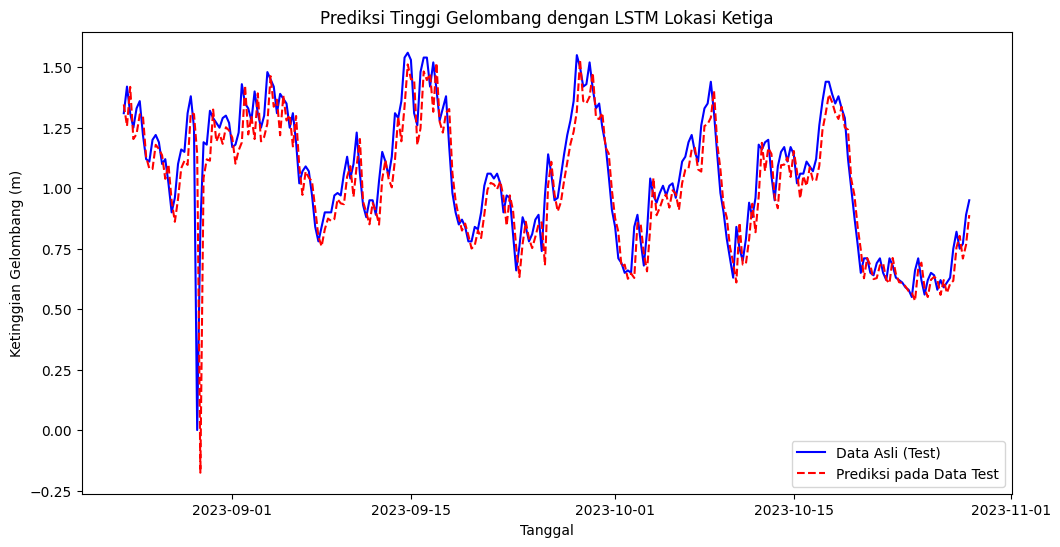

In [ ]:
# Plot prediksi VS nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df3.index[-len(y3_test):], y3_test_inv, label='Data Asli (Test)', color='blue')
plt.plot(df3.index[-len(y3_test):], y3_pred_inv, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.title('Prediksi Tinggi Gelombang dengan LSTM Lokasi Ketiga')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang (m)')
plt.legend()
plt.show()

9/9 [==============================] - 0s 6ms/step


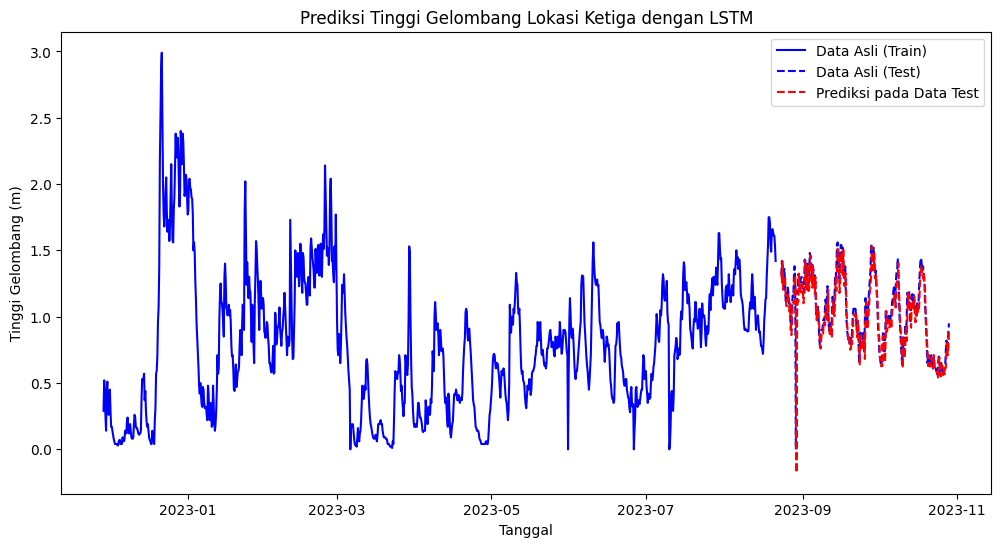

In [ ]:
# Plot tambahan
y3_test_pred = best_model.predict(X3_test)
y3_test_pred = scaler.inverse_transform(y3_test_pred)

train_index = df3.index[:len(y3_train)]
test_index = df3.index[-len(y3_test):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y3_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y3_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y3_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')

plt.title('Prediksi Tinggi Gelombang Lokasi Ketiga dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Gelombang (m)')
plt.legend()
plt.show()

**Prediksi 30 Hari Kedepan**

1/1 [==============================] - 0s 48ms/step


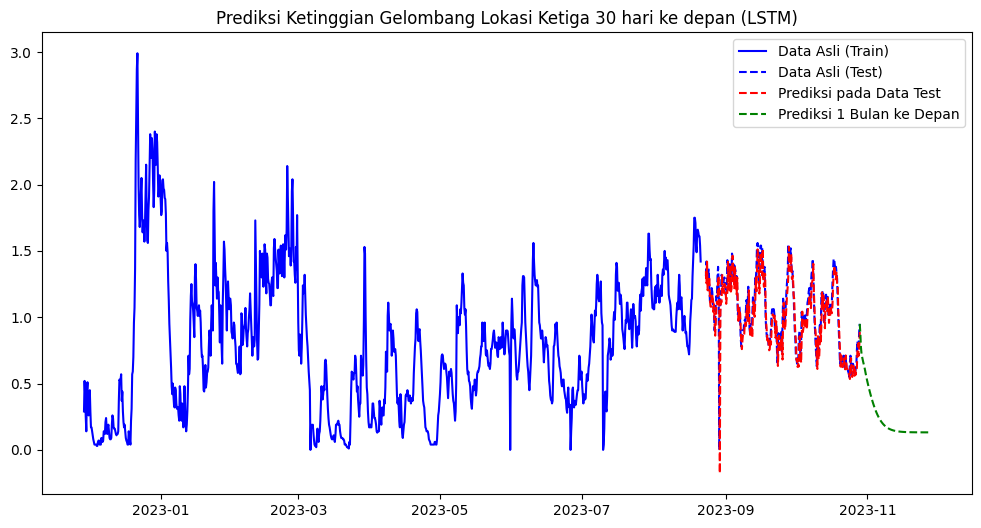

In [ ]:
HSW_Data = df3['HSW'].values.reshape((-1,1)).reshape((-1))
HSW_Data
# Prediksi 30 hari kedepan
def predict(num_prediction, model):
    prediction_list = HSW_Data[-8:]

    for _ in range(num_prediction):
        x = prediction_list[-8:]
        x = x.reshape((1, 8, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[8-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df3.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='6H')
    return prediction_dates

num_prediction = 120
forecast = predict(num_prediction, best_model)
forecast_dates = predict_dates(num_prediction)

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y3_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y3_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y3_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Ketiga 30 hari ke depan (LSTM)')
plt.legend()
plt.show()

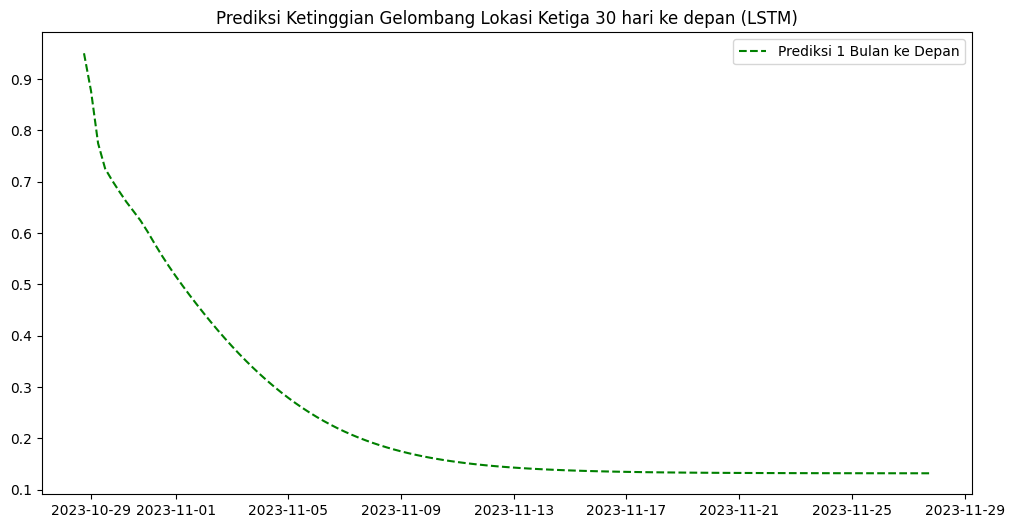

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Ketiga 30 hari ke depan (LSTM)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': forecast})

# Menampilkan DataFrame
future_df

Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-28 18:00:00                       0.950000
1   2023-10-29 00:00:00                       0.876376
2   2023-10-29 06:00:00                       0.774656
3   2023-10-29 12:00:00                       0.725401
4   2023-10-29 18:00:00                       0.702232
..                  ...                            ...
116 2023-11-26 18:00:00                       0.132175
117 2023-11-27 00:00:00                       0.132167
118 2023-11-27 06:00:00                       0.132159
119 2023-11-27 12:00:00                       0.132152
120 2023-11-27 18:00:00                       0.132146

[121 rows x 2 columns]

In [ ]:
df3['HSW_Norm']

time
2022-11-28 18:00:00+00:00    0.063545
2022-11-29 00:00:00+00:00    0.096990
2022-11-29 06:00:00+00:00    0.073579
2022-11-29 12:00:00+00:00    0.063545
2022-11-29 18:00:00+00:00    0.096990
                               ...   
2023-10-27 18:00:00+00:00    0.274247
2023-10-28 00:00:00+00:00    0.250836
2023-10-28 06:00:00+00:00    0.257525
2023-10-28 12:00:00+00:00    0.297659
2023-10-28 18:00:00+00:00    0.317726
Name: HSW_Norm, Length: 1337, dtype: float64

In [ ]:
HSW_Data

time
2022-11-28 18:00:00+00:00    0.19
2022-11-29 00:00:00+00:00    0.29
2022-11-29 06:00:00+00:00    0.22
2022-11-29 12:00:00+00:00    0.19
2022-11-29 18:00:00+00:00    0.29
                             ... 
2023-10-27 18:00:00+00:00    0.82
2023-10-28 00:00:00+00:00    0.75
2023-10-28 06:00:00+00:00    0.77
2023-10-28 12:00:00+00:00    0.89
2023-10-28 18:00:00+00:00    0.95
Name: HSW, Length: 1337, dtype: float64

In [ ]:
# Menemukan indeks baris dengan nilai ketinggian gelombang terendah
indeks_rendah = future_df['Prediksi Ketinggian Gelombang'].idxmin()
tanggal_terendah = future_df.loc[indeks_rendah, 'Tanggal']
nilai_terendah = future_df.loc[indeks_rendah, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Terendah:", tanggal_terendah)
print("Nilai Ketinggian Gelombang Terendah:", nilai_terendah)

# Menemukan indeks baris dengan nilai ketinggian gelombang tertinggi
indeks_tinggi = future_df['Prediksi Ketinggian Gelombang'].idxmax()
tanggal_tertinggi = future_df.loc[indeks_tinggi, 'Tanggal']
nilai_tertinggi = future_df.loc[indeks_tinggi, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Tertinggi:", tanggal_tertinggi)
print("Nilai Ketinggian Gelombang Tertinggi:", nilai_tertinggi)

Tanggal dengan Ketinggian Gelombang Terendah: 2023-11-27 18:00:00
Nilai Ketinggian Gelombang Terendah: 0.13214606046676636
Tanggal dengan Ketinggian Gelombang Tertinggi: 2023-10-28 18:00:00
Nilai Ketinggian Gelombang Tertinggi: 0.95


In [ ]:
# Pprediksi pada data pelatihan
y3_train_pred = best_model.predict(X3_train)
y3_train_pred_inv = scaler.inverse_transform(y3_train_pred)

# membuat dataframe dari data pelatihan
train_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y3_train.reshape(-1, 1)).flatten(), 'Predicted': y3_train_pred_inv.flatten()})
print("Training Set Predictions:")
print(train_predictions_df)

# Prediksi pada data pengujian
y3_test_pred = best_model.predict(X3_test)
y3_test_pred_inv = scaler.inverse_transform(y3_test_pred)

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y3_test.reshape(-1, 1).flatten(), 'Predicted': y3_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)

# membuat dataframe dari data pengujian
test_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y3_test.reshape(-1, 1)).flatten(), 'Predicted': y3_test_pred_inv.flatten()})
print("\nTest Set Predictions:")
print(test_predictions_df)

34/34 [==============================] - 0s 7ms/step
Training Set Predictions:
      Actual  Predicted
0       0.29   0.218609
1       0.52   0.312742
2       0.42   0.543831
3       0.25   0.392814
4       0.14   0.249489
...      ...        ...
1058    1.64   1.553436
1059    1.61   1.574696
1060    1.61   1.529897
1061    1.54   1.548230
1062    1.42   1.448167

[1063 rows x 2 columns]
9/9 [==============================] - 0s 6ms/step

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.438127   0.450227
1    0.474916   0.420315
2    0.438127   0.474503
3    0.418060   0.402417
4    0.444816   0.409297
..        ...        ...
261  0.274247   0.252546
262  0.250836   0.268460
263  0.257525   0.237128
264  0.297659   0.256216
265  0.317726   0.297248

[266 rows x 2 columns]

Test Set Predictions:
     Actual  Predicted
0      1.31   1.346179
1      1.42   1.256742
2      1.31   1.418763
3      1.25   1.203227
4      1.33   1.223798
..      ...        ...
261 

In [ ]:
#denormalisasi
y3_pred = best_model.predict(X3_test)
y3_pred_inv = scaler.inverse_transform(y3_pred)
y3_test_inv = scaler.inverse_transform(y3_test.reshape(-1, 1))

# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
mae = mean_absolute_error(y3_test, y3_pred)
mape = np.mean(np.abs((y33_test - y3_pred) / np.where(y33_test == 0, 1, y33_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

# Membuat DataFrame
df_results = pd.DataFrame({'Actual': y3_test_inv.flatten(), 'Predicted': y3_pred_inv.flatten()})

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y3_test.reshape(-1, 1).flatten(), 'Predicted': y3_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)
# Menyimpan DataFrame ke dalam file Excel
test_predictions_df_n.to_excel('hasil_prediksi_lstm3n.xlsx', index=False)

# Menampilkan DataFrame
print("\nDataFrame:")
print(test_predictions_df_n)

9/9 [==============================] - 0s 7ms/step

Evaluation Metrics:
RMSE: 0.0442
MAE: 0.0277
MAPE: 7.6850%

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.438127   0.450227
1    0.474916   0.420315
2    0.438127   0.474503
3    0.418060   0.402417
4    0.444816   0.409297
..        ...        ...
261  0.274247   0.252546
262  0.250836   0.268460
263  0.257525   0.237128
264  0.297659   0.256216
265  0.317726   0.297248

[266 rows x 2 columns]

DataFrame:
       Actual  Predicted
0    0.438127   0.450227
1    0.474916   0.420315
2    0.438127   0.474503
3    0.418060   0.402417
4    0.444816   0.409297
..        ...        ...
261  0.274247   0.252546
262  0.250836   0.268460
263  0.257525   0.237128
264  0.297659   0.256216
265  0.317726   0.297248

[266 rows x 2 columns]


## Koordinat Keempat

**Longitude :   112.27**


**Langitude :   -6.31**


In [ ]:
df4 = df[(df['latitude'] == -6.31) & (df['longitude'] == 112.27)]
df4

latitude  longitude   HSW
time                                          
2022-11-28 18:00:00     -6.31     112.27  0.14
2022-11-29 00:00:00     -6.31     112.27  0.34
2022-11-29 06:00:00     -6.31     112.27  0.28
2022-11-29 12:00:00     -6.31     112.27  0.17
2022-11-29 18:00:00     -6.31     112.27  0.32
...                       ...        ...   ...
2023-10-27 18:00:00     -6.31     112.27  0.82
2023-10-28 00:00:00     -6.31     112.27  0.72
2023-10-28 06:00:00     -6.31     112.27  0.82
2023-10-28 12:00:00     -6.31     112.27  0.94
2023-10-28 18:00:00     -6.31     112.27  0.93

[1337 rows x 3 columns]

In [ ]:
df4.tail(266)

latitude  longitude   HSW
time                                          
2023-08-23 12:00:00     -6.31     112.27  1.32
2023-08-23 18:00:00     -6.31     112.27  1.43
2023-08-24 00:00:00     -6.31     112.27  1.30
2023-08-24 06:00:00     -6.31     112.27  1.27
2023-08-24 12:00:00     -6.31     112.27  1.39
...                       ...        ...   ...
2023-10-27 18:00:00     -6.31     112.27  0.82
2023-10-28 00:00:00     -6.31     112.27  0.72
2023-10-28 06:00:00     -6.31     112.27  0.82
2023-10-28 12:00:00     -6.31     112.27  0.94
2023-10-28 18:00:00     -6.31     112.27  0.93

[266 rows x 3 columns]

In [ ]:
df4.describe()

latitude  longitude          HSW
count  1.337000e+03    1337.00  1337.000000
mean  -6.310000e+00     112.27     0.859798
std    8.885108e-16       0.00     0.497795
min   -6.310000e+00     112.27     0.000000
25%   -6.310000e+00     112.27     0.480000
50%   -6.310000e+00     112.27     0.870000
75%   -6.310000e+00     112.27     1.200000
max   -6.310000e+00     112.27     3.060000

In [ ]:
df4['HSW_Norm']

time
2022-11-28 18:00:00    0.045752
2022-11-29 00:00:00    0.111111
2022-11-29 06:00:00    0.091503
2022-11-29 12:00:00    0.055556
2022-11-29 18:00:00    0.104575
                         ...   
2023-10-27 18:00:00    0.267974
2023-10-28 00:00:00    0.235294
2023-10-28 06:00:00    0.267974
2023-10-28 12:00:00    0.307190
2023-10-28 18:00:00    0.303922
Name: HSW_Norm, Length: 1337, dtype: float64

In [ ]:
from tensorflow.keras.optimizers import Adam
# Normalisasi data
scaler = MinMaxScaler()
df4['HSW_Norm'] = scaler.fit_transform(df4[['HSW']])
df4['HSW_Norm']

rmse_eval = []
# Membuat sekuens data
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i+sequence_length]['HSW_Norm'].values)
        target.append(data.iloc[i+sequence_length]['HSW_Norm'])
    return np.array(sequences), np.array(target)

sequence_length = 8  # Sesuaikan dengan kebutuhan
X4, y4 = create_sequences(df4, sequence_length)

# Membagi data menjadi set pelatihan dan pengujian
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, shuffle=False)

# Reshape untuk input model LSTM
X4_train = np.reshape(X4_train, (X4_train.shape[0], X4_train.shape[1], 1))
X4_test = np.reshape(X4_test, (X4_test.shape[0], X4_test.shape[1], 1))


<ipython-input-20-1ab4b6be952e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['HSW_Norm'] = scaler.fit_transform(df4[['HSW']])


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
from keras import optimizers

# Keras model
def create_model(optimizer='adam', lstm_neurons=50, activation='tanh', learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(lstm_neurons, activation=activation, return_sequences=True, input_shape=(X4_train.shape[1], 1)))
    model.add(LSTM(lstm_neurons, return_sequences=True))
    model.add(LSTM(lstm_neurons))
    model.add(Dense(1))


    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Keras model
model = KerasRegressor(model=create_model, epochs=25, batch_size=1, verbose=2)

# Hyperparameter
param_grid = {
    'model__optimizer': ['adam'],
    'model__lstm_neurons': [30,50],
    'model__activation': ['tanh'],
    'model__learning_rate': [0.001, 0.01, 0.1],  # Add learning_rate to the param_grid
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# GridSearchCV

# GridSearchCV dg early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)


grid_result = grid.fit(X4_train, y4_train, callbacks=[early_stopping], validation_split=0.2)

# hyperparameter terbaik
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Extrak GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)


Output streaming akan dipotong hingga 5000 baris terakhir.
11/11 - 0s - loss: 0.0082 - val_loss: 0.0063 - 89ms/epoch - 8ms/step
Epoch 14/100
11/11 - 0s - loss: 0.0079 - val_loss: 0.0060 - 89ms/epoch - 8ms/step
Epoch 15/100
11/11 - 0s - loss: 0.0075 - val_loss: 0.0056 - 88ms/epoch - 8ms/step
Epoch 16/100
11/11 - 0s - loss: 0.0085 - val_loss: 0.0056 - 88ms/epoch - 8ms/step
Epoch 17/100
11/11 - 0s - loss: 0.0069 - val_loss: 0.0055 - 92ms/epoch - 8ms/step
Epoch 18/100
11/11 - 0s - loss: 0.0063 - val_loss: 0.0055 - 90ms/epoch - 8ms/step
Epoch 19/100
11/11 - 0s - loss: 0.0061 - val_loss: 0.0045 - 90ms/epoch - 8ms/step
Epoch 20/100
11/11 - 0s - loss: 0.0057 - val_loss: 0.0044 - 89ms/epoch - 8ms/step
Epoch 21/100
11/11 - 0s - loss: 0.0054 - val_loss: 0.0044 - 91ms/epoch - 8ms/step
Epoch 22/100
11/11 - 0s - loss: 0.0054 - val_loss: 0.0055 - 88ms/epoch - 8ms/step
Epoch 23/100
11/11 - 0s - loss: 0.0051 - val_loss: 0.0047 - 92ms/epoch - 8ms/step
Epoch 24/100
11/11 - 0s - loss: 0.0050 - val_loss: 0

**Menyimpan Hasil Tuning**

In [ ]:
import pandas as pd

# Extract hasil dr GridSearchCV
results = pd.DataFrame(grid_result.cv_results_)

# Function menghitung  RMSE
def calculate_rmse(y4_true, y4_pred):
    return np.sqrt(mean_squared_error(y4_true, y4_pred))

# menambah dalam dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# menampilkan hasil
results_with_rmse = results[['param_model__optimizer', 'param_model__lstm_neurons', 'param_model__activation', 'param_model__learning_rate', 'param_batch_size', 'param_epochs', 'mean_test_score', 'rmse']]

# Buat dataframe
print(results_with_rmse)

# menyimpan dataframe dalam csv
results_with_rmse.to_csv('grid_search_LSTM_Lokasi4.csv', index=False)

   param_model__optimizer param_model__lstm_neurons param_model__activation  \
0                    adam                        30                    tanh   
1                    adam                        50                    tanh   
2                    adam                        30                    tanh   
3                    adam                        50                    tanh   
4                    adam                        30                    tanh   
5                    adam                        50                    tanh   
6                    adam                        30                    tanh   
7                    adam                        50                    tanh   
8                    adam                        30                    tanh   
9                    adam                        50                    tanh   
10                   adam                        30                    tanh   
11                   adam                        50 

**Pemodelan**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# hyperparameters terbaik
best_params = {'batch_size': 32, 'epochs': 100, 'model__activation': 'tanh', 'model__learning_rate': 0.001, 'model__lstm_neurons': 30, 'model__optimizer': 'adam'}

# Model
best_model = Sequential()
best_model.add(LSTM(units=best_params['model__lstm_neurons'],
                   activation=best_params['model__activation'],
                   return_sequences=True,
                   input_shape=(X4_train.shape[1], 1)))
best_model.add(LSTM(units=best_params['model__lstm_neurons'], return_sequences=True))
best_model.add(LSTM(units=best_params['model__lstm_neurons']))
best_model.add(Dense(units=1))

optimizer = Adam(learning_rate=best_params['model__learning_rate'])

best_model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)  # Adjust patience as needed

# Training model terbaik
best_model.fit(X4_train, y4_train, epochs=best_params['epochs'], callbacks=[early_stopping], batch_size=best_params['batch_size'], verbose=2)


#denormalisasi
y4_pred = best_model.predict(X4_test)
y4_pred_inv = scaler.inverse_transform(y4_pred)
y4_test_inv = scaler.inverse_transform(y4_test.reshape(-1, 1))
y44_test = y4_test.reshape(-1, 1)  #######
# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y4_test, y4_pred))
mae = mean_absolute_error(y4_test, y4_pred)
mape = np.mean(np.abs((y44_test - y4_pred) / np.where(y44_test == 0, 1, y44_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

Epoch 1/100
34/34 - 8s - loss: 0.0323 - 8s/epoch - 225ms/step
Epoch 2/100
34/34 - 0s - loss: 0.0111 - 325ms/epoch - 10ms/step
Epoch 3/100
34/34 - 0s - loss: 0.0094 - 321ms/epoch - 9ms/step
Epoch 4/100
34/34 - 0s - loss: 0.0092 - 323ms/epoch - 10ms/step
Epoch 5/100
34/34 - 0s - loss: 0.0090 - 332ms/epoch - 10ms/step
Epoch 6/100
34/34 - 1s - loss: 0.0087 - 638ms/epoch - 19ms/step
Epoch 7/100
34/34 - 0s - loss: 0.0086 - 367ms/epoch - 11ms/step
Epoch 8/100
34/34 - 0s - loss: 0.0081 - 336ms/epoch - 10ms/step
Epoch 9/100
34/34 - 0s - loss: 0.0079 - 319ms/epoch - 9ms/step
Epoch 10/100
34/34 - 0s - loss: 0.0071 - 331ms/epoch - 10ms/step
Epoch 11/100
34/34 - 0s - loss: 0.0063 - 314ms/epoch - 9ms/step
Epoch 12/100
34/34 - 0s - loss: 0.0058 - 341ms/epoch - 10ms/step
Epoch 13/100
34/34 - 0s - loss: 0.0055 - 339ms/epoch - 10ms/step
Epoch 14/100
34/34 - 0s - loss: 0.0053 - 324ms/epoch - 10ms/step
Epoch 15/100
34/34 - 0s - loss: 0.0049 - 340ms/epoch - 10ms/step
Epoch 16/100
34/34 - 0s - loss: 0.0052 

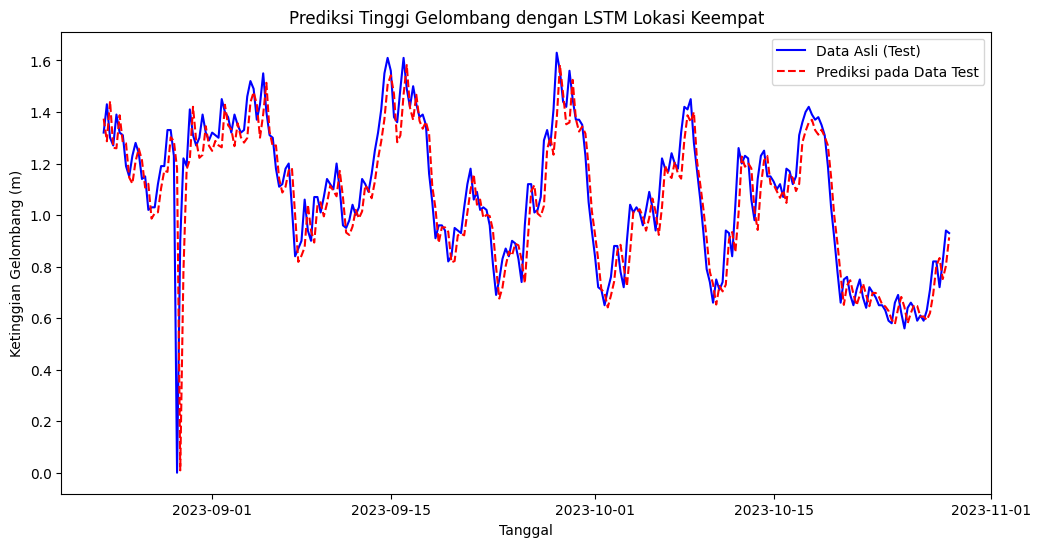

In [ ]:
# Plot prediksi VS nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df4.index[-len(y4_test):], y4_test_inv, label='Data Asli (Test)', color='blue')
plt.plot(df4.index[-len(y4_test):], y4_pred_inv, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.title('Prediksi Tinggi Gelombang dengan LSTM Lokasi Keempat')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang (m)')
plt.legend()
plt.show()

9/9 [==============================] - 0s 6ms/step


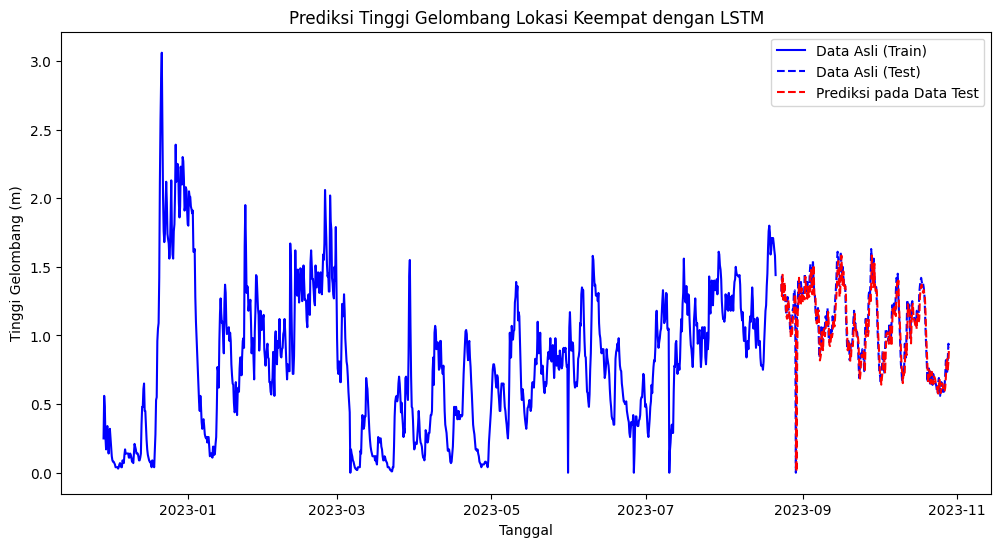

In [ ]:
# Plot tambahan
y4_test_pred = best_model.predict(X4_test)
y4_test_pred = scaler.inverse_transform(y4_test_pred)

train_index = df4.index[:len(y4_train)]
test_index = df4.index[-len(y4_test):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y4_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y4_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y4_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')

plt.title('Prediksi Tinggi Gelombang Lokasi Keempat dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Tinggi Gelombang (m)')
plt.legend()
plt.show()

**Prediksi 30 Hari Kedepan**

1/1 [==============================] - 0s 19ms/step


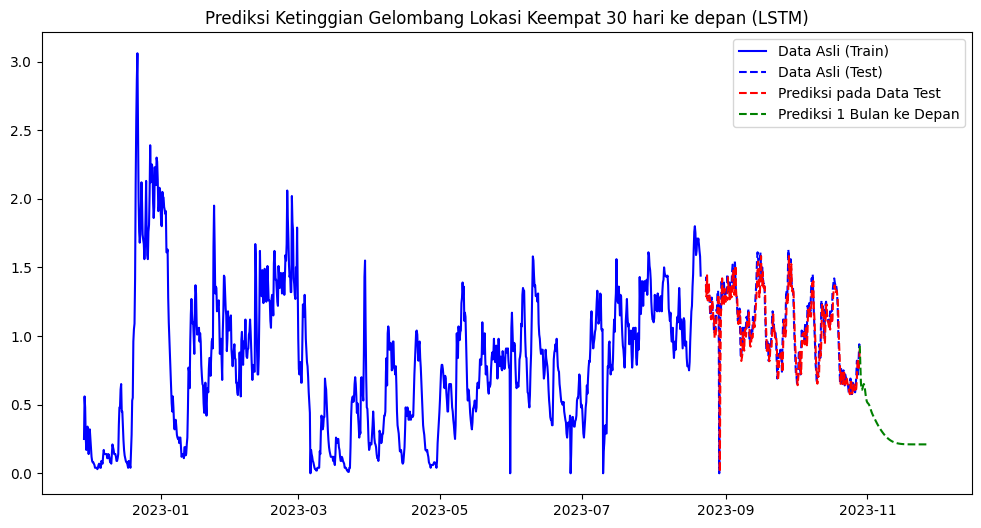

In [ ]:
HSW_Data = df4['HSW'].values.reshape((-1,1)).reshape((-1))
HSW_Data
# Prediksi 30 hari kedepan
def predict(num_prediction, model):
    prediction_list = HSW_Data[-8:]

    for _ in range(num_prediction):
        x = prediction_list[-8:]
        x = x.reshape((1, 8, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[8-1:]

    return prediction_list

def predict_dates(num_prediction):
    last_date = df4.index[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='6H')
    return prediction_dates

num_prediction = 120
forecast = predict(num_prediction, best_model)
forecast_dates = predict_dates(num_prediction)

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y4_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y4_test.reshape(1, -1))[0], label='Data Asli (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y4_test_pred, label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Keempat 30 hari ke depan (LSTM)')
plt.legend()
plt.show()

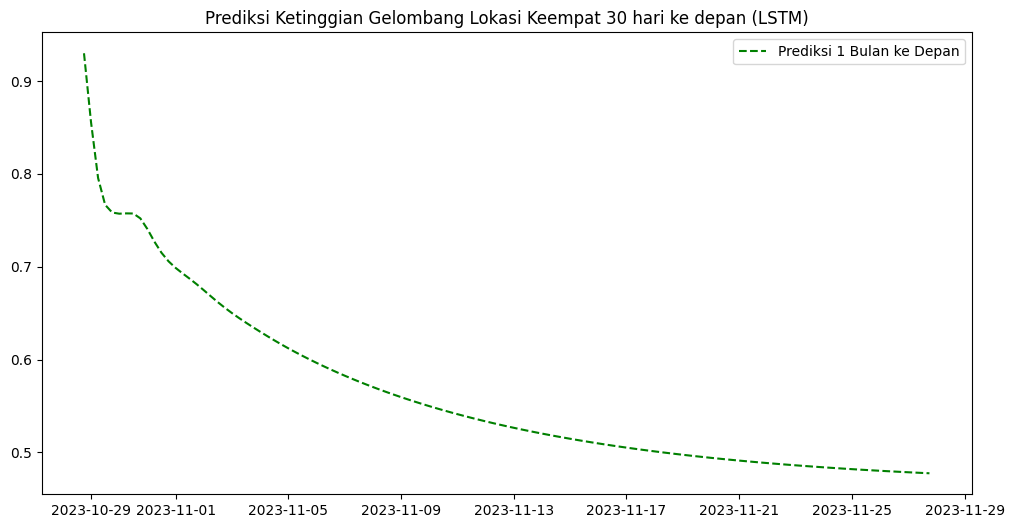

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast, label='Prediksi 1 Bulan ke Depan', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Keempat 30 hari ke depan (LSTM)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': forecast})

# Menampilkan DataFrame
future_df

Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-28 18:00:00                       0.930000
1   2023-10-29 00:00:00                       0.855605
2   2023-10-29 06:00:00                       0.795608
3   2023-10-29 12:00:00                       0.766700
4   2023-10-29 18:00:00                       0.758395
..                  ...                            ...
116 2023-11-26 18:00:00                       0.478884
117 2023-11-27 00:00:00                       0.478501
118 2023-11-27 06:00:00                       0.478128
119 2023-11-27 12:00:00                       0.477765
120 2023-11-27 18:00:00                       0.477410

[121 rows x 2 columns]

In [ ]:
# Menemukan indeks baris dengan nilai ketinggian gelombang terendah
indeks_rendah = future_df['Prediksi Ketinggian Gelombang'].idxmin()
tanggal_terendah = future_df.loc[indeks_rendah, 'Tanggal']
nilai_terendah = future_df.loc[indeks_rendah, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Terendah:", tanggal_terendah)
print("Nilai Ketinggian Gelombang Terendah:", nilai_terendah)

# Menemukan indeks baris dengan nilai ketinggian gelombang tertinggi
indeks_tinggi = future_df['Prediksi Ketinggian Gelombang'].idxmax()
tanggal_tertinggi = future_df.loc[indeks_tinggi, 'Tanggal']
nilai_tertinggi = future_df.loc[indeks_tinggi, 'Prediksi Ketinggian Gelombang']
print("Tanggal dengan Ketinggian Gelombang Tertinggi:", tanggal_tertinggi)
print("Nilai Ketinggian Gelombang Tertinggi:", nilai_tertinggi)

Tanggal dengan Ketinggian Gelombang Terendah: 2023-11-27 18:00:00
Nilai Ketinggian Gelombang Terendah: 0.4774101972579956
Tanggal dengan Ketinggian Gelombang Tertinggi: 2023-10-28 18:00:00
Nilai Ketinggian Gelombang Tertinggi: 0.93


In [ ]:
# Pprediksi pada data pelatihan
y4_train_pred = best_model.predict(X4_train)
y4_train_pred_inv = scaler.inverse_transform(y4_train_pred)

# membuat dataframe dari data pelatihan
train_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y4_train.reshape(-1, 1)).flatten(), 'Predicted': y4_train_pred_inv.flatten()})
print("Training Set Predictions:")
print(train_predictions_df)

# Prediksi pada data pengujian
y4_test_pred = best_model.predict(X4_test)
y4_test_pred_inv = scaler.inverse_transform(y4_test_pred)

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y4_test.reshape(-1, 1).flatten(), 'Predicted': y4_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)


# membuat dataframe dari data pengujian
test_predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y4_test.reshape(-1, 1)).flatten(), 'Predicted': y4_test_pred_inv.flatten()})
print("\nTest Set Predictions:")
print(test_predictions_df)

34/34 [==============================] - 0s 7ms/step
Training Set Predictions:
      Actual  Predicted
0       0.25   0.335513
1       0.56   0.287023
2       0.48   0.526549
3       0.26   0.522566
4       0.17   0.340807
...      ...        ...
1058    1.71   1.651641
1059    1.67   1.729000
1060    1.62   1.634401
1061    1.58   1.612064
1062    1.44   1.569824

[1063 rows x 2 columns]
9/9 [==============================] - 0s 6ms/step

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.431373   0.460485
1    0.467320   0.435221
2    0.424837   0.487450
3    0.415033   0.410740
4    0.454248   0.429811
..        ...        ...
261  0.267974   0.274809
262  0.235294   0.276728
263  0.267974   0.244527
264  0.307190   0.275541
265  0.303922   0.311642

[266 rows x 2 columns]

Test Set Predictions:
     Actual  Predicted
0      1.32   1.409084
1      1.43   1.331778
2      1.30   1.491596
3      1.27   1.256863
4      1.39   1.315223
..      ...        ...
261 

In [ ]:
#denormalisasi
y4_pred = best_model.predict(X4_test)
y4_pred_inv = scaler.inverse_transform(y4_pred)
y4_test_inv = scaler.inverse_transform(y4_test.reshape(-1, 1))

# Display the predictions
# predictions_df = pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv})
# print("Predictions:")
# print(predictions_df)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y4_test, y4_pred))
mae = mean_absolute_error(y4_test, y4_pred)
mape = np.mean(np.abs((y44_test- y4_pred) / np.where(y44_test == 0, 1, y44_test))) * 100



# Menampilkan evaluasi model
print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

# membuat dataframe dari data pengujian
test_predictions_df_n = pd.DataFrame({'Actual': y4_test.reshape(-1, 1).flatten(), 'Predicted': y4_test_pred.flatten()})
print("\nTest Set Predictions sebelum denormalisasi:")
print(test_predictions_df_n)

# Menyimpan DataFrame ke dalam file Excel
test_predictions_df_n.to_excel('hasil_prediksi_lstm4.xlsx', index=False)

# Menampilkan DataFrame
print("\nDataFrame:")
print(test_predictions_df_n)

9/9 [==============================] - 0s 5ms/step

Evaluation Metrics:
RMSE: 0.0420
MAE: 0.0254
MAPE: 7.3086%

Test Set Predictions sebelum denormalisasi:
       Actual  Predicted
0    0.431373   0.460485
1    0.467320   0.435221
2    0.424837   0.487450
3    0.415033   0.410740
4    0.454248   0.429811
..        ...        ...
261  0.267974   0.274809
262  0.235294   0.276728
263  0.267974   0.244527
264  0.307190   0.275541
265  0.303922   0.311642

[266 rows x 2 columns]

DataFrame:
       Actual  Predicted
0    0.431373   0.460485
1    0.467320   0.435221
2    0.424837   0.487450
3    0.415033   0.410740
4    0.454248   0.429811
..        ...        ...
261  0.267974   0.274809
262  0.235294   0.276728
263  0.267974   0.244527
264  0.307190   0.275541
265  0.303922   0.311642

[266 rows x 2 columns]


# XGBOOST PER TITIK KOORDINAT

## Koordinat Pertama

**Reshape Train Test**

In [ ]:
X1_train_flat = X1_train.reshape((X1_train.shape[0], -1))
X1_test_flat = X1_test.reshape((X1_test.shape[0], -1))
y1_train_flat = y1_train.reshape((y1_train.shape[0], -1))
y1_test_flat = y1_test.reshape((y1_test.shape[0], -1))

**Penentuan Hyperparameter**

In [ ]:
# Inisialisasi model XGBoost Regressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor(objective='reg:squarederror')

# parameter yang akan diuji

param_grid = {
    'colsample_bytree': [0.5, 0.7, 1],
    'learning_rate': [0.05, 0.15, 0.3],
    'max_depth': [3,5,6],
    'n_estimators': [50, 100, 150],
    'reg_lambda': [0, 0.1, 0.5, 1], # Menambahkan parameter reg_lambda untuk regularisasi L2
    'subsample' : [0.6, 1]
}

# param_grid = {
#     'colsample_bytree': [0.3, 0.5, 0.7],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 150],
#     'reg_lambda': [0, 0.1, 0.5, 1], # Menambahkan parameter reg_lambda untuk regularisasi L2
#     'subsample' : [0.5, 1]
# }
# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan grid search pada data training
grid_search.fit(X1_train_flat, y1_train_flat)

# Extrak hasil GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
# Menghitung RMSE
def calculate_rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

# Menghitung dan menambahkan hasil RMSE di dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # negatif krna neg_mean_squared_error

# Menampilkan hasil parameter dan RMSE
print(results[['param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_reg_lambda', 'param_subsample','mean_test_score', 'rmse']])

# Menyimpan hasil pencarian grid ke dalam file CSV
results.to_csv('grid_search_xgboost_Lokasi1.csv', index=False)

    param_colsample_bytree param_learning_rate param_max_depth  \
0                      0.5                0.05               3   
1                      0.5                0.05               3   
2                      0.5                0.05               3   
3                      0.5                0.05               3   
4                      0.5                0.05               3   
..                     ...                 ...             ...   
643                      1                 0.3               6   
644                      1                 0.3               6   
645                      1                 0.3               6   
646                      1                 0.3               6   
647                      1                 0.3               6   

    param_n_estimators param_reg_lambda param_subsample  mean_test_score  \
0                   50                0             0.6        -0.005420   
1                   50                0               1

**Pemodelan**

In [ ]:
# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
# Menampilkan nilai terbaik
print("Mean Test Score:", grid_search.best_score_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Prediksi untuk data testing
y1_pred_flat = best_model.predict(X1_test_flat)


#Nilai sebelum denormalisasi
y1_pred_norm = y1_pred_flat.reshape(-1, 1)
y1_test_norm = y1_test_flat.reshape(-1, 1)

# Menampilkan prediksi sblm denormalisasi
predictions_df_norm = pd.DataFrame({'Actual': y1_test_norm.flatten(), 'Predicted': y1_pred_norm.flatten()})
print("Prediksi:")
print(predictions_df_norm)
# Menyimpan DataFrame ke dalam file Excel
predictions_df_norm.to_excel('hasil_prediksi_xgboost1.xlsx', index=False)

# Inverse transform prediksi dan nilai aktual
y1_pred_xgb = scaler.inverse_transform(y1_pred_norm.reshape(-1, 1))
y1_test_xgb = scaler.inverse_transform(y1_test_norm.reshape(-1, 1))

# Menampilkan prediksi
predictions_df = pd.DataFrame({'Actual': y1_test_xgb.flatten(), 'Predicted': y1_pred_xgb.flatten()})
print("Prediksi:")
print(predictions_df)



# Evaluasi model
rmse = np.sqrt(mean_squared_error(y1_test_norm, y1_pred_norm))
mae = mean_absolute_error(y1_test_norm, y1_pred_norm)
mape = np.mean(np.abs((y1_test_norm - y1_pred_norm) / np.where(y1_test_norm == 0, 1, y1_test_norm))) * 100

# Menampilkan metrik evaluasi
print("\nMetrik Evaluasi:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150, 'reg_lambda': 0.1, 'subsample': 0.6}
Mean Test Score: -0.00406575347174883
Prediksi:
       Actual  Predicted
0    0.434307   0.458535
1    0.456204   0.493258
2    0.419708   0.397222
3    0.350365   0.411591
4    0.463504   0.431918
..        ...        ...
261  0.284672   0.261702
262  0.237226   0.258482
263  0.237226   0.255454
264  0.317518   0.285246
265  0.317518   0.306635

[266 rows x 2 columns]
Prediksi:
     Actual  Predicted
0      1.19   1.256385
1      1.25   1.351527
2      1.15   1.088387
3      0.96   1.127760
4      1.27   1.183455
..      ...        ...
261    0.78   0.717063
262    0.65   0.708239
263    0.65   0.699945
264    0.87   0.781573
265    0.87   0.840181

[266 rows x 2 columns]

Metrik Evaluasi:
RMSE: 0.0460
MAE: 0.0320
MAPE: 9.1268%


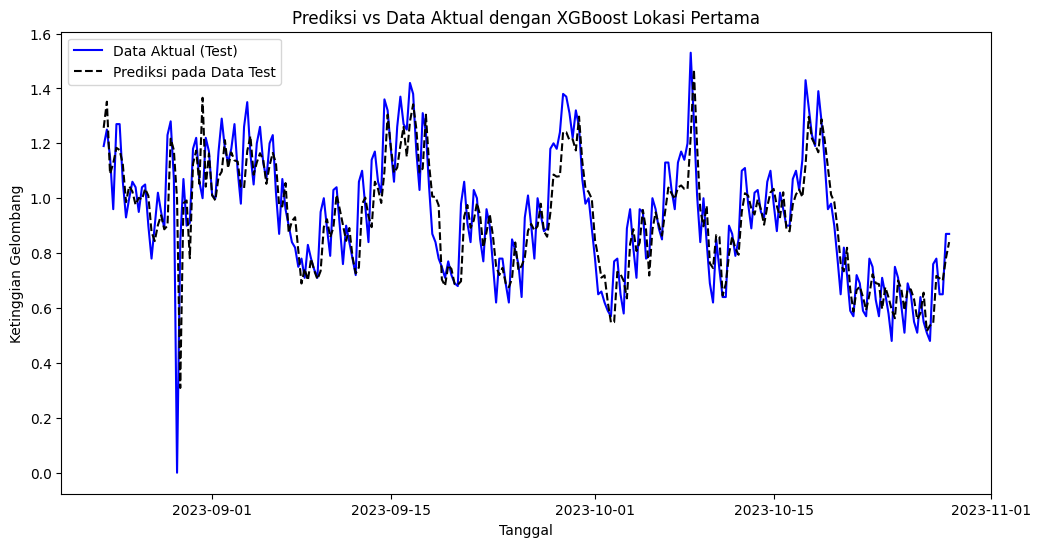

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df1.index[-len(y1_test_flat):], y1_test_xgb, label='Data Aktual (Test)', color='blue')
plt.plot(df1.index[-len(y1_test_flat):], y1_pred_xgb, label='Prediksi pada Data Test', linestyle='dashed', color='black')

plt.title('Prediksi vs Data Aktual dengan XGBoost Lokasi Pertama')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

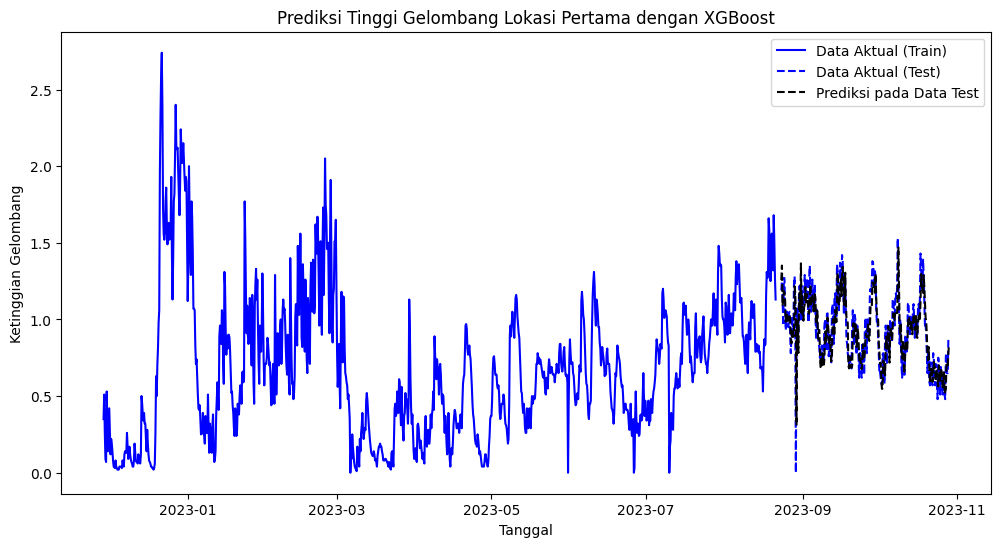

In [ ]:
# Plot tambahan seperti contoh yang diberikan sebelumnya
y1_test_pred_flat = best_model.predict(X1_test_flat)
y1_test_pred_inv = scaler.inverse_transform(y1_test_pred_flat.reshape(-1, 1))

train_index = df1.index[:len(y1_train_flat)]
test_index = df1.index[-len(y1_test_flat):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y1_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y1_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(df1.index[-len(y1_test_flat):], y1_pred_xgb, label='Prediksi pada Data Test', linestyle='dashed', color='black')

plt.title('Prediksi Tinggi Gelombang Lokasi Pertama dengan XGBoost')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

**Prediksi 30 Hari Kedepan**

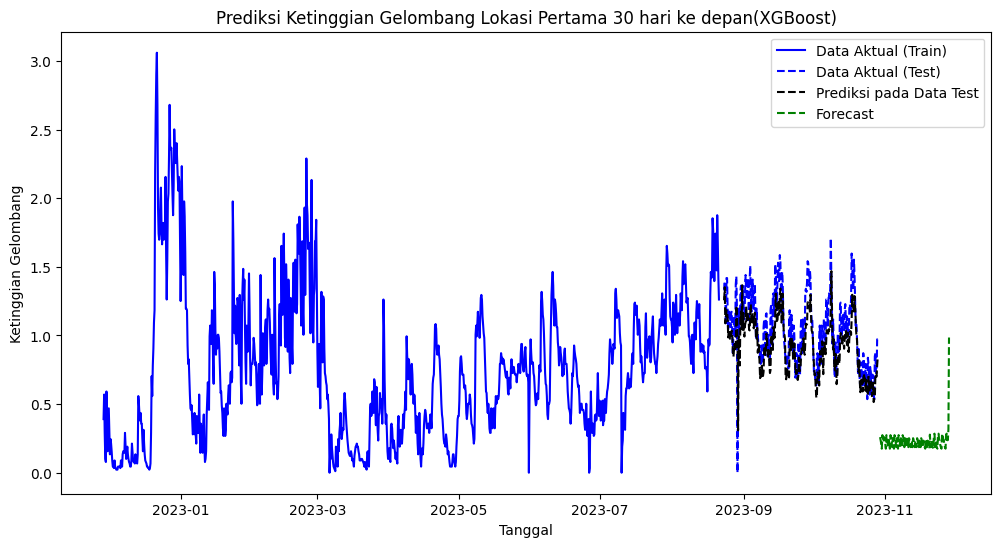

In [ ]:
# Prediksi 30 hari kedepan
X_test_flat_30 = []
num_prediction = 120
for _ in range(num_prediction):
    next_prediction = best_model.predict(X1_test_flat[-1:])
    next_prediction_inv = scaler.inverse_transform(next_prediction.reshape(-1,1))
    X_test_flat_30 = np.append(X1_test_flat, next_prediction_inv)


forecast_dates = pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=num_prediction, freq='6H')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y1_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y1_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y1_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')

plt.title('Prediksi Ketinggian Gelombang Lokasi Pertama 30 hari ke depan(XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


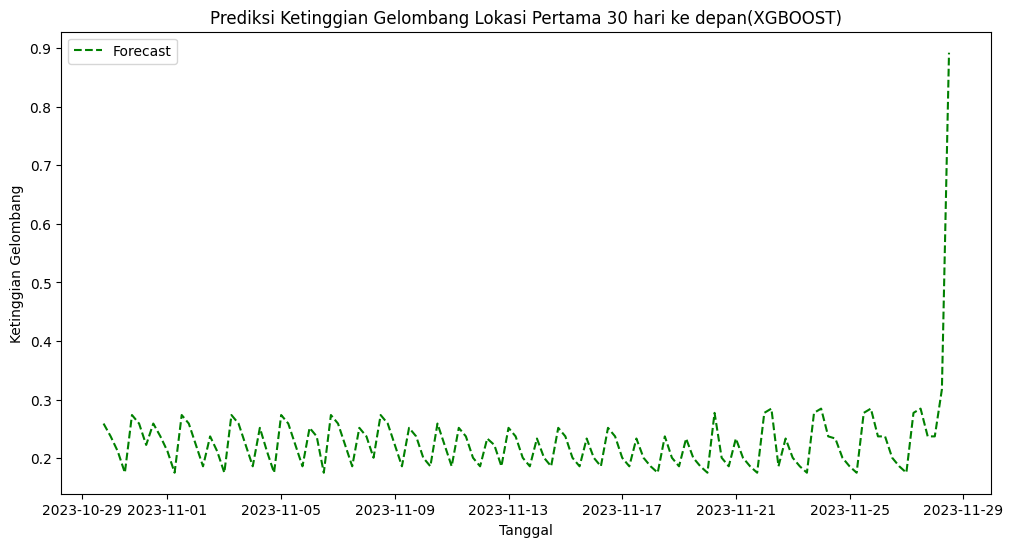

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Pertama 30 hari ke depan(XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future (asumsi variabel-variabel ini sudah ada sebelumnya)
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': X_test_flat_30[-num_prediction:]})
future_df

# Menampilkan tanggal berserta nilai ketinggian gelombang terendah dan tertinggi
min_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmin()]
max_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmax()]

print("Tanggal dan Nilai Ketinggian Gelombang Terendah:")
print(min_height_row['Tanggal'], min_height_row['Prediksi Ketinggian Gelombang'])

print("\nTanggal dan Nilai Ketinggian Gelombang Tertinggi:")
print(max_height_row['Tanggal'], max_height_row['Prediksi Ketinggian Gelombang'])
future_df

Tanggal dan Nilai Ketinggian Gelombang Terendah:
2023-10-30 12:00:00 0.1751824817518248

Tanggal dan Nilai Ketinggian Gelombang Tertinggi:
2023-11-28 12:00:00 0.8401811122894287


Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-29 18:00:00                       0.259124
1   2023-10-30 00:00:00                       0.237226
2   2023-10-30 06:00:00                       0.211679
3   2023-10-30 12:00:00                       0.175182
4   2023-10-30 18:00:00                       0.273723
..                  ...                            ...
115 2023-11-27 12:00:00                       0.284672
116 2023-11-27 18:00:00                       0.237226
117 2023-11-28 00:00:00                       0.237226
118 2023-11-28 06:00:00                       0.317518
119 2023-11-28 12:00:00                       0.840181

[120 rows x 2 columns]

## Koordinat Kedua

In [ ]:
X2_train_flat = X2_train.reshape((X2_train.shape[0], -1))
X2_test_flat = X2_test.reshape((X2_test.shape[0], -1))
y2_train_flat = y2_train.reshape((y2_train.shape[0], -1))
y2_test_flat = y2_test.reshape((y2_test.shape[0], -1))

**Penentuan Hyperparameter Tuning**

In [ ]:
# Inisialisasi model XGBoost Regressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {
    'colsample_bytree': [0.5, 0.7, 1],
    'learning_rate': [0.05, 0.15, 0.3],
    'max_depth': [3,5,6],
    'n_estimators': [50, 100, 150],
    'reg_lambda': [0, 0.1, 0.5, 1], # Menambahkan parameter reg_lambda untuk regularisasi L2
    'subsample' : [0.6, 1]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan grid search pada data training
grid_search.fit(X2_train_flat, y2_train_flat)

# Extrak hasil GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
# Menghitung RMSE
def calculate_rmse(y2_true, y2_pred):
  return np.sqrt(mean_squared_error(y2_true, y2_pred))

# Menghitung dan menambahkan hasil RMSE di dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# Menampilkan hasil parameter dan RMSE
print(results[['param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_reg_lambda', 'param_subsample','mean_test_score', 'rmse']])

# Menyimpan hasil pencarian grid ke dalam file CSV
results.to_csv('grid_search_xgboost_Lokasi2.csv', index=False)

    param_colsample_bytree param_learning_rate param_max_depth  \
0                      0.5                0.05               3   
1                      0.5                0.05               3   
2                      0.5                0.05               3   
3                      0.5                0.05               3   
4                      0.5                0.05               3   
..                     ...                 ...             ...   
643                      1                 0.3               6   
644                      1                 0.3               6   
645                      1                 0.3               6   
646                      1                 0.3               6   
647                      1                 0.3               6   

    param_n_estimators param_reg_lambda param_subsample  mean_test_score  \
0                   50                0             0.6        -0.005230   
1                   50                0               1

**Pemodelan**

In [ ]:
# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
# menampilkan nilai terbaik
print("Mean Test Score:", grid_search.best_score_)


# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_
# Prediksi untuk data testing
y2_pred_flat = best_model.predict(X2_test_flat)

#Nilai sebelum denormalisasi
y2_pred_norm = y2_pred_flat.reshape(-1, 1)
y2_test_norm = y2_test_flat.reshape(-1, 1)

# Menampilkan prediksi sblm denormalisasi
predictions_df_norm = pd.DataFrame({'Actual': y2_test_norm.flatten(), 'Predicted': y2_pred_norm.flatten()})
print("Prediksi:")
print(predictions_df_norm)
# Menyimpan DataFrame ke dalam file Excel
predictions_df_norm.to_excel('hasil_prediksi_xgboost2.xlsx', index=False)

# Prediksi untuk data testing
y2_pred_flat = best_model.predict(X2_test_flat)
rmse = np.sqrt(mean_squared_error(y2_test_flat, y2_pred_flat))

# Inverse transform prediksi dan nilai aktual
y2_pred_xgb= scaler.inverse_transform(y2_pred_flat.reshape(-1, 1))  ###########
y2_test_inv = scaler.inverse_transform(y2_test_flat.reshape(-1, 1))

# Menampilkan prediksi
predictions_df = pd.DataFrame({'Actual': y2_test_inv.flatten(), 'Predicted': y2_pred_xgb.flatten()})
print("Prediksi:")
print(predictions_df)



# Evaluasi model
rmse = np.sqrt(mean_squared_error(y2_test_norm, y2_pred_norm))
mae = mean_absolute_error(y2_test_norm, y2_pred_norm)
mape = np.mean(np.abs((y2_test_norm - y2_pred_norm) / np.where(y2_test_norm == 0, 1, y2_test_norm))) * 100

# Menampilkan metrik evaluasi
print("\nMetrik Evaluasi:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 0.5, 'subsample': 0.6}
Mean Test Score: -0.003748198765767459
Prediksi:
       Actual  Predicted
0    0.408935   0.486760
1    0.450172   0.423672
2    0.395189   0.455264
3    0.329897   0.432295
4    0.481100   0.373825
..        ...        ...
261  0.254296   0.266009
262  0.213058   0.236803
263  0.271478   0.240165
264  0.329897   0.300156
265  0.298969   0.305983

[266 rows x 2 columns]
Prediksi:
     Actual  Predicted
0      1.19   1.416472
1      1.31   1.232887
2      1.15   1.324818
3      0.96   1.257978
4      1.40   1.087832
..      ...        ...
261    0.74   0.774087
262    0.62   0.689097
263    0.79   0.698879
264    0.96   0.873454
265    0.87   0.890411

[266 rows x 2 columns]

Metrik Evaluasi:
RMSE: 0.0503
MAE: 0.0368
MAPE: 10.9415%


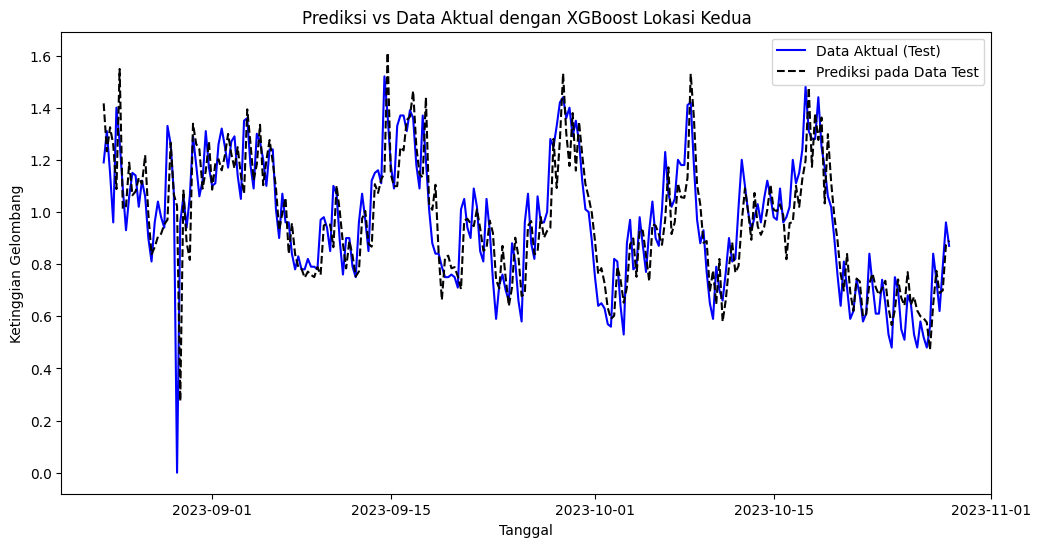

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df2.index[-len(y2_test_flat):], y2_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df2.index[-len(y2_test_flat):], y2_pred_xgb, label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.title('Prediksi vs Data Aktual dengan XGBoost Lokasi Kedua')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

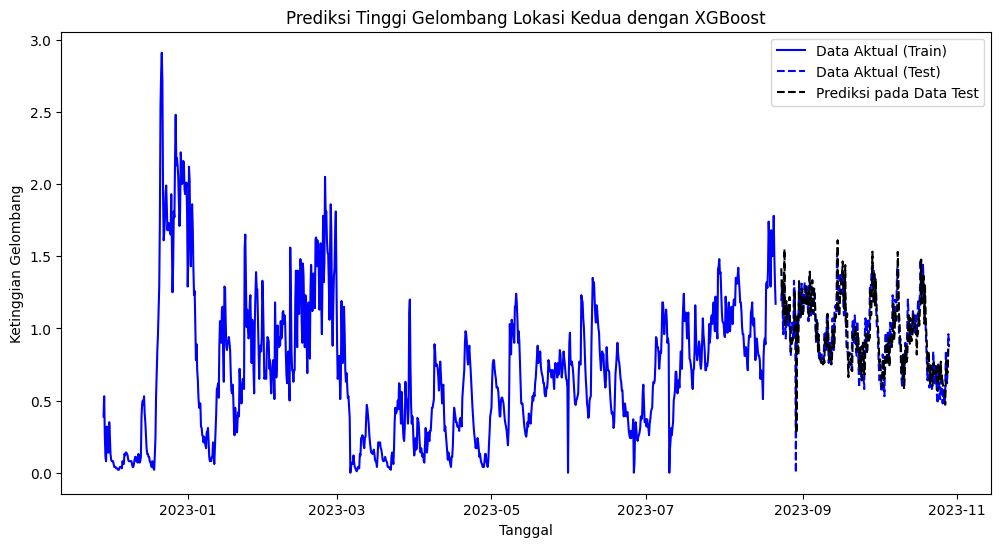

In [ ]:
# Plot tambahan seperti contoh yang diberikan sebelumnya
y2_test_pred_flat = best_model.predict(X2_test_flat)
y2_test_pred_inv = scaler.inverse_transform(y2_test_pred_flat.reshape(-1, 1))

train_index = df2.index[:len(y2_train_flat)]
test_index = df2.index[-len(y2_test_flat):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y2_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y2_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y2_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')

plt.title('Prediksi Tinggi Gelombang Lokasi Kedua dengan XGBoost')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

**Prediksi 30 Hari Kedepan**

In [ ]:
X2 = scaler.inverse_transform(X2_test_flat)


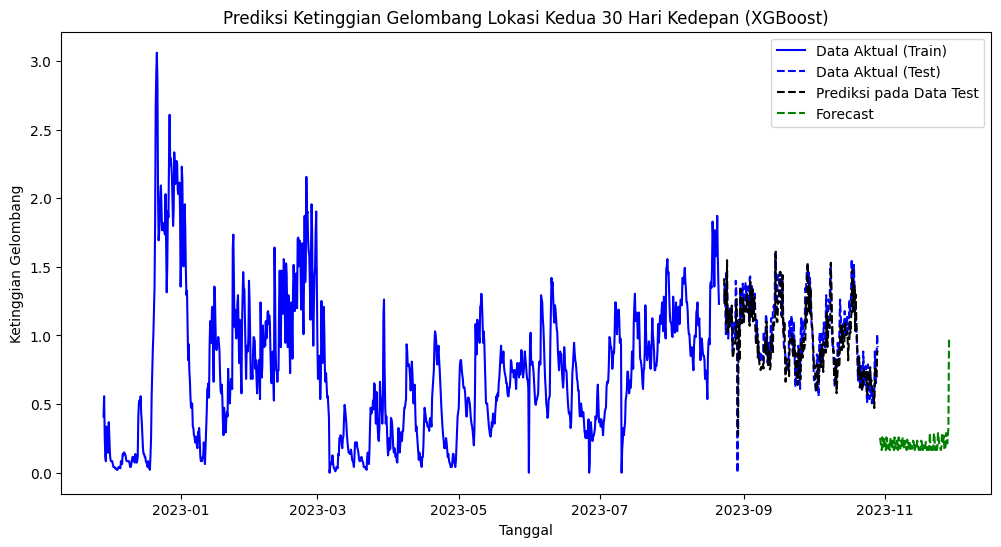

In [ ]:
# Prediksi 30 hari kedepan
X_test_flat_30 = []
num_prediction = 120
for _ in range(num_prediction):
    next_prediction = best_model.predict(X2[-1:])
    next_prediction_inv = scaler.inverse_transform(next_prediction.reshape(-1,1))
    X_test_flat_30 = np.append(X2, next_prediction_inv)


forecast_dates = pd.date_range(start=df2.index[-1] + pd.Timedelta(days=1), periods=num_prediction, freq='6H')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y2_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y2_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y2_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')

plt.title('Prediksi Ketinggian Gelombang Lokasi Kedua 30 Hari Kedepan (XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


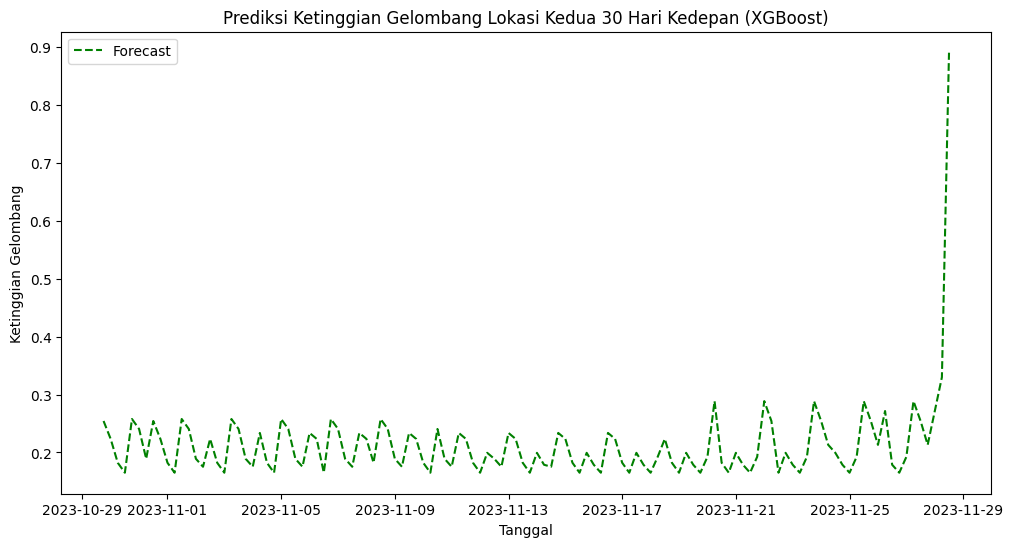

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Kedua 30 Hari Kedepan (XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future (asumsi variabel-variabel ini sudah ada sebelumnya)
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': X_test_flat_30[-num_prediction:]})
future_df

# Menampilkan tanggal berserta nilai ketinggian gelombang terendah dan tertinggi
min_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmin()]
max_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmax()]

print("Tanggal dan Nilai Ketinggian Gelombang Terendah:")
print(min_height_row['Tanggal'], min_height_row['Prediksi Ketinggian Gelombang'])

print("\nTanggal dan Nilai Ketinggian Gelombang Tertinggi:")
print(max_height_row['Tanggal'], max_height_row['Prediksi Ketinggian Gelombang'])
future_df

Tanggal dan Nilai Ketinggian Gelombang Terendah:
2023-10-30 12:00:00 0.16494845360824742

Tanggal dan Nilai Ketinggian Gelombang Tertinggi:
2023-11-28 12:00:00 0.8904109597206116


Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-29 18:00:00                       0.254296
1   2023-10-30 00:00:00                       0.223368
2   2023-10-30 06:00:00                       0.182131
3   2023-10-30 12:00:00                       0.164948
4   2023-10-30 18:00:00                       0.257732
..                  ...                            ...
115 2023-11-27 12:00:00                       0.254296
116 2023-11-27 18:00:00                       0.213058
117 2023-11-28 00:00:00                       0.271478
118 2023-11-28 06:00:00                       0.329897
119 2023-11-28 12:00:00                       0.890411

[120 rows x 2 columns]

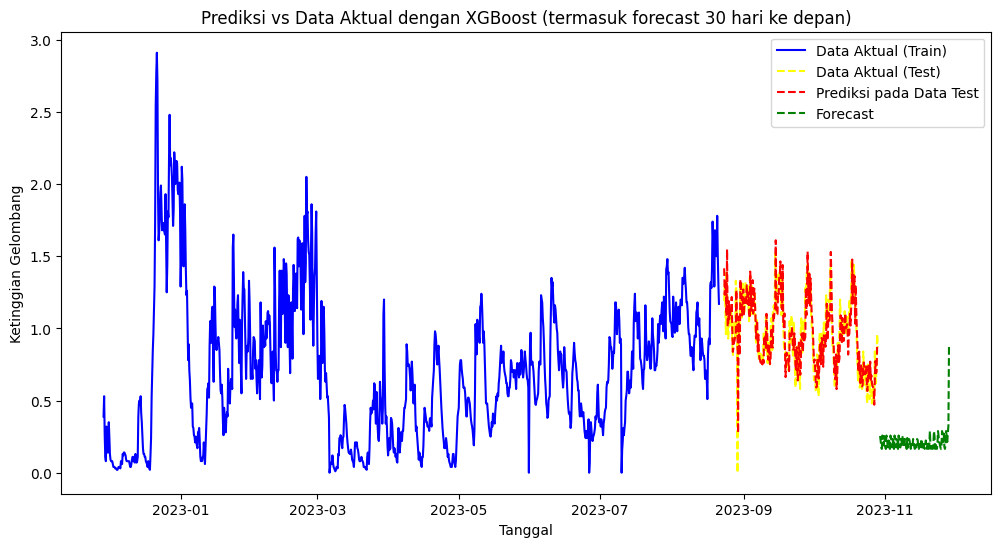

In [ ]:
# Prediksi 30 hari kedepan
X_test_flat_30 = []
num_prediction = 120
for _ in range(num_prediction):
    next_prediction = best_model.predict(X2_test_flat[-1:])
    next_prediction_inv = scaler.inverse_transform(next_prediction.reshape(-1,1))
    X_test_flat_30 = np.append(X2_test_flat, next_prediction_inv)


forecast_dates = pd.date_range(start=df2.index[-1] + pd.Timedelta(days=1), periods=num_prediction, freq='6H')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y2_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y2_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y2_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='red')
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')

plt.title('Prediksi vs Data Aktual dengan XGBoost (termasuk forecast 30 hari ke depan)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future (asumsi variabel-variabel ini sudah ada sebelumnya)
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': X_test_flat_30[-num_prediction:]})
future_df

# Menampilkan tanggal berserta nilai ketinggian gelombang terendah dan tertinggi
min_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmin()]
max_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmax()]

print("Tanggal dan Nilai Ketinggian Gelombang Terendah:")
print(min_height_row['Tanggal'], min_height_row['Prediksi Ketinggian Gelombang'])

print("\nTanggal dan Nilai Ketinggian Gelombang Tertinggi:")
print(max_height_row['Tanggal'], max_height_row['Prediksi Ketinggian Gelombang'])
future_df

Tanggal dan Nilai Ketinggian Gelombang Terendah:
2023-10-30 12:00:00 0.16494845360824742

Tanggal dan Nilai Ketinggian Gelombang Tertinggi:
2023-11-28 12:00:00 0.8904109597206116


Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-29 18:00:00                       0.254296
1   2023-10-30 00:00:00                       0.223368
2   2023-10-30 06:00:00                       0.182131
3   2023-10-30 12:00:00                       0.164948
4   2023-10-30 18:00:00                       0.257732
..                  ...                            ...
115 2023-11-27 12:00:00                       0.254296
116 2023-11-27 18:00:00                       0.213058
117 2023-11-28 00:00:00                       0.271478
118 2023-11-28 06:00:00                       0.329897
119 2023-11-28 12:00:00                       0.890411

[120 rows x 2 columns]

## Koordinat Ketiga

In [ ]:
X3_train_flat = X3_train.reshape((X3_train.shape[0], -1))
X3_test_flat = X3_test.reshape((X3_test.shape[0], -1))
y3_train_flat = y3_train.reshape((y3_train.shape[0], -1))
y3_test_flat = y3_test.reshape((y3_test.shape[0], -1))

**Penentuan Hyperparameter Tuning**

In [ ]:
# Inisialisasi model XGBoost Regressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {
    'colsample_bytree': [0.5, 0.7, 1],
    'learning_rate': [0.05, 0.15, 0.3],
    'max_depth': [3,5,6],
    'n_estimators': [50, 100, 150],
    'reg_lambda': [0, 0.1, 0.5, 1], # Menambahkan parameter reg_lambda untuk regularisasi L2
    'subsample' : [0.6, 1]
}
# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan grid search pada data training
grid_search.fit(X3_train_flat, y3_train_flat)

# Extrak hasil GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
# Menghitung RMSE
def calculate_rmse(y3_true, y3_pred):
  return np.sqrt(mean_squared_error(y3_true, y3_pred))

# Menghitung dan menambahkan hasil RMSE di dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# Menampilkan hasil parameter dan RMSE
print(results[['param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_reg_lambda', 'param_subsample','mean_test_score', 'rmse']])

# Menyimpan hasil pencarian grid ke dalam file CSV
results.to_csv('grid_search_xgboost_Lokasi3.csv', index=False)

    param_colsample_bytree param_learning_rate param_max_depth  \
0                      0.5                0.05               3   
1                      0.5                0.05               3   
2                      0.5                0.05               3   
3                      0.5                0.05               3   
4                      0.5                0.05               3   
..                     ...                 ...             ...   
643                      1                 0.3               6   
644                      1                 0.3               6   
645                      1                 0.3               6   
646                      1                 0.3               6   
647                      1                 0.3               6   

    param_n_estimators param_reg_lambda param_subsample  mean_test_score  \
0                   50                0             0.6        -0.003913   
1                   50                0               1

**Pemodelan**

In [ ]:
# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
# Menampilkan nilai terbaik
print("Mean Test Score:", grid_search.best_score_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Prediksi untuk data testing
y3_pred_flat = best_model.predict(X3_test_flat)

#Nilai sebelum denormalisasi
y3_pred_norm = y3_pred_flat.reshape(-1, 1)
y3_test_norm = y3_test_flat.reshape(-1, 1)

# Menampilkan prediksi sblm denormalisasi
predictions_df_norm = pd.DataFrame({'Actual': y3_test_norm.flatten(), 'Predicted': y3_pred_norm.flatten()})
print("Prediksi:")
print(predictions_df_norm)
# Menyimpan DataFrame ke dalam file Excel
predictions_df_norm.to_excel('hasil_prediksi_xgboost3.xlsx', index=False)

# Inverse transform prediksi dan nilai aktual
y3_pred_xgb = scaler.inverse_transform(y3_pred_norm.reshape(-1, 1))
y3_test_inv = scaler.inverse_transform(y3_test_norm.reshape(-1, 1))

# Menampilkan prediksi
predictions_df = pd.DataFrame({'Actual': y3_test_inv.flatten(), 'Predicted': y3_pred_xgb.flatten()})
print("Prediksi:")
print(predictions_df)


# Evaluasi model
rmse = np.sqrt(mean_squared_error(y3_test_norm, y3_pred_norm))
mae = mean_absolute_error(y3_test_norm, y3_pred_norm)
mape = np.mean(np.abs((y3_test_norm - y3_pred_norm) / np.where(y3_test_norm == 0, 1, y3_test_norm))) * 100

# Menampilkan metrik evaluasi
print("\nMetrik Evaluasi:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 0, 'subsample': 0.6}
Mean Test Score: -0.002674091942813965
Prediksi:
       Actual  Predicted
0    0.438127   0.480429
1    0.474916   0.451291
2    0.438127   0.482169
3    0.418060   0.449291
4    0.444816   0.431950
..        ...        ...
261  0.274247   0.251656
262  0.250836   0.293412
263  0.257525   0.251319
264  0.297659   0.267400
265  0.317726   0.321440

[266 rows x 2 columns]
Prediksi:
     Actual  Predicted
0      1.31   1.436482
1      1.42   1.349360
2      1.31   1.441684
3      1.25   1.343381
4      1.33   1.291530
..      ...        ...
261    0.82   0.752451
262    0.75   0.877303
263    0.77   0.751444
264    0.89   0.799526
265    0.95   0.961105

[266 rows x 2 columns]

Metrik Evaluasi:
RMSE: 0.0433
MAE: 0.0287
MAPE: 8.0842%


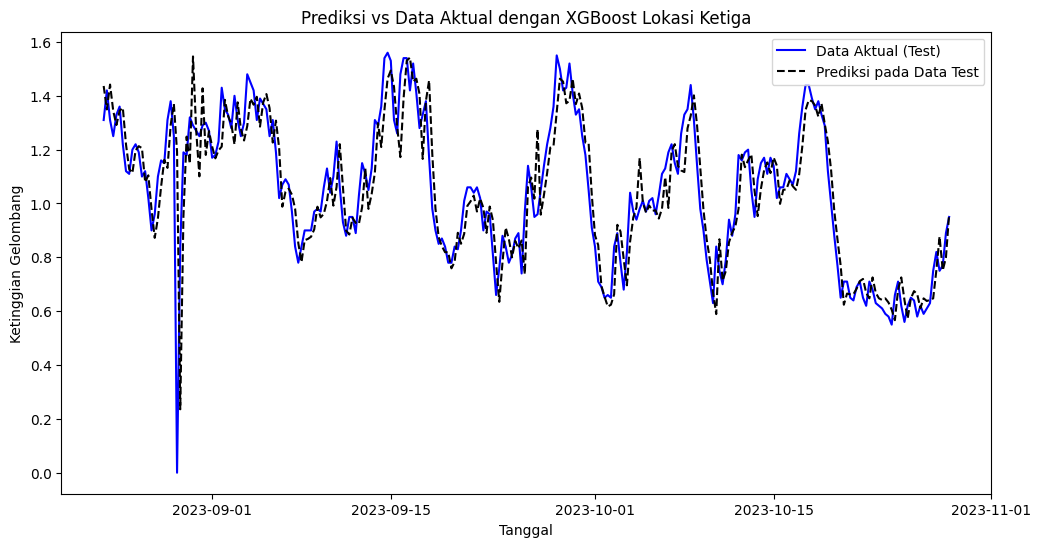

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df3.index[-len(y3_test_flat):], y3_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df3.index[-len(y3_test_flat):], y3_pred_xgb, label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.title('Prediksi vs Data Aktual dengan XGBoost Lokasi Ketiga')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

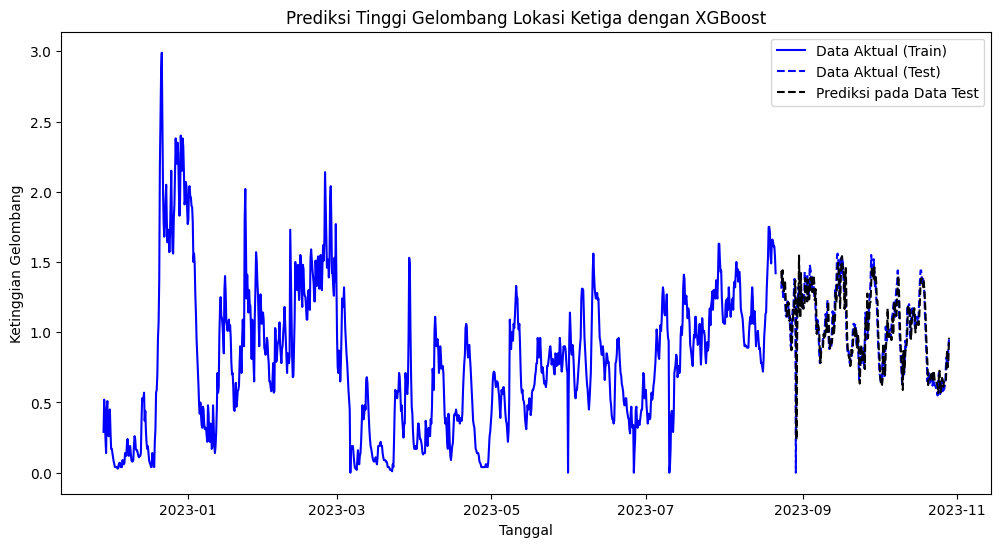

In [ ]:
# Plot tambahan seperti contoh yang diberikan sebelumnya
y3_test_pred_flat = best_model.predict(X3_test_flat)
y3_test_pred_inv = scaler.inverse_transform(y3_test_pred_flat.reshape(-1, 1))

train_index = df3.index[:len(y3_train_flat)]
test_index = df3.index[-len(y3_test_flat):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y3_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y3_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y3_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')

plt.title('Prediksi Tinggi Gelombang Lokasi Ketiga dengan XGBoost')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

**Prediksi 30 Hari Kedepan**

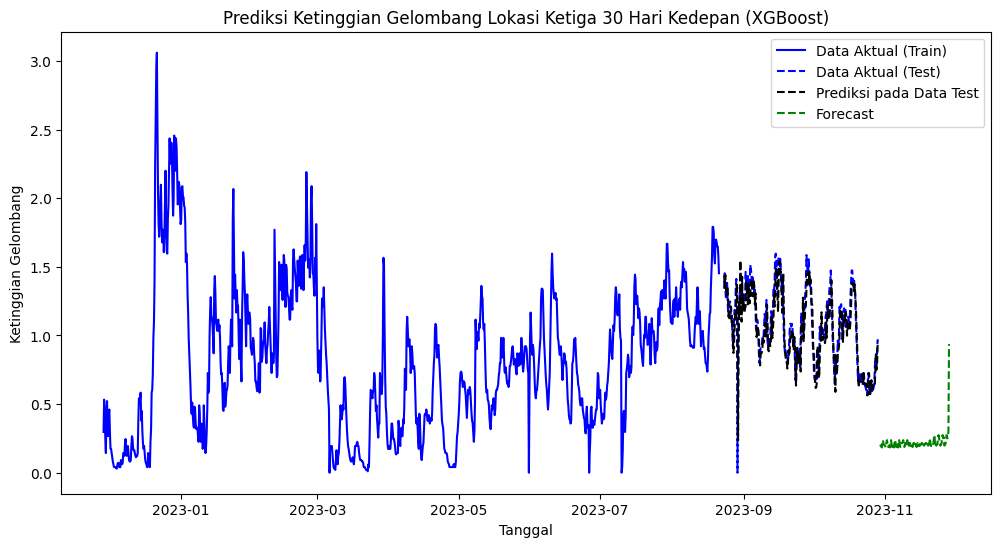

In [ ]:
# Prediksi 30 hari kedepan
X_test_flat_30 = []
num_prediction = 120
for _ in range(num_prediction):
    next_prediction = best_model.predict(X3_test_flat[-1:])
    next_prediction_inv = scaler.inverse_transform(next_prediction.reshape(-1,1))
    X_test_flat_30 = np.append(X3_test_flat, next_prediction_inv)


forecast_dates = pd.date_range(start=df3.index[-1] + pd.Timedelta(days=1), periods=num_prediction, freq='6H')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y3_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y3_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y3_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')

plt.title('Prediksi Ketinggian Gelombang Lokasi Ketiga 30 Hari Kedepan (XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future (asumsi variabel-variabel ini sudah ada sebelumnya)
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': X_test_flat_30[-num_prediction:]})
future_df

# Menampilkan tanggal berserta nilai ketinggian gelombang terendah dan tertinggi
min_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmin()]
max_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmax()]

print("Tanggal dan Nilai Ketinggian Gelombang Terendah:")
print(min_height_row['Tanggal'], min_height_row['Prediksi Ketinggian Gelombang'])

print("\nTanggal dan Nilai Ketinggian Gelombang Tertinggi:")
print(max_height_row['Tanggal'], max_height_row['Prediksi Ketinggian Gelombang'])
future_df

Tanggal dan Nilai Ketinggian Gelombang Terendah:
2023-10-30 12:00:00 0.1839464882943144

Tanggal dan Nilai Ketinggian Gelombang Tertinggi:
2023-11-28 12:00:00 0.9611049890518188


Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-29 18:00:00                       0.204013
1   2023-10-30 00:00:00                       0.197324
2   2023-10-30 06:00:00                       0.193980
3   2023-10-30 12:00:00                       0.183946
4   2023-10-30 18:00:00                       0.220736
..                  ...                            ...
115 2023-11-27 12:00:00                       0.274247
116 2023-11-27 18:00:00                       0.250836
117 2023-11-28 00:00:00                       0.257525
118 2023-11-28 06:00:00                       0.297659
119 2023-11-28 12:00:00                       0.961105

[120 rows x 2 columns]

## Koordinat Keempat

In [ ]:
X4_train_flat = X4_train.reshape((X4_train.shape[0], -1))
X4_test_flat = X4_test.reshape((X4_test.shape[0], -1))
y4_train_flat = y4_train.reshape((y4_train.shape[0], -1))
y4_test_flat = y4_test.reshape((y4_test.shape[0], -1))

**Penentuan Hyperparameter Tuning**

In [ ]:
# Inisialisasi model XGBoost Regressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {
    'colsample_bytree': [0.5, 0.7, 1],
    'learning_rate': [0.05, 0.15, 0.3],
    'max_depth': [3,5,6],
    'n_estimators': [50, 100, 150],
    'reg_lambda': [0, 0.1, 0.5, 1], # Menambahkan parameter reg_lambda untuk regularisasi L2
    'subsample' : [0.6, 1]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Melakukan grid search pada data training
grid_search.fit(X4_train_flat, y4_train_flat)

# Extrak hasil GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
# Menghitung RMSE
def calculate_rmse(y4_true, y4_pred):
  return np.sqrt(mean_squared_error(y4_true, y4_pred))

# Menghitung dan menambahkan hasil RMSE di dataframe
results['rmse'] = np.sqrt(-results['mean_test_score'])  # Negative because of neg_mean_squared_error

# Menampilkan hasil parameter dan RMSE
print(results[['param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_reg_lambda', 'param_subsample','mean_test_score', 'rmse']])

# Menyimpan hasil pencarian grid ke dalam file CSV
results.to_csv('grid_search_xgboost_Lokasi4.csv', index=False)

    param_colsample_bytree param_learning_rate param_max_depth  \
0                      0.5                0.05               3   
1                      0.5                0.05               3   
2                      0.5                0.05               3   
3                      0.5                0.05               3   
4                      0.5                0.05               3   
..                     ...                 ...             ...   
643                      1                 0.3               6   
644                      1                 0.3               6   
645                      1                 0.3               6   
646                      1                 0.3               6   
647                      1                 0.3               6   

    param_n_estimators param_reg_lambda param_subsample  mean_test_score  \
0                   50                0             0.6        -0.003940   
1                   50                0               1

**Pemodelan**

In [ ]:
# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
# Menampilkan nilai terbaik
print("Mean Test Score:", grid_search.best_score_)

# Menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Prediksi untuk data testing
y4_pred_flat = best_model.predict(X4_test_flat)

#Nilai sebelum denormalisasi
y4_pred_norm = y4_pred_flat.reshape(-1, 1)
y4_test_norm = y4_test_flat.reshape(-1, 1)

# Menampilkan prediksi sblm denormalisasi
predictions_df_norm = pd.DataFrame({'Actual': y4_test_norm.flatten(), 'Predicted': y4_pred_norm.flatten()})
print("Prediksi:")
print(predictions_df_norm)
# Menyimpan DataFrame ke dalam file Excel
predictions_df_norm.to_excel('hasil_prediksi_xgboost4.xlsx', index=False)

# Inverse transform prediksi dan nilai aktual
y4_pred_xgb = scaler.inverse_transform(y4_pred_norm.reshape(-1, 1))
y4_test_inv = scaler.inverse_transform(y4_test_norm.reshape(-1, 1))

# Menampilkan prediksi
predictions_df = pd.DataFrame({'Actual': y4_test_inv.flatten(), 'Predicted': y4_pred_xgb.flatten()})
print("Prediksi:")
print(predictions_df)
# Menyimpan DataFrame ke dalam file Excel
# predictions_df.to_excel('hasil_prediksi_xgboost4.xlsx', index=False)

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y4_test_norm, y4_pred_norm))
mae = mean_absolute_error(y4_test_norm, y4_pred_norm)
mape = np.mean(np.abs((y4_test_norm - y4_pred_norm) / np.where(y4_test_norm == 0, 1, y4_test_norm))) * 100

# Menampilkan metrik evaluasi
print("\nMetrik Evaluasi:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 0, 'subsample': 1}
Mean Test Score: -0.002755716443166134
Prediksi:
       Actual  Predicted
0    0.431373   0.477591
1    0.467320   0.446105
2    0.424837   0.477591
3    0.415033   0.433246
4    0.454248   0.424338
..        ...        ...
261  0.267974   0.269998
262  0.235294   0.264980
263  0.267974   0.252789
264  0.307190   0.278653
265  0.303922   0.304523

[266 rows x 2 columns]
Prediksi:
     Actual  Predicted
0      1.32   1.461429
1      1.43   1.365083
2      1.30   1.461429
3      1.27   1.325734
4      1.39   1.298475
..      ...        ...
261    0.82   0.826195
262    0.72   0.810840
263    0.82   0.773535
264    0.94   0.852679
265    0.93   0.931839

[266 rows x 2 columns]

Metrik Evaluasi:
RMSE: 0.0406
MAE: 0.0257
MAPE: 7.2170%


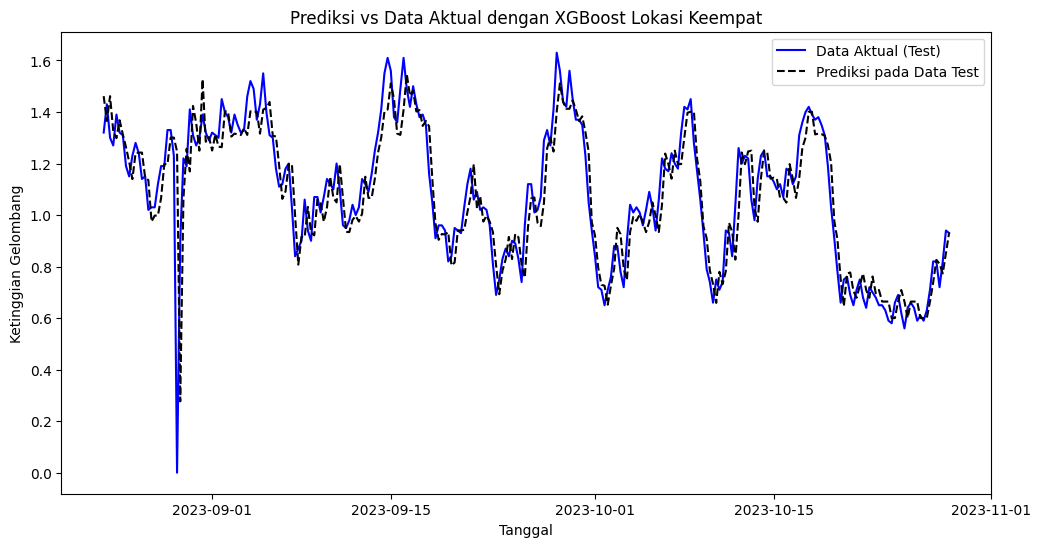

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df4.index[-len(y4_test_flat):], y4_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df4.index[-len(y4_test_flat):], y4_pred_xgb, label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.title('Prediksi vs Data Aktual dengan XGBoost Lokasi Keempat')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

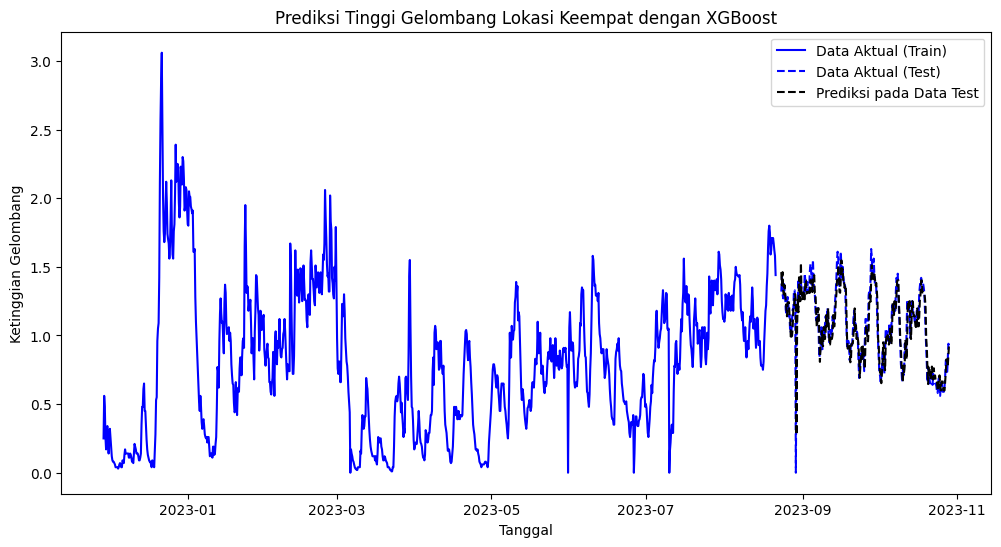

In [ ]:
# Plot tambahan seperti contoh yang diberikan sebelumnya
y4_test_pred_flat = best_model.predict(X4_test_flat)
y4_test_pred_inv = scaler.inverse_transform(y4_test_pred_flat.reshape(-1, 1))

train_index = df4.index[:len(y4_train_flat)]
test_index = df4.index[-len(y4_test_flat):]

plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y4_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y4_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y4_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')

plt.title('Prediksi Tinggi Gelombang Lokasi Keempat dengan XGBoost')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

**Prediksi 30 Hari Kedepan**

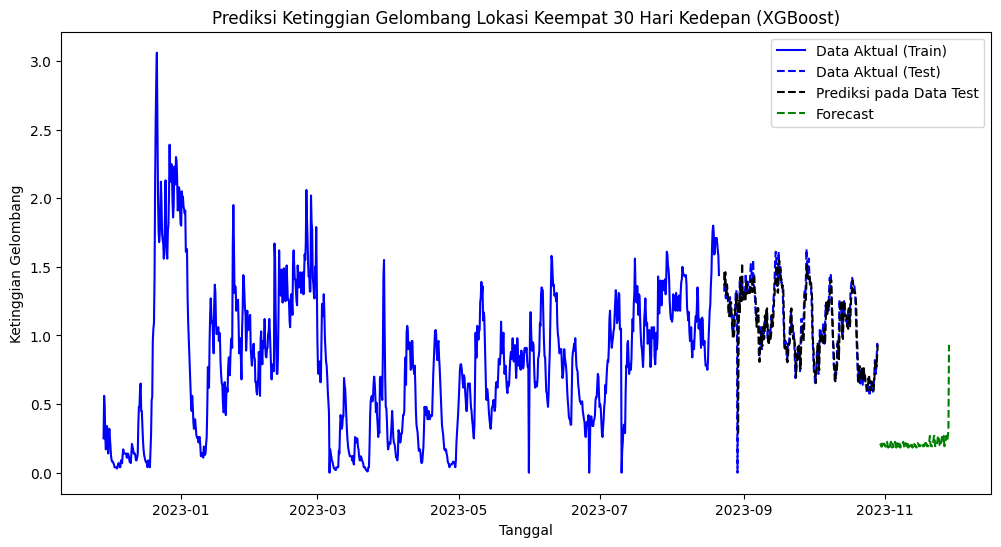

In [ ]:
# Prediksi 30 hari kedepan
X_test_flat_30 = []
num_prediction = 120
for _ in range(num_prediction):
    next_prediction = best_model.predict(X4_test_flat[-1:])
    next_prediction_inv = scaler.inverse_transform(next_prediction.reshape(-1,1))
    X_test_flat_30 = np.append(X4_test_flat, next_prediction_inv)


forecast_dates = pd.date_range(start=df4.index[-1] + pd.Timedelta(days=1), periods=num_prediction, freq='6H')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y4_train_flat.reshape(1, -1))[0], label='Data Aktual (Train)', color='blue')
plt.plot(test_index, scaler.inverse_transform(y4_test_flat.reshape(1, -1))[0], label='Data Aktual (Test)', linestyle='dashed', color='blue')
plt.plot(test_index, y4_test_pred_inv.flatten(), label='Prediksi pada Data Test', linestyle='dashed', color='black')
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')

plt.title('Prediksi Ketinggian Gelombang Lokasi Keempat 30 Hari Kedepan (XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


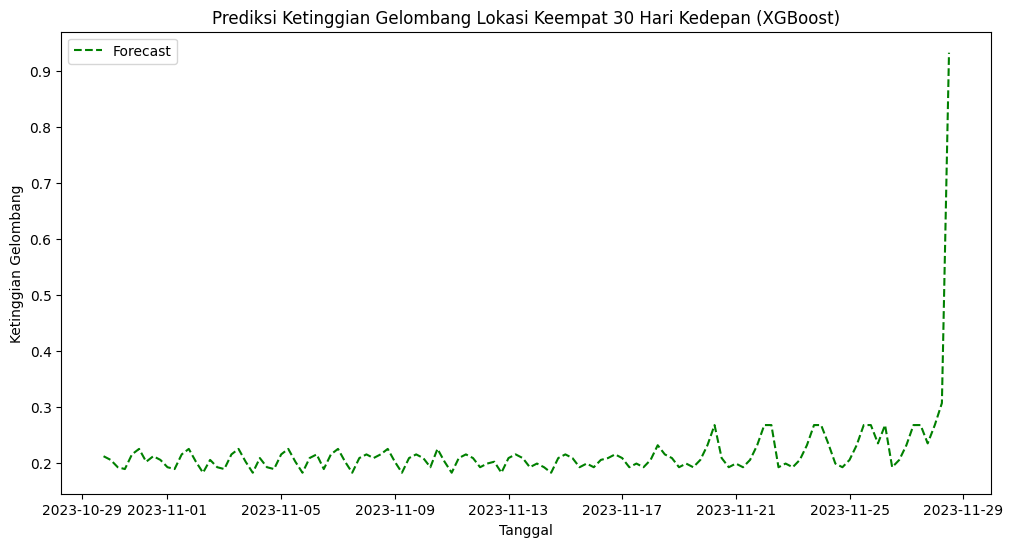

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, X_test_flat_30[-num_prediction:], label='Forecast', linestyle='dashed', color='green')
plt.title('Prediksi Ketinggian Gelombang Lokasi Keempat 30 Hari Kedepan (XGBoost)')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Membuat DataFrame dari future_index dan predictions_future (asumsi variabel-variabel ini sudah ada sebelumnya)
future_df = pd.DataFrame({'Tanggal': forecast_dates, 'Prediksi Ketinggian Gelombang': X_test_flat_30[-num_prediction:]})
future_df

# Menampilkan tanggal berserta nilai ketinggian gelombang terendah dan tertinggi
min_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmin()]
max_height_row = future_df.loc[future_df['Prediksi Ketinggian Gelombang'].idxmax()]

print("Tanggal dan Nilai Ketinggian Gelombang Terendah:")
print(min_height_row['Tanggal'], min_height_row['Prediksi Ketinggian Gelombang'])

print("\nTanggal dan Nilai Ketinggian Gelombang Tertinggi:")
print(max_height_row['Tanggal'], max_height_row['Prediksi Ketinggian Gelombang'])
future_df

Tanggal dan Nilai Ketinggian Gelombang Terendah:
2023-11-02 06:00:00 0.18300653594771243

Tanggal dan Nilai Ketinggian Gelombang Tertinggi:
2023-11-28 12:00:00 0.931838870048523


Tanggal  Prediksi Ketinggian Gelombang
0   2023-10-29 18:00:00                       0.212418
1   2023-10-30 00:00:00                       0.205882
2   2023-10-30 06:00:00                       0.192810
3   2023-10-30 12:00:00                       0.189542
4   2023-10-30 18:00:00                       0.215686
..                  ...                            ...
115 2023-11-27 12:00:00                       0.267974
116 2023-11-27 18:00:00                       0.235294
117 2023-11-28 00:00:00                       0.267974
118 2023-11-28 06:00:00                       0.307190
119 2023-11-28 12:00:00                       0.931839

[120 rows x 2 columns]

# PLOT PERBANDINGAN

**LOKASI PERTAMA**

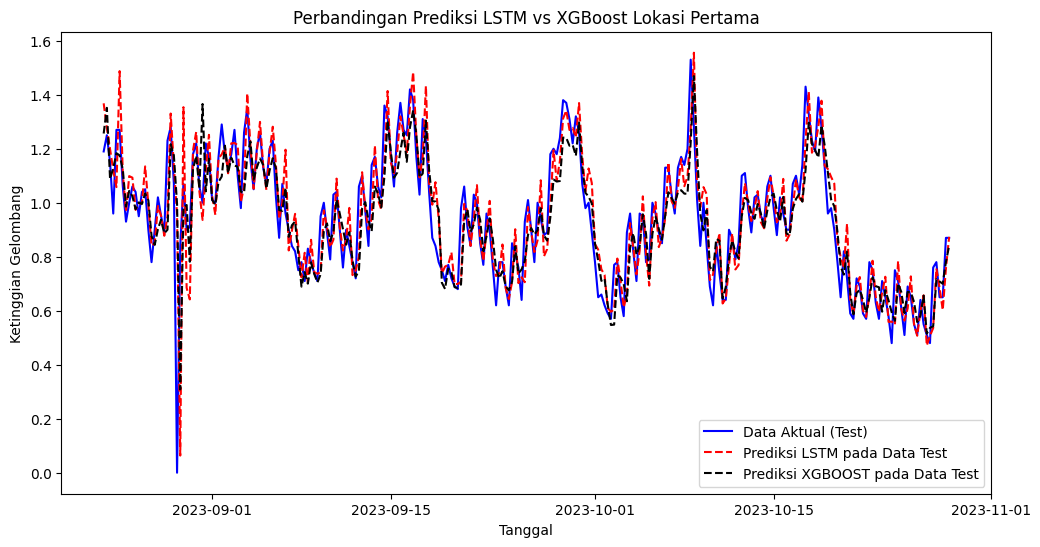

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df1.index[-len(y1_test_flat):], y1_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df1.index[-len(y1_test):], y1_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df1.index[-len(y1_test_flat):], y1_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Pertama')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

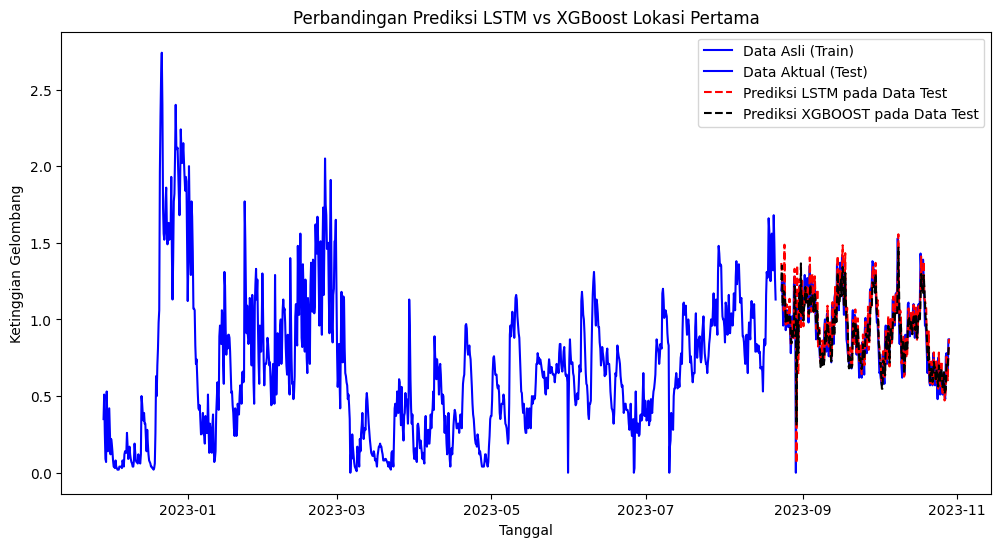

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y1_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(df1.index[-len(y1_test_flat):], y1_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df1.index[-len(y1_test):], y1_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df1.index[-len(y1_test_flat):], y1_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Pertama')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

**LOKASI KEDUA**

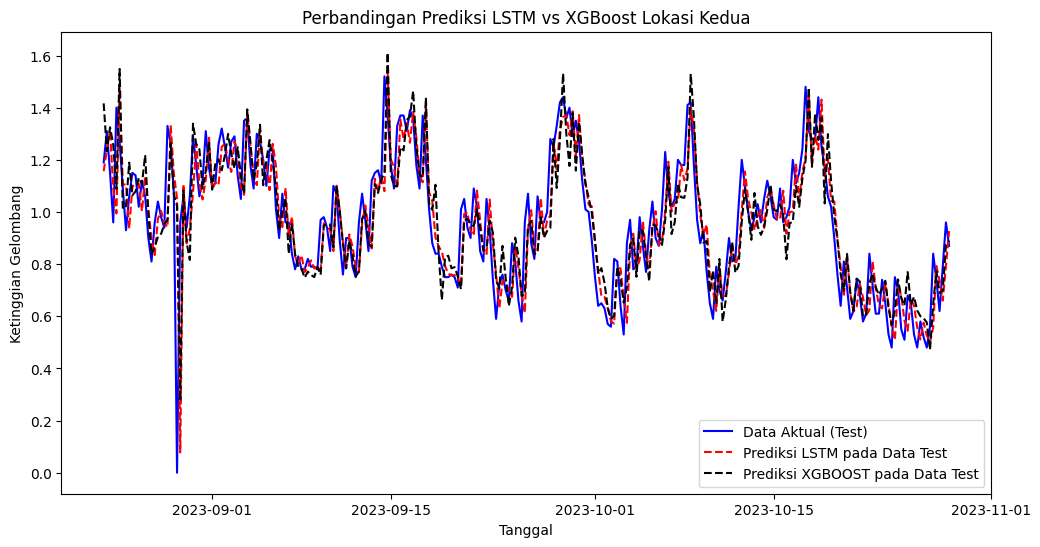

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df2.index[-len(y2_test_flat):], y2_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df2.index[-len(y2_test):], y2_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df2.index[-len(y2_test_flat):], y2_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Kedua')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

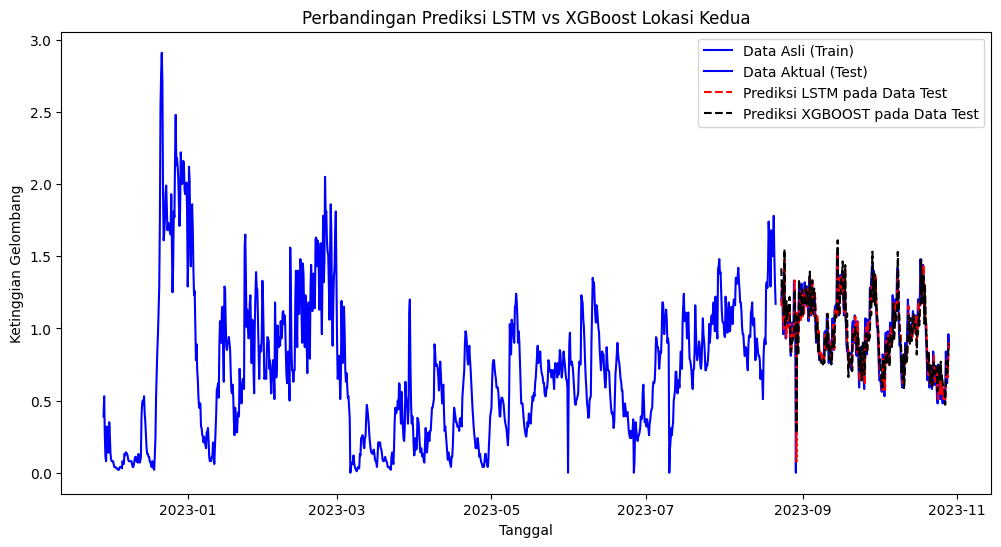

In [ ]:

# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y2_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(df2.index[-len(y2_test_flat):], y2_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df2.index[-len(y2_test):], y2_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df2.index[-len(y2_test_flat):], y2_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Kedua')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()


**LOKASI KETIGA**

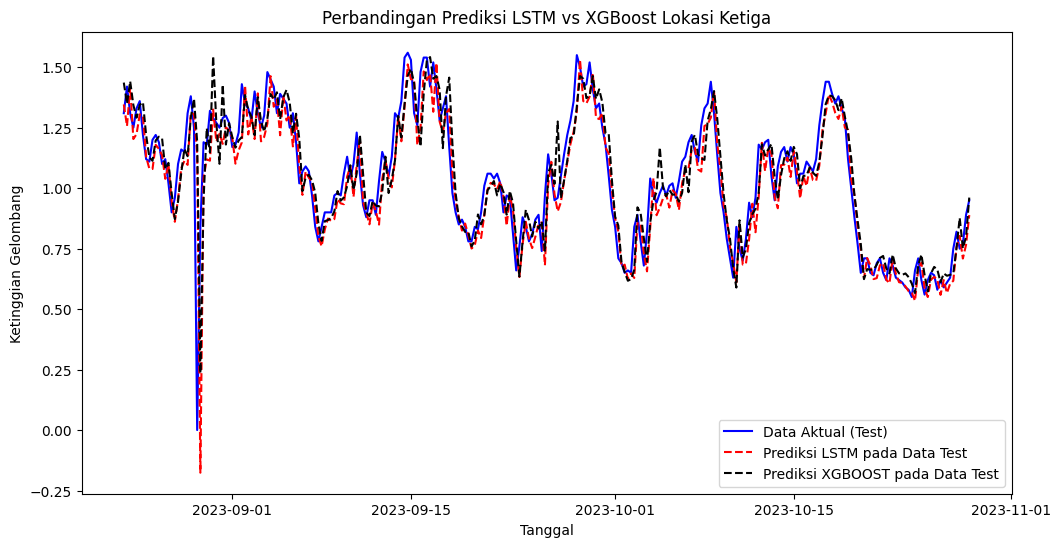

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df3.index[-len(y3_test_flat):], y3_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df3.index[-len(y3_test):], y3_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df3.index[-len(y3_test_flat):], y3_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Ketiga')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

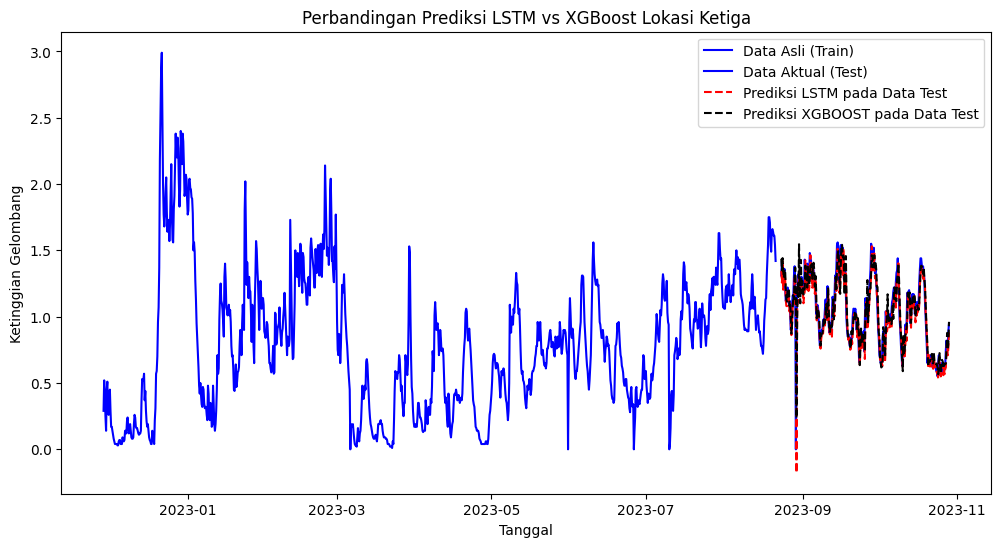

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y3_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(df3.index[-len(y3_test_flat):], y3_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df3.index[-len(y3_test):], y3_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df3.index[-len(y3_test_flat):], y3_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Ketiga')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()



**LOKASI KEEMPAT**

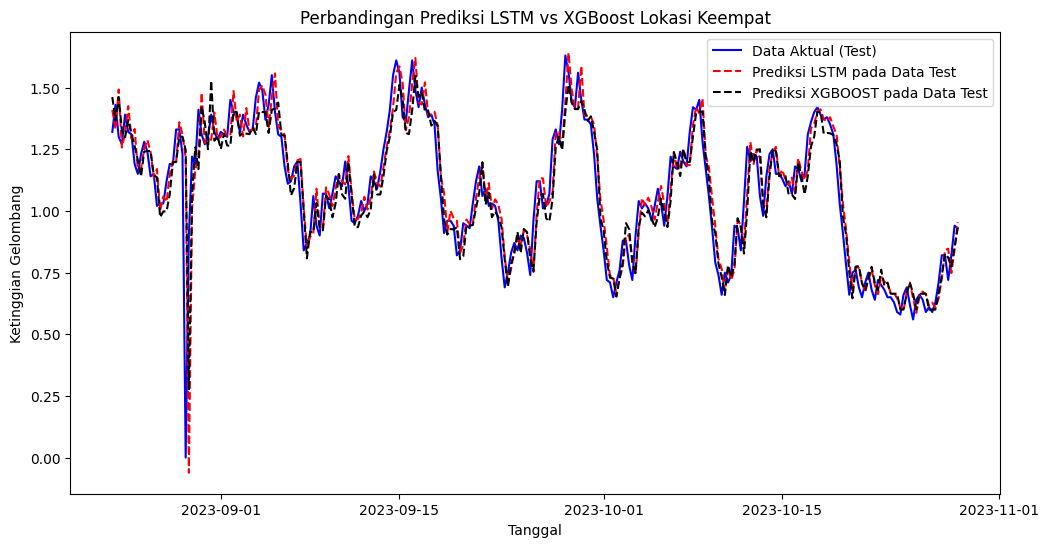

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(df4.index[-len(y4_test_flat):], y4_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df4.index[-len(y4_test):], y4_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df4.index[-len(y4_test_flat):], y4_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Keempat')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

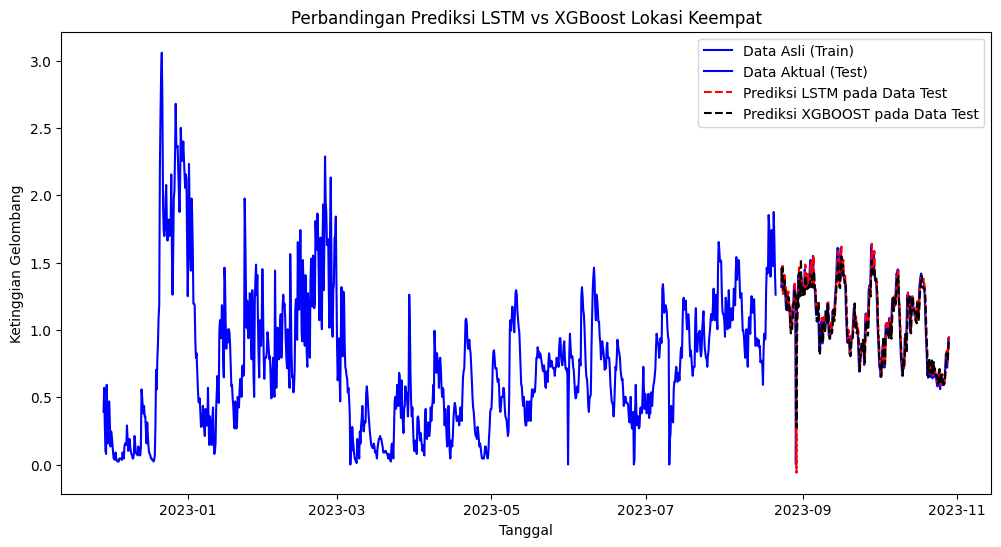

In [ ]:
# Plot prediksi vs nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(train_index, scaler.inverse_transform(y1_train.reshape(1, -1))[0], label='Data Asli (Train)', color='blue')
plt.plot(df4.index[-len(y4_test_flat):], y4_test_inv, label='Data Aktual (Test)', color='blue')
plt.plot(df4.index[-len(y4_test):], y4_pred_inv, label='Prediksi LSTM pada Data Test', linestyle='dashed', color='red')
plt.plot(df4.index[-len(y4_test_flat):], y4_pred_xgb, label='Prediksi XGBOOST pada Data Test', linestyle='dashed', color='black')
plt.title('Perbandingan Prediksi LSTM vs XGBoost Lokasi Keempat')
plt.xlabel('Tanggal')
plt.ylabel('Ketinggian Gelombang')
plt.legend()
plt.show()

